# Slightly more advanced feature engineering

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import stats

In [2]:
dataset = pd.read_csv("csgo_dataset.csv", index_col="Unnamed: 0")

In [149]:
dataset

player_id  engagement_id  timestep_id  attacker_delta_yaw  \
0                 0              0            0               0.000   
1                 0              0            1               0.000   
2                 0              0            2               0.000   
3                 0              0            3               0.000   
4                 0              0            4               0.000   
...             ...            ...          ...                 ...   
69119995      11999             29          187              -0.758   
69119996      11999             29          188              -0.253   
69119997      11999             29          189               0.000   
69119998      11999             29          190               0.505   
69119999      11999             29          191               0.654   

          attacker_delta_pitch  crosshair_tovictim_yaw  \
0                        0.000                  11.744   
1                        0.000                  11.548   
2                        0.000                  11.315   
3                        0.000                  11.136   
4                        0.000                  10.995   
...                        ...                     ...   
69119995                 0.049                   9.195   
69119996                 0.000                   9.211   
69119997                 0.000                   9.115   
69119998                 0.000                   8.535   
69119999                 0.055                   7.880   

          crosshair_tovictim_pitch  firing  cheater  
0                           -0.741       0        1  
1                           -0.741       0        1  
2                           -0.741       0        1  
3                           -0.741       0        1  
4                           -0.741       0        1  
...                            ...     ...      ...  
69119995                    -1.017       0        0  
69119996                    -1.013       0        0  
69119997                    -1.019       0        0  
69119998                    -1.022       0        0  
69119999                    -1.081       0        0  

[69120000 rows x 9 columns]

## Time series

### First, compare the change in yaw within one engagement between cheater and legit player

In [150]:
cheater_engagement = dataset.loc[(dataset.player_id == 1) & (dataset.engagement_id == 0)]

In [151]:
cheater_engagement

player_id  engagement_id  timestep_id  attacker_delta_yaw  \
5760          1              0            0               0.269   
5761          1              0            1               0.269   
5762          1              0            2               0.242   
5763          1              0            3               0.099   
5764          1              0            4               0.022   
...         ...            ...          ...                 ...   
5947          1              0          187               0.385   
5948          1              0          188               0.110   
5949          1              0          189               0.110   
5950          1              0          190               0.110   
5951          1              0          191               0.165   

      attacker_delta_pitch  crosshair_tovictim_yaw  crosshair_tovictim_pitch  \
5760                 0.000                  26.806                    -0.761   
5761                 0.000                  26.279                    -0.755   
5762                -0.049                  25.798                    -0.707   
5763                -0.027                  25.484                    -0.683   
5764                 0.000                  25.268                    -0.688   
...                    ...                     ...                       ...   
5947                 0.330                  -0.400                    -1.935   
5948                 0.330                  -0.510                    -2.265   
5949                 0.330                  -0.620                    -2.595   
5950                 0.330                  -0.730                    -2.924   
5951                 0.220                  -0.895                    -3.144   

      firing  cheater  
5760       0        1  
5761       0        1  
5762       0        1  
5763       0        1  
5764       0        1  
...      ...      ...  
5947       0        1  
5948       0        1  
5949       0        1  
5950       0        1  
5951       0        1  

[192 rows x 9 columns]

In [152]:
legit_engagement = dataset.loc[(dataset.player_id == 11999) & (dataset.engagement_id == 0)]

In [153]:
legit_engagement

player_id  engagement_id  timestep_id  attacker_delta_yaw  \
69114240      11999              0            0               0.247   
69114241      11999              0            1               0.000   
69114242      11999              0            2              -0.132   
69114243      11999              0            3              -0.066   
69114244      11999              0            4              -0.027   
...             ...            ...          ...                 ...   
69114427      11999              0          187               0.049   
69114428      11999              0          188              -0.203   
69114429      11999              0          189               0.104   
69114430      11999              0          190               1.060   
69114431      11999              0          191               1.318   

          attacker_delta_pitch  crosshair_tovictim_yaw  \
69114240                -0.110                  -2.203   
69114241                 0.000                  -2.046   
69114242                -0.022                  -1.598   
69114243                -0.022                  -1.267   
69114244                -0.022                  -0.964   
...                        ...                     ...   
69114427                 0.253                -143.097   
69114428                 0.253                -142.945   
69114429                 0.049                -143.092   
69114430                 0.203                -144.226   
69114431                 0.253                -145.616   

          crosshair_tovictim_pitch  firing  cheater  
69114240                    -1.925       0        0  
69114241                    -1.917       0        0  
69114242                    -1.846       0        0  
69114243                    -1.767       0        0  
69114244                    -1.705       0        0  
...                            ...     ...      ...  
69114427                    -2.238       0        0  
69114428                    -2.512       0        0  
69114429                    -2.571       0        0  
69114430                    -2.783       0        0  
69114431                    -3.043       0        0  

[192 rows x 9 columns]

In [154]:
cheater_engagement.timestep_id.loc[cheater_engagement.firing == 1]

5920    160
Name: timestep_id, dtype: int64

In [155]:
192/6 # one second is 32 timesteps

32.0

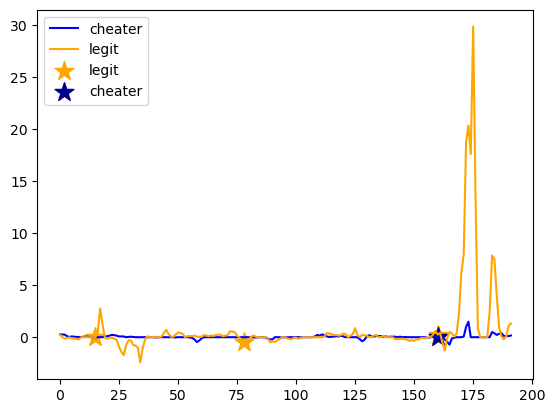

In [156]:
plt.plot(cheater_engagement.timestep_id, cheater_engagement.attacker_delta_yaw, color="blue", label="cheater")
plt.plot(legit_engagement.timestep_id, legit_engagement.attacker_delta_yaw, color="orange", label="legit")
plt.scatter(legit_engagement.timestep_id.loc[legit_engagement.firing == 1], \
            legit_engagement.attacker_delta_yaw.loc[legit_engagement.firing == 1], 
           marker='*', s=200, c="orange", label="legit")
plt.scatter(cheater_engagement.timestep_id.loc[cheater_engagement.firing == 1], \
            cheater_engagement.attacker_delta_yaw.loc[cheater_engagement.firing == 1], 
           marker='*', s=200, c="darkblue", label="cheater")
plt.legend(loc="best")

In [157]:
cheater_engagement.loc[cheater_engagement.firing==1]

player_id  engagement_id  timestep_id  attacker_delta_yaw  \
5920          1              0          160               0.027   

      attacker_delta_pitch  crosshair_tovictim_yaw  crosshair_tovictim_pitch  \
5920                 0.022                  -0.602                    -2.189   

      firing  cheater  
5920       1        1

### follow up - is it that cheaters fire only once and legit players fire multiple times in one engagement? - need to check more robustly but maybe that could be a feature

In [158]:
cheaters = dataset.loc[dataset.cheater == 1]
legit = dataset.loc[dataset.cheater == 0]

In [159]:
from collections import Counter

In [160]:
cheater_groups = cheaters.groupby(["player_id","engagement_id"])
cheater_keys = cheater_groups.groups.keys()

In [300]:
# counter sums up how many times shots were fired by cheaters given player ID, engagement ID combo
counter = 0
for key in cheater_keys:
    group = cheater_groups.get_group(key)
    print(key, Counter(group.firing))
    if Counter(group.firing)[1] > 1: # counting how many cases of cheaters firing more than once
        counter += 1

(0, 0) Counter({0: 191, 1: 1})
(0, 1) Counter({0: 191, 1: 1})
(0, 2) Counter({0: 182, 1: 10})
(0, 3) Counter({0: 182, 1: 10})
(0, 4) Counter({0: 182, 1: 10})
(0, 5) Counter({0: 182, 1: 10})
(0, 6) Counter({0: 184, 1: 8})
(0, 7) Counter({0: 184, 1: 8})
(0, 8) Counter({0: 184, 1: 8})
(0, 9) Counter({0: 191, 1: 1})
(0, 10) Counter({0: 175, 1: 17})
(0, 11) Counter({0: 173, 1: 19})
(0, 12) Counter({0: 172, 1: 20})
(0, 13) Counter({0: 172, 1: 20})
(0, 14) Counter({0: 190, 1: 2})
(0, 15) Counter({0: 184, 1: 8})
(0, 16) Counter({0: 184, 1: 8})
(0, 17) Counter({0: 184, 1: 8})
(0, 18) Counter({0: 184, 1: 8})
(0, 19) Counter({0: 184, 1: 8})
(0, 20) Counter({0: 187, 1: 5})
(0, 21) Counter({0: 179, 1: 13})
(0, 22) Counter({0: 178, 1: 14})
(0, 23) Counter({0: 178, 1: 14})
(0, 24) Counter({0: 178, 1: 14})
(0, 25) Counter({0: 178, 1: 14})
(0, 26) Counter({0: 191, 1: 1})
(0, 27) Counter({0: 191, 1: 1})
(0, 28) Counter({0: 191, 1: 1})
(0, 29) Counter({0: 191, 1: 1})
(1, 0) Counter({0: 191, 1: 1})
(1, 1)

(16, 7) Counter({0: 185, 1: 7})
(16, 8) Counter({0: 187, 1: 5})
(16, 9) Counter({0: 180, 1: 12})
(16, 10) Counter({0: 181, 1: 11})
(16, 11) Counter({0: 182, 1: 10})
(16, 12) Counter({0: 183, 1: 9})
(16, 13) Counter({0: 189, 1: 3})
(16, 14) Counter({0: 185, 1: 7})
(16, 15) Counter({0: 185, 1: 7})
(16, 16) Counter({0: 185, 1: 7})
(16, 17) Counter({0: 185, 1: 7})
(16, 18) Counter({0: 177, 1: 15})
(16, 19) Counter({0: 190, 1: 2})
(16, 20) Counter({0: 185, 1: 7})
(16, 21) Counter({0: 185, 1: 7})
(16, 22) Counter({0: 185, 1: 7})
(16, 23) Counter({0: 179, 1: 13})
(16, 24) Counter({0: 179, 1: 13})
(16, 25) Counter({0: 176, 1: 16})
(16, 26) Counter({0: 176, 1: 16})
(16, 27) Counter({0: 176, 1: 16})
(16, 28) Counter({0: 176, 1: 16})
(16, 29) Counter({0: 177, 1: 15})
(17, 0) Counter({0: 184, 1: 8})
(17, 1) Counter({0: 184, 1: 8})
(17, 2) Counter({0: 184, 1: 8})
(17, 3) Counter({0: 178, 1: 14})
(17, 4) Counter({0: 178, 1: 14})
(17, 5) Counter({0: 178, 1: 14})
(17, 6) Counter({0: 178, 1: 14})
(17, 

(24, 17) Counter({0: 184, 1: 8})
(24, 18) Counter({0: 183, 1: 9})
(24, 19) Counter({0: 183, 1: 9})
(24, 20) Counter({0: 183, 1: 9})
(24, 21) Counter({0: 173, 1: 19})
(24, 22) Counter({0: 172, 1: 20})
(24, 23) Counter({0: 172, 1: 20})
(24, 24) Counter({0: 172, 1: 20})
(24, 25) Counter({0: 180, 1: 12})
(24, 26) Counter({0: 180, 1: 12})
(24, 27) Counter({0: 175, 1: 17})
(24, 28) Counter({0: 175, 1: 17})
(24, 29) Counter({0: 191, 1: 1})
(25, 0) Counter({0: 190, 1: 2})
(25, 1) Counter({0: 191, 1: 1})
(25, 2) Counter({0: 177, 1: 15})
(25, 3) Counter({0: 177, 1: 15})
(25, 4) Counter({0: 186, 1: 6})
(25, 5) Counter({0: 186, 1: 6})
(25, 6) Counter({0: 187, 1: 5})
(25, 7) Counter({0: 186, 1: 6})
(25, 8) Counter({0: 185, 1: 7})
(25, 9) Counter({0: 186, 1: 6})
(25, 10) Counter({0: 186, 1: 6})
(25, 11) Counter({0: 182, 1: 10})
(25, 12) Counter({0: 177, 1: 15})
(25, 13) Counter({0: 177, 1: 15})
(25, 14) Counter({0: 179, 1: 13})
(25, 15) Counter({0: 179, 1: 13})
(25, 16) Counter({0: 186, 1: 6})
(25, 

(33, 22) Counter({0: 186, 1: 6})
(33, 23) Counter({0: 186, 1: 6})
(33, 24) Counter({0: 186, 1: 6})
(33, 25) Counter({0: 184, 1: 8})
(33, 26) Counter({0: 188, 1: 4})
(33, 27) Counter({0: 188, 1: 4})
(33, 28) Counter({0: 189, 1: 3})
(33, 29) Counter({0: 189, 1: 3})
(34, 0) Counter({0: 181, 1: 11})
(34, 1) Counter({0: 181, 1: 11})
(34, 2) Counter({0: 181, 1: 11})
(34, 3) Counter({0: 182, 1: 10})
(34, 4) Counter({0: 165, 1: 27})
(34, 5) Counter({0: 165, 1: 27})
(34, 6) Counter({0: 165, 1: 27})
(34, 7) Counter({0: 165, 1: 27})
(34, 8) Counter({0: 165, 1: 27})
(34, 9) Counter({0: 180, 1: 12})
(34, 10) Counter({0: 180, 1: 12})
(34, 11) Counter({0: 180, 1: 12})
(34, 12) Counter({0: 180, 1: 12})
(34, 13) Counter({0: 180, 1: 12})
(34, 14) Counter({0: 176, 1: 16})
(34, 15) Counter({0: 174, 1: 18})
(34, 16) Counter({0: 174, 1: 18})
(34, 17) Counter({0: 174, 1: 18})
(34, 18) Counter({0: 178, 1: 14})
(34, 19) Counter({0: 178, 1: 14})
(34, 20) Counter({0: 180, 1: 12})
(34, 21) Counter({0: 176, 1: 16}

(44, 20) Counter({0: 191, 1: 1})
(44, 21) Counter({0: 190, 1: 2})
(44, 22) Counter({0: 185, 1: 7})
(44, 23) Counter({0: 185, 1: 7})
(44, 24) Counter({0: 185, 1: 7})
(44, 25) Counter({0: 183, 1: 9})
(44, 26) Counter({0: 183, 1: 9})
(44, 27) Counter({0: 176, 1: 16})
(44, 28) Counter({0: 176, 1: 16})
(44, 29) Counter({0: 174, 1: 18})
(45, 0) Counter({0: 188, 1: 4})
(45, 1) Counter({0: 188, 1: 4})
(45, 2) Counter({0: 188, 1: 4})
(45, 3) Counter({0: 188, 1: 4})
(45, 4) Counter({0: 185, 1: 7})
(45, 5) Counter({0: 189, 1: 3})
(45, 6) Counter({0: 184, 1: 8})
(45, 7) Counter({0: 184, 1: 8})
(45, 8) Counter({0: 191, 1: 1})
(45, 9) Counter({0: 191, 1: 1})
(45, 10) Counter({0: 191, 1: 1})
(45, 11) Counter({0: 190, 1: 2})
(45, 12) Counter({0: 191, 1: 1})
(45, 13) Counter({0: 189, 1: 3})
(45, 14) Counter({0: 188, 1: 4})
(45, 15) Counter({0: 180, 1: 12})
(45, 16) Counter({0: 178, 1: 14})
(45, 17) Counter({0: 178, 1: 14})
(45, 18) Counter({0: 191, 1: 1})
(45, 19) Counter({0: 191, 1: 1})
(45, 20) Count

(55, 24) Counter({0: 179, 1: 13})
(55, 25) Counter({0: 179, 1: 13})
(55, 26) Counter({0: 177, 1: 15})
(55, 27) Counter({0: 177, 1: 15})
(55, 28) Counter({0: 185, 1: 7})
(55, 29) Counter({0: 184, 1: 8})
(56, 0) Counter({0: 183, 1: 9})
(56, 1) Counter({0: 181, 1: 11})
(56, 2) Counter({0: 186, 1: 6})
(56, 3) Counter({0: 185, 1: 7})
(56, 4) Counter({0: 185, 1: 7})
(56, 5) Counter({0: 185, 1: 7})
(56, 6) Counter({0: 185, 1: 7})
(56, 7) Counter({0: 189, 1: 3})
(56, 8) Counter({0: 185, 1: 7})
(56, 9) Counter({0: 185, 1: 7})
(56, 10) Counter({0: 187, 1: 5})
(56, 11) Counter({0: 187, 1: 5})
(56, 12) Counter({0: 181, 1: 11})
(56, 13) Counter({0: 179, 1: 13})
(56, 14) Counter({0: 179, 1: 13})
(56, 15) Counter({0: 179, 1: 13})
(56, 16) Counter({0: 189, 1: 3})
(56, 17) Counter({0: 189, 1: 3})
(56, 18) Counter({0: 183, 1: 9})
(56, 19) Counter({0: 182, 1: 10})
(56, 20) Counter({0: 189, 1: 3})
(56, 21) Counter({0: 189, 1: 3})
(56, 22) Counter({0: 182, 1: 10})
(56, 23) Counter({0: 182, 1: 10})
(56, 24)

(72, 28) Counter({0: 182, 1: 10})
(72, 29) Counter({0: 182, 1: 10})
(73, 0) Counter({0: 177, 1: 15})
(73, 1) Counter({0: 174, 1: 18})
(73, 2) Counter({0: 172, 1: 20})
(73, 3) Counter({0: 171, 1: 21})
(73, 4) Counter({0: 170, 1: 22})
(73, 5) Counter({0: 170, 1: 22})
(73, 6) Counter({0: 173, 1: 19})
(73, 7) Counter({0: 174, 1: 18})
(73, 8) Counter({0: 175, 1: 17})
(73, 9) Counter({0: 185, 1: 7})
(73, 10) Counter({0: 185, 1: 7})
(73, 11) Counter({0: 176, 1: 16})
(73, 12) Counter({0: 176, 1: 16})
(73, 13) Counter({0: 185, 1: 7})
(73, 14) Counter({0: 179, 1: 13})
(73, 15) Counter({0: 179, 1: 13})
(73, 16) Counter({0: 175, 1: 17})
(73, 17) Counter({0: 182, 1: 10})
(73, 18) Counter({0: 182, 1: 10})
(73, 19) Counter({0: 182, 1: 10})
(73, 20) Counter({0: 182, 1: 10})
(73, 21) Counter({0: 182, 1: 10})
(73, 22) Counter({0: 178, 1: 14})
(73, 23) Counter({0: 177, 1: 15})
(73, 24) Counter({0: 177, 1: 15})
(73, 25) Counter({0: 179, 1: 13})
(73, 26) Counter({0: 179, 1: 13})
(73, 27) Counter({0: 179, 1

(86, 5) Counter({0: 162, 1: 30})
(86, 6) Counter({0: 191, 1: 1})
(86, 7) Counter({0: 191, 1: 1})
(86, 8) Counter({0: 191, 1: 1})
(86, 9) Counter({0: 191, 1: 1})
(86, 10) Counter({0: 191, 1: 1})
(86, 11) Counter({0: 185, 1: 7})
(86, 12) Counter({0: 178, 1: 14})
(86, 13) Counter({0: 178, 1: 14})
(86, 14) Counter({0: 183, 1: 9})
(86, 15) Counter({0: 183, 1: 9})
(86, 16) Counter({0: 183, 1: 9})
(86, 17) Counter({0: 183, 1: 9})
(86, 18) Counter({0: 178, 1: 14})
(86, 19) Counter({0: 178, 1: 14})
(86, 20) Counter({0: 178, 1: 14})
(86, 21) Counter({0: 178, 1: 14})
(86, 22) Counter({0: 183, 1: 9})
(86, 23) Counter({0: 183, 1: 9})
(86, 24) Counter({0: 183, 1: 9})
(86, 25) Counter({0: 177, 1: 15})
(86, 26) Counter({0: 177, 1: 15})
(86, 27) Counter({0: 177, 1: 15})
(86, 28) Counter({0: 177, 1: 15})
(86, 29) Counter({0: 181, 1: 11})
(87, 0) Counter({0: 186, 1: 6})
(87, 1) Counter({0: 190, 1: 2})
(87, 2) Counter({0: 188, 1: 4})
(87, 3) Counter({0: 190, 1: 2})
(87, 4) Counter({0: 179, 1: 13})
(87, 5)

(100, 2) Counter({0: 173, 1: 19})
(100, 3) Counter({0: 189, 1: 3})
(100, 4) Counter({0: 185, 1: 7})
(100, 5) Counter({0: 181, 1: 11})
(100, 6) Counter({0: 180, 1: 12})
(100, 7) Counter({0: 179, 1: 13})
(100, 8) Counter({0: 179, 1: 13})
(100, 9) Counter({0: 179, 1: 13})
(100, 10) Counter({0: 188, 1: 4})
(100, 11) Counter({0: 188, 1: 4})
(100, 12) Counter({0: 182, 1: 10})
(100, 13) Counter({0: 182, 1: 10})
(100, 14) Counter({0: 185, 1: 7})
(100, 15) Counter({0: 187, 1: 5})
(100, 16) Counter({0: 182, 1: 10})
(100, 17) Counter({0: 180, 1: 12})
(100, 18) Counter({0: 179, 1: 13})
(100, 19) Counter({0: 178, 1: 14})
(100, 20) Counter({0: 177, 1: 15})
(100, 21) Counter({0: 180, 1: 12})
(100, 22) Counter({0: 179, 1: 13})
(100, 23) Counter({0: 176, 1: 16})
(100, 24) Counter({0: 165, 1: 27})
(100, 25) Counter({0: 164, 1: 28})
(100, 26) Counter({0: 164, 1: 28})
(100, 27) Counter({0: 164, 1: 28})
(100, 28) Counter({0: 184, 1: 8})
(100, 29) Counter({0: 184, 1: 8})
(101, 0) Counter({0: 184, 1: 8})
(10

(109, 8) Counter({0: 182, 1: 10})
(109, 9) Counter({0: 185, 1: 7})
(109, 10) Counter({0: 176, 1: 16})
(109, 11) Counter({0: 170, 1: 22})
(109, 12) Counter({0: 170, 1: 22})
(109, 13) Counter({0: 187, 1: 5})
(109, 14) Counter({0: 187, 1: 5})
(109, 15) Counter({0: 191, 1: 1})
(109, 16) Counter({0: 190, 1: 2})
(109, 17) Counter({0: 190, 1: 2})
(109, 18) Counter({0: 190, 1: 2})
(109, 19) Counter({0: 191, 1: 1})
(109, 20) Counter({0: 191, 1: 1})
(109, 21) Counter({0: 184, 1: 8})
(109, 22) Counter({0: 172, 1: 20})
(109, 23) Counter({0: 188, 1: 4})
(109, 24) Counter({0: 188, 1: 4})
(109, 25) Counter({0: 187, 1: 5})
(109, 26) Counter({0: 179, 1: 13})
(109, 27) Counter({0: 178, 1: 14})
(109, 28) Counter({0: 175, 1: 17})
(109, 29) Counter({0: 174, 1: 18})
(110, 0) Counter({0: 184, 1: 8})
(110, 1) Counter({0: 184, 1: 8})
(110, 2) Counter({0: 184, 1: 8})
(110, 3) Counter({0: 184, 1: 8})
(110, 4) Counter({0: 191, 1: 1})
(110, 5) Counter({0: 191, 1: 1})
(110, 6) Counter({0: 190, 1: 2})
(110, 7) Count

(117, 15) Counter({0: 180, 1: 12})
(117, 16) Counter({0: 180, 1: 12})
(117, 17) Counter({0: 180, 1: 12})
(117, 18) Counter({0: 180, 1: 12})
(117, 19) Counter({0: 184, 1: 8})
(117, 20) Counter({0: 184, 1: 8})
(117, 21) Counter({0: 184, 1: 8})
(117, 22) Counter({0: 185, 1: 7})
(117, 23) Counter({0: 180, 1: 12})
(117, 24) Counter({0: 178, 1: 14})
(117, 25) Counter({0: 190, 1: 2})
(117, 26) Counter({0: 190, 1: 2})
(117, 27) Counter({0: 175, 1: 17})
(117, 28) Counter({0: 173, 1: 19})
(117, 29) Counter({0: 171, 1: 21})
(118, 0) Counter({0: 183, 1: 9})
(118, 1) Counter({0: 185, 1: 7})
(118, 2) Counter({0: 185, 1: 7})
(118, 3) Counter({0: 186, 1: 6})
(118, 4) Counter({0: 186, 1: 6})
(118, 5) Counter({0: 186, 1: 6})
(118, 6) Counter({0: 186, 1: 6})
(118, 7) Counter({0: 186, 1: 6})
(118, 8) Counter({0: 179, 1: 13})
(118, 9) Counter({0: 179, 1: 13})
(118, 10) Counter({0: 179, 1: 13})
(118, 11) Counter({0: 179, 1: 13})
(118, 12) Counter({0: 189, 1: 3})
(118, 13) Counter({0: 183, 1: 9})
(118, 14) C

(126, 21) Counter({0: 182, 1: 10})
(126, 22) Counter({0: 186, 1: 6})
(126, 23) Counter({0: 186, 1: 6})
(126, 24) Counter({0: 180, 1: 12})
(126, 25) Counter({0: 184, 1: 8})
(126, 26) Counter({0: 180, 1: 12})
(126, 27) Counter({0: 179, 1: 13})
(126, 28) Counter({0: 179, 1: 13})
(126, 29) Counter({0: 183, 1: 9})
(127, 0) Counter({0: 183, 1: 9})
(127, 1) Counter({0: 186, 1: 6})
(127, 2) Counter({0: 187, 1: 5})
(127, 3) Counter({0: 179, 1: 13})
(127, 4) Counter({0: 179, 1: 13})
(127, 5) Counter({0: 181, 1: 11})
(127, 6) Counter({0: 180, 1: 12})
(127, 7) Counter({0: 179, 1: 13})
(127, 8) Counter({0: 178, 1: 14})
(127, 9) Counter({0: 172, 1: 20})
(127, 10) Counter({0: 172, 1: 20})
(127, 11) Counter({0: 172, 1: 20})
(127, 12) Counter({0: 170, 1: 22})
(127, 13) Counter({0: 171, 1: 21})
(127, 14) Counter({0: 173, 1: 19})
(127, 15) Counter({0: 174, 1: 18})
(127, 16) Counter({0: 183, 1: 9})
(127, 17) Counter({0: 183, 1: 9})
(127, 18) Counter({0: 183, 1: 9})
(127, 19) Counter({0: 183, 1: 9})
(127, 

(141, 4) Counter({0: 184, 1: 8})
(141, 5) Counter({0: 179, 1: 13})
(141, 6) Counter({0: 179, 1: 13})
(141, 7) Counter({0: 179, 1: 13})
(141, 8) Counter({0: 179, 1: 13})
(141, 9) Counter({0: 184, 1: 8})
(141, 10) Counter({0: 184, 1: 8})
(141, 11) Counter({0: 184, 1: 8})
(141, 12) Counter({0: 184, 1: 8})
(141, 13) Counter({0: 183, 1: 9})
(141, 14) Counter({0: 183, 1: 9})
(141, 15) Counter({0: 183, 1: 9})
(141, 16) Counter({0: 183, 1: 9})
(141, 17) Counter({0: 181, 1: 11})
(141, 18) Counter({0: 183, 1: 9})
(141, 19) Counter({0: 183, 1: 9})
(141, 20) Counter({0: 183, 1: 9})
(141, 21) Counter({0: 183, 1: 9})
(141, 22) Counter({0: 175, 1: 17})
(141, 23) Counter({0: 175, 1: 17})
(141, 24) Counter({0: 175, 1: 17})
(141, 25) Counter({0: 175, 1: 17})
(141, 26) Counter({0: 169, 1: 23})
(141, 27) Counter({0: 170, 1: 22})
(141, 28) Counter({0: 170, 1: 22})
(141, 29) Counter({0: 189, 1: 3})
(142, 0) Counter({0: 191, 1: 1})
(142, 1) Counter({0: 182, 1: 10})
(142, 2) Counter({0: 182, 1: 10})
(142, 3) 

(151, 2) Counter({0: 187, 1: 5})
(151, 3) Counter({0: 187, 1: 5})
(151, 4) Counter({0: 186, 1: 6})
(151, 5) Counter({0: 186, 1: 6})
(151, 6) Counter({0: 188, 1: 4})
(151, 7) Counter({0: 188, 1: 4})
(151, 8) Counter({0: 191, 1: 1})
(151, 9) Counter({0: 190, 1: 2})
(151, 10) Counter({0: 190, 1: 2})
(151, 11) Counter({0: 190, 1: 2})
(151, 12) Counter({0: 178, 1: 14})
(151, 13) Counter({0: 180, 1: 12})
(151, 14) Counter({0: 181, 1: 11})
(151, 15) Counter({0: 180, 1: 12})
(151, 16) Counter({0: 178, 1: 14})
(151, 17) Counter({0: 171, 1: 21})
(151, 18) Counter({0: 184, 1: 8})
(151, 19) Counter({0: 184, 1: 8})
(151, 20) Counter({0: 186, 1: 6})
(151, 21) Counter({0: 186, 1: 6})
(151, 22) Counter({0: 186, 1: 6})
(151, 23) Counter({0: 190, 1: 2})
(151, 24) Counter({0: 190, 1: 2})
(151, 25) Counter({0: 189, 1: 3})
(151, 26) Counter({0: 191, 1: 1})
(151, 27) Counter({0: 182, 1: 10})
(151, 28) Counter({0: 179, 1: 13})
(151, 29) Counter({0: 170, 1: 22})
(152, 0) Counter({0: 170, 1: 22})
(152, 1) Coun

(162, 14) Counter({0: 187, 1: 5})
(162, 15) Counter({0: 188, 1: 4})
(162, 16) Counter({0: 188, 1: 4})
(162, 17) Counter({0: 176, 1: 16})
(162, 18) Counter({0: 186, 1: 6})
(162, 19) Counter({0: 181, 1: 11})
(162, 20) Counter({0: 180, 1: 12})
(162, 21) Counter({0: 178, 1: 14})
(162, 22) Counter({0: 183, 1: 9})
(162, 23) Counter({0: 182, 1: 10})
(162, 24) Counter({0: 182, 1: 10})
(162, 25) Counter({0: 182, 1: 10})
(162, 26) Counter({0: 182, 1: 10})
(162, 27) Counter({0: 182, 1: 10})
(162, 28) Counter({0: 189, 1: 3})
(162, 29) Counter({0: 188, 1: 4})
(163, 0) Counter({0: 170, 1: 22})
(163, 1) Counter({0: 170, 1: 22})
(163, 2) Counter({0: 170, 1: 22})
(163, 3) Counter({0: 181, 1: 11})
(163, 4) Counter({0: 181, 1: 11})
(163, 5) Counter({0: 181, 1: 11})
(163, 6) Counter({0: 181, 1: 11})
(163, 7) Counter({0: 176, 1: 16})
(163, 8) Counter({0: 183, 1: 9})
(163, 9) Counter({0: 183, 1: 9})
(163, 10) Counter({0: 183, 1: 9})
(163, 11) Counter({0: 183, 1: 9})
(163, 12) Counter({0: 183, 1: 9})
(163, 1

(174, 13) Counter({0: 176, 1: 16})
(174, 14) Counter({0: 177, 1: 15})
(174, 15) Counter({0: 183, 1: 9})
(174, 16) Counter({0: 183, 1: 9})
(174, 17) Counter({0: 189, 1: 3})
(174, 18) Counter({0: 189, 1: 3})
(174, 19) Counter({0: 191, 1: 1})
(174, 20) Counter({0: 191, 1: 1})
(174, 21) Counter({0: 191, 1: 1})
(174, 22) Counter({0: 184, 1: 8})
(174, 23) Counter({0: 177, 1: 15})
(174, 24) Counter({0: 191, 1: 1})
(174, 25) Counter({0: 182, 1: 10})
(174, 26) Counter({0: 182, 1: 10})
(174, 27) Counter({0: 182, 1: 10})
(174, 28) Counter({0: 184, 1: 8})
(174, 29) Counter({0: 184, 1: 8})
(175, 0) Counter({0: 184, 1: 8})
(175, 1) Counter({0: 179, 1: 13})
(175, 2) Counter({0: 181, 1: 11})
(175, 3) Counter({0: 182, 1: 10})
(175, 4) Counter({0: 183, 1: 9})
(175, 5) Counter({0: 183, 1: 9})
(175, 6) Counter({0: 183, 1: 9})
(175, 7) Counter({0: 183, 1: 9})
(175, 8) Counter({0: 184, 1: 8})
(175, 9) Counter({0: 183, 1: 9})
(175, 10) Counter({0: 182, 1: 10})
(175, 11) Counter({0: 180, 1: 12})
(175, 12) Cou

(185, 27) Counter({0: 178, 1: 14})
(185, 28) Counter({0: 178, 1: 14})
(185, 29) Counter({0: 183, 1: 9})
(186, 0) Counter({0: 183, 1: 9})
(186, 1) Counter({0: 183, 1: 9})
(186, 2) Counter({0: 183, 1: 9})
(186, 3) Counter({0: 183, 1: 9})
(186, 4) Counter({0: 183, 1: 9})
(186, 5) Counter({0: 183, 1: 9})
(186, 6) Counter({0: 183, 1: 9})
(186, 7) Counter({0: 183, 1: 9})
(186, 8) Counter({0: 171, 1: 21})
(186, 9) Counter({0: 170, 1: 22})
(186, 10) Counter({0: 169, 1: 23})
(186, 11) Counter({0: 169, 1: 23})
(186, 12) Counter({0: 169, 1: 23})
(186, 13) Counter({0: 183, 1: 9})
(186, 14) Counter({0: 185, 1: 7})
(186, 15) Counter({0: 189, 1: 3})
(186, 16) Counter({0: 185, 1: 7})
(186, 17) Counter({0: 185, 1: 7})
(186, 18) Counter({0: 191, 1: 1})
(186, 19) Counter({0: 188, 1: 4})
(186, 20) Counter({0: 181, 1: 11})
(186, 21) Counter({0: 179, 1: 13})
(186, 22) Counter({0: 179, 1: 13})
(186, 23) Counter({0: 186, 1: 6})
(186, 24) Counter({0: 186, 1: 6})
(186, 25) Counter({0: 187, 1: 5})
(186, 26) Coun

(196, 5) Counter({0: 182, 1: 10})
(196, 6) Counter({0: 181, 1: 11})
(196, 7) Counter({0: 180, 1: 12})
(196, 8) Counter({0: 180, 1: 12})
(196, 9) Counter({0: 180, 1: 12})
(196, 10) Counter({0: 185, 1: 7})
(196, 11) Counter({0: 185, 1: 7})
(196, 12) Counter({0: 182, 1: 10})
(196, 13) Counter({0: 181, 1: 11})
(196, 14) Counter({0: 178, 1: 14})
(196, 15) Counter({0: 174, 1: 18})
(196, 16) Counter({0: 174, 1: 18})
(196, 17) Counter({0: 164, 1: 28})
(196, 18) Counter({0: 164, 1: 28})
(196, 19) Counter({0: 164, 1: 28})
(196, 20) Counter({0: 165, 1: 27})
(196, 21) Counter({0: 183, 1: 9})
(196, 22) Counter({0: 182, 1: 10})
(196, 23) Counter({0: 180, 1: 12})
(196, 24) Counter({0: 178, 1: 14})
(196, 25) Counter({0: 177, 1: 15})
(196, 26) Counter({0: 191, 1: 1})
(196, 27) Counter({0: 190, 1: 2})
(196, 28) Counter({0: 184, 1: 8})
(196, 29) Counter({0: 184, 1: 8})
(197, 0) Counter({0: 184, 1: 8})
(197, 1) Counter({0: 183, 1: 9})
(197, 2) Counter({0: 179, 1: 13})
(197, 3) Counter({0: 179, 1: 13})
(19

(212, 23) Counter({0: 181, 1: 11})
(212, 24) Counter({0: 181, 1: 11})
(212, 25) Counter({0: 181, 1: 11})
(212, 26) Counter({0: 181, 1: 11})
(212, 27) Counter({0: 187, 1: 5})
(212, 28) Counter({0: 189, 1: 3})
(212, 29) Counter({0: 184, 1: 8})
(213, 0) Counter({0: 183, 1: 9})
(213, 1) Counter({0: 187, 1: 5})
(213, 2) Counter({0: 188, 1: 4})
(213, 3) Counter({0: 180, 1: 12})
(213, 4) Counter({0: 170, 1: 22})
(213, 5) Counter({0: 170, 1: 22})
(213, 6) Counter({0: 170, 1: 22})
(213, 7) Counter({0: 166, 1: 26})
(213, 8) Counter({0: 166, 1: 26})
(213, 9) Counter({0: 175, 1: 17})
(213, 10) Counter({0: 184, 1: 8})
(213, 11) Counter({0: 184, 1: 8})
(213, 12) Counter({0: 185, 1: 7})
(213, 13) Counter({0: 185, 1: 7})
(213, 14) Counter({0: 185, 1: 7})
(213, 15) Counter({0: 184, 1: 8})
(213, 16) Counter({0: 184, 1: 8})
(213, 17) Counter({0: 183, 1: 9})
(213, 18) Counter({0: 183, 1: 9})
(213, 19) Counter({0: 183, 1: 9})
(213, 20) Counter({0: 183, 1: 9})
(213, 21) Counter({0: 186, 1: 6})
(213, 22) Cou

(222, 1) Counter({0: 179, 1: 13})
(222, 2) Counter({0: 182, 1: 10})
(222, 3) Counter({0: 170, 1: 22})
(222, 4) Counter({0: 174, 1: 18})
(222, 5) Counter({0: 174, 1: 18})
(222, 6) Counter({0: 174, 1: 18})
(222, 7) Counter({0: 183, 1: 9})
(222, 8) Counter({0: 183, 1: 9})
(222, 9) Counter({0: 183, 1: 9})
(222, 10) Counter({0: 183, 1: 9})
(222, 11) Counter({0: 183, 1: 9})
(222, 12) Counter({0: 177, 1: 15})
(222, 13) Counter({0: 186, 1: 6})
(222, 14) Counter({0: 181, 1: 11})
(222, 15) Counter({0: 181, 1: 11})
(222, 16) Counter({0: 181, 1: 11})
(222, 17) Counter({0: 191, 1: 1})
(222, 18) Counter({0: 185, 1: 7})
(222, 19) Counter({0: 185, 1: 7})
(222, 20) Counter({0: 182, 1: 10})
(222, 21) Counter({0: 182, 1: 10})
(222, 22) Counter({0: 182, 1: 10})
(222, 23) Counter({0: 182, 1: 10})
(222, 24) Counter({0: 182, 1: 10})
(222, 25) Counter({0: 182, 1: 10})
(222, 26) Counter({0: 182, 1: 10})
(222, 27) Counter({0: 189, 1: 3})
(222, 28) Counter({0: 189, 1: 3})
(222, 29) Counter({0: 181, 1: 11})
(223,

(232, 21) Counter({0: 188, 1: 4})
(232, 22) Counter({0: 185, 1: 7})
(232, 23) Counter({0: 185, 1: 7})
(232, 24) Counter({0: 185, 1: 7})
(232, 25) Counter({0: 185, 1: 7})
(232, 26) Counter({0: 187, 1: 5})
(232, 27) Counter({0: 187, 1: 5})
(232, 28) Counter({0: 183, 1: 9})
(232, 29) Counter({0: 183, 1: 9})
(233, 0) Counter({0: 183, 1: 9})
(233, 1) Counter({0: 183, 1: 9})
(233, 2) Counter({0: 183, 1: 9})
(233, 3) Counter({0: 183, 1: 9})
(233, 4) Counter({0: 183, 1: 9})
(233, 5) Counter({0: 183, 1: 9})
(233, 6) Counter({0: 183, 1: 9})
(233, 7) Counter({0: 183, 1: 9})
(233, 8) Counter({0: 183, 1: 9})
(233, 9) Counter({0: 183, 1: 9})
(233, 10) Counter({0: 176, 1: 16})
(233, 11) Counter({0: 176, 1: 16})
(233, 12) Counter({0: 176, 1: 16})
(233, 13) Counter({0: 176, 1: 16})
(233, 14) Counter({0: 183, 1: 9})
(233, 15) Counter({0: 183, 1: 9})
(233, 16) Counter({0: 183, 1: 9})
(233, 17) Counter({0: 187, 1: 5})
(233, 18) Counter({0: 191, 1: 1})
(233, 19) Counter({0: 190, 1: 2})
(233, 20) Counter({0

(241, 24) Counter({0: 191, 1: 1})
(241, 25) Counter({0: 189, 1: 3})
(241, 26) Counter({0: 189, 1: 3})
(241, 27) Counter({0: 179, 1: 13})
(241, 28) Counter({0: 179, 1: 13})
(241, 29) Counter({0: 175, 1: 17})
(242, 0) Counter({0: 184, 1: 8})
(242, 1) Counter({0: 181, 1: 11})
(242, 2) Counter({0: 181, 1: 11})
(242, 3) Counter({0: 181, 1: 11})
(242, 4) Counter({0: 181, 1: 11})
(242, 5) Counter({0: 184, 1: 8})
(242, 6) Counter({0: 181, 1: 11})
(242, 7) Counter({0: 181, 1: 11})
(242, 8) Counter({0: 180, 1: 12})
(242, 9) Counter({0: 179, 1: 13})
(242, 10) Counter({0: 173, 1: 19})
(242, 11) Counter({0: 173, 1: 19})
(242, 12) Counter({0: 173, 1: 19})
(242, 13) Counter({0: 181, 1: 11})
(242, 14) Counter({0: 181, 1: 11})
(242, 15) Counter({0: 186, 1: 6})
(242, 16) Counter({0: 186, 1: 6})
(242, 17) Counter({0: 184, 1: 8})
(242, 18) Counter({0: 190, 1: 2})
(242, 19) Counter({0: 184, 1: 8})
(242, 20) Counter({0: 178, 1: 14})
(242, 21) Counter({0: 174, 1: 18})
(242, 22) Counter({0: 174, 1: 18})
(242,

(251, 22) Counter({0: 179, 1: 13})
(251, 23) Counter({0: 179, 1: 13})
(251, 24) Counter({0: 179, 1: 13})
(251, 25) Counter({0: 181, 1: 11})
(251, 26) Counter({0: 181, 1: 11})
(251, 27) Counter({0: 181, 1: 11})
(251, 28) Counter({0: 185, 1: 7})
(251, 29) Counter({0: 171, 1: 21})
(252, 0) Counter({0: 179, 1: 13})
(252, 1) Counter({0: 178, 1: 14})
(252, 2) Counter({0: 176, 1: 16})
(252, 3) Counter({0: 173, 1: 19})
(252, 4) Counter({0: 185, 1: 7})
(252, 5) Counter({0: 185, 1: 7})
(252, 6) Counter({0: 185, 1: 7})
(252, 7) Counter({0: 184, 1: 8})
(252, 8) Counter({0: 184, 1: 8})
(252, 9) Counter({0: 184, 1: 8})
(252, 10) Counter({0: 179, 1: 13})
(252, 11) Counter({0: 180, 1: 12})
(252, 12) Counter({0: 181, 1: 11})
(252, 13) Counter({0: 187, 1: 5})
(252, 14) Counter({0: 180, 1: 12})
(252, 15) Counter({0: 180, 1: 12})
(252, 16) Counter({0: 177, 1: 15})
(252, 17) Counter({0: 178, 1: 14})
(252, 18) Counter({0: 179, 1: 13})
(252, 19) Counter({0: 180, 1: 12})
(252, 20) Counter({0: 181, 1: 11})
(25

(262, 10) Counter({0: 185, 1: 7})
(262, 11) Counter({0: 186, 1: 6})
(262, 12) Counter({0: 183, 1: 9})
(262, 13) Counter({0: 183, 1: 9})
(262, 14) Counter({0: 183, 1: 9})
(262, 15) Counter({0: 186, 1: 6})
(262, 16) Counter({0: 180, 1: 12})
(262, 17) Counter({0: 172, 1: 20})
(262, 18) Counter({0: 172, 1: 20})
(262, 19) Counter({0: 191, 1: 1})
(262, 20) Counter({0: 185, 1: 7})
(262, 21) Counter({0: 182, 1: 10})
(262, 22) Counter({0: 182, 1: 10})
(262, 23) Counter({0: 182, 1: 10})
(262, 24) Counter({0: 182, 1: 10})
(262, 25) Counter({0: 182, 1: 10})
(262, 26) Counter({0: 182, 1: 10})
(262, 27) Counter({0: 182, 1: 10})
(262, 28) Counter({0: 182, 1: 10})
(262, 29) Counter({0: 188, 1: 4})
(263, 0) Counter({0: 191, 1: 1})
(263, 1) Counter({0: 174, 1: 18})
(263, 2) Counter({0: 172, 1: 20})
(263, 3) Counter({0: 179, 1: 13})
(263, 4) Counter({0: 179, 1: 13})
(263, 5) Counter({0: 179, 1: 13})
(263, 6) Counter({0: 179, 1: 13})
(263, 7) Counter({0: 187, 1: 5})
(263, 8) Counter({0: 186, 1: 6})
(263, 

(270, 26) Counter({0: 184, 1: 8})
(270, 27) Counter({0: 184, 1: 8})
(270, 28) Counter({0: 184, 1: 8})
(270, 29) Counter({0: 185, 1: 7})
(271, 0) Counter({0: 183, 1: 9})
(271, 1) Counter({0: 184, 1: 8})
(271, 2) Counter({0: 184, 1: 8})
(271, 3) Counter({0: 187, 1: 5})
(271, 4) Counter({0: 187, 1: 5})
(271, 5) Counter({0: 187, 1: 5})
(271, 6) Counter({0: 183, 1: 9})
(271, 7) Counter({0: 186, 1: 6})
(271, 8) Counter({0: 184, 1: 8})
(271, 9) Counter({0: 184, 1: 8})
(271, 10) Counter({0: 178, 1: 14})
(271, 11) Counter({0: 178, 1: 14})
(271, 12) Counter({0: 188, 1: 4})
(271, 13) Counter({0: 191, 1: 1})
(271, 14) Counter({0: 178, 1: 14})
(271, 15) Counter({0: 170, 1: 22})
(271, 16) Counter({0: 183, 1: 9})
(271, 17) Counter({0: 183, 1: 9})
(271, 18) Counter({0: 190, 1: 2})
(271, 19) Counter({0: 180, 1: 12})
(271, 20) Counter({0: 179, 1: 13})
(271, 21) Counter({0: 175, 1: 17})
(271, 22) Counter({0: 191, 1: 1})
(271, 23) Counter({0: 187, 1: 5})
(271, 24) Counter({0: 185, 1: 7})
(271, 25) Counter

(279, 15) Counter({0: 169, 1: 23})
(279, 16) Counter({0: 165, 1: 27})
(279, 17) Counter({0: 165, 1: 27})
(279, 18) Counter({0: 165, 1: 27})
(279, 19) Counter({0: 165, 1: 27})
(279, 20) Counter({0: 165, 1: 27})
(279, 21) Counter({0: 178, 1: 14})
(279, 22) Counter({0: 178, 1: 14})
(279, 23) Counter({0: 178, 1: 14})
(279, 24) Counter({0: 173, 1: 19})
(279, 25) Counter({0: 189, 1: 3})
(279, 26) Counter({0: 189, 1: 3})
(279, 27) Counter({0: 185, 1: 7})
(279, 28) Counter({0: 185, 1: 7})
(279, 29) Counter({0: 185, 1: 7})
(280, 0) Counter({0: 174, 1: 18})
(280, 1) Counter({0: 185, 1: 7})
(280, 2) Counter({0: 181, 1: 11})
(280, 3) Counter({0: 181, 1: 11})
(280, 4) Counter({0: 186, 1: 6})
(280, 5) Counter({0: 186, 1: 6})
(280, 6) Counter({0: 183, 1: 9})
(280, 7) Counter({0: 178, 1: 14})
(280, 8) Counter({0: 176, 1: 16})
(280, 9) Counter({0: 177, 1: 15})
(280, 10) Counter({0: 185, 1: 7})
(280, 11) Counter({0: 185, 1: 7})
(280, 12) Counter({0: 185, 1: 7})
(280, 13) Counter({0: 185, 1: 7})
(280, 14

(289, 6) Counter({0: 186, 1: 6})
(289, 7) Counter({0: 184, 1: 8})
(289, 8) Counter({0: 183, 1: 9})
(289, 9) Counter({0: 182, 1: 10})
(289, 10) Counter({0: 181, 1: 11})
(289, 11) Counter({0: 181, 1: 11})
(289, 12) Counter({0: 188, 1: 4})
(289, 13) Counter({0: 181, 1: 11})
(289, 14) Counter({0: 181, 1: 11})
(289, 15) Counter({0: 181, 1: 11})
(289, 16) Counter({0: 181, 1: 11})
(289, 17) Counter({0: 184, 1: 8})
(289, 18) Counter({0: 184, 1: 8})
(289, 19) Counter({0: 176, 1: 16})
(289, 20) Counter({0: 175, 1: 17})
(289, 21) Counter({0: 175, 1: 17})
(289, 22) Counter({0: 175, 1: 17})
(289, 23) Counter({0: 184, 1: 8})
(289, 24) Counter({0: 184, 1: 8})
(289, 25) Counter({0: 184, 1: 8})
(289, 26) Counter({0: 184, 1: 8})
(289, 27) Counter({0: 184, 1: 8})
(289, 28) Counter({0: 174, 1: 18})
(289, 29) Counter({0: 174, 1: 18})
(290, 0) Counter({0: 176, 1: 16})
(290, 1) Counter({0: 177, 1: 15})
(290, 2) Counter({0: 191, 1: 1})
(290, 3) Counter({0: 185, 1: 7})
(290, 4) Counter({0: 185, 1: 7})
(290, 5)

(304, 20) Counter({0: 179, 1: 13})
(304, 21) Counter({0: 187, 1: 5})
(304, 22) Counter({0: 186, 1: 6})
(304, 23) Counter({0: 188, 1: 4})
(304, 24) Counter({0: 182, 1: 10})
(304, 25) Counter({0: 184, 1: 8})
(304, 26) Counter({0: 184, 1: 8})
(304, 27) Counter({0: 184, 1: 8})
(304, 28) Counter({0: 183, 1: 9})
(304, 29) Counter({0: 183, 1: 9})
(305, 0) Counter({0: 191, 1: 1})
(305, 1) Counter({0: 189, 1: 3})
(305, 2) Counter({0: 178, 1: 14})
(305, 3) Counter({0: 177, 1: 15})
(305, 4) Counter({0: 175, 1: 17})
(305, 5) Counter({0: 171, 1: 21})
(305, 6) Counter({0: 170, 1: 22})
(305, 7) Counter({0: 169, 1: 23})
(305, 8) Counter({0: 169, 1: 23})
(305, 9) Counter({0: 186, 1: 6})
(305, 10) Counter({0: 186, 1: 6})
(305, 11) Counter({0: 191, 1: 1})
(305, 12) Counter({0: 190, 1: 2})
(305, 13) Counter({0: 183, 1: 9})
(305, 14) Counter({0: 183, 1: 9})
(305, 15) Counter({0: 182, 1: 10})
(305, 16) Counter({0: 182, 1: 10})
(305, 17) Counter({0: 182, 1: 10})
(305, 18) Counter({0: 182, 1: 10})
(305, 19) C

(315, 9) Counter({0: 186, 1: 6})
(315, 10) Counter({0: 183, 1: 9})
(315, 11) Counter({0: 183, 1: 9})
(315, 12) Counter({0: 183, 1: 9})
(315, 13) Counter({0: 185, 1: 7})
(315, 14) Counter({0: 185, 1: 7})
(315, 15) Counter({0: 186, 1: 6})
(315, 16) Counter({0: 186, 1: 6})
(315, 17) Counter({0: 182, 1: 10})
(315, 18) Counter({0: 182, 1: 10})
(315, 19) Counter({0: 183, 1: 9})
(315, 20) Counter({0: 184, 1: 8})
(315, 21) Counter({0: 185, 1: 7})
(315, 22) Counter({0: 179, 1: 13})
(315, 23) Counter({0: 180, 1: 12})
(315, 24) Counter({0: 177, 1: 15})
(315, 25) Counter({0: 181, 1: 11})
(315, 26) Counter({0: 181, 1: 11})
(315, 27) Counter({0: 184, 1: 8})
(315, 28) Counter({0: 184, 1: 8})
(315, 29) Counter({0: 183, 1: 9})
(316, 0) Counter({0: 182, 1: 10})
(316, 1) Counter({0: 179, 1: 13})
(316, 2) Counter({0: 179, 1: 13})
(316, 3) Counter({0: 180, 1: 12})
(316, 4) Counter({0: 184, 1: 8})
(316, 5) Counter({0: 184, 1: 8})
(316, 6) Counter({0: 184, 1: 8})
(316, 7) Counter({0: 183, 1: 9})
(316, 8) Cou

(323, 15) Counter({0: 186, 1: 6})
(323, 16) Counter({0: 186, 1: 6})
(323, 17) Counter({0: 180, 1: 12})
(323, 18) Counter({0: 180, 1: 12})
(323, 19) Counter({0: 180, 1: 12})
(323, 20) Counter({0: 191, 1: 1})
(323, 21) Counter({0: 190, 1: 2})
(323, 22) Counter({0: 185, 1: 7})
(323, 23) Counter({0: 191, 1: 1})
(323, 24) Counter({0: 186, 1: 6})
(323, 25) Counter({0: 186, 1: 6})
(323, 26) Counter({0: 186, 1: 6})
(323, 27) Counter({0: 187, 1: 5})
(323, 28) Counter({0: 187, 1: 5})
(323, 29) Counter({0: 187, 1: 5})
(324, 0) Counter({0: 181, 1: 11})
(324, 1) Counter({0: 178, 1: 14})
(324, 2) Counter({0: 177, 1: 15})
(324, 3) Counter({0: 169, 1: 23})
(324, 4) Counter({0: 183, 1: 9})
(324, 5) Counter({0: 182, 1: 10})
(324, 6) Counter({0: 180, 1: 12})
(324, 7) Counter({0: 181, 1: 11})
(324, 8) Counter({0: 175, 1: 17})
(324, 9) Counter({0: 176, 1: 16})
(324, 10) Counter({0: 180, 1: 12})
(324, 11) Counter({0: 180, 1: 12})
(324, 12) Counter({0: 180, 1: 12})
(324, 13) Counter({0: 180, 1: 12})
(324, 14

(332, 7) Counter({0: 191, 1: 1})
(332, 8) Counter({0: 191, 1: 1})
(332, 9) Counter({0: 191, 1: 1})
(332, 10) Counter({0: 191, 1: 1})
(332, 11) Counter({0: 191, 1: 1})
(332, 12) Counter({0: 191, 1: 1})
(332, 13) Counter({0: 191, 1: 1})
(332, 14) Counter({0: 191, 1: 1})
(332, 15) Counter({0: 191, 1: 1})
(332, 16) Counter({0: 190, 1: 2})
(332, 17) Counter({0: 190, 1: 2})
(332, 18) Counter({0: 188, 1: 4})
(332, 19) Counter({0: 187, 1: 5})
(332, 20) Counter({0: 188, 1: 4})
(332, 21) Counter({0: 183, 1: 9})
(332, 22) Counter({0: 187, 1: 5})
(332, 23) Counter({0: 188, 1: 4})
(332, 24) Counter({0: 186, 1: 6})
(332, 25) Counter({0: 186, 1: 6})
(332, 26) Counter({0: 182, 1: 10})
(332, 27) Counter({0: 188, 1: 4})
(332, 28) Counter({0: 186, 1: 6})
(332, 29) Counter({0: 182, 1: 10})
(333, 0) Counter({0: 185, 1: 7})
(333, 1) Counter({0: 185, 1: 7})
(333, 2) Counter({0: 190, 1: 2})
(333, 3) Counter({0: 190, 1: 2})
(333, 4) Counter({0: 186, 1: 6})
(333, 5) Counter({0: 185, 1: 7})
(333, 6) Counter({0: 

(340, 29) Counter({0: 186, 1: 6})
(341, 0) Counter({0: 185, 1: 7})
(341, 1) Counter({0: 185, 1: 7})
(341, 2) Counter({0: 185, 1: 7})
(341, 3) Counter({0: 185, 1: 7})
(341, 4) Counter({0: 183, 1: 9})
(341, 5) Counter({0: 187, 1: 5})
(341, 6) Counter({0: 182, 1: 10})
(341, 7) Counter({0: 182, 1: 10})
(341, 8) Counter({0: 186, 1: 6})
(341, 9) Counter({0: 186, 1: 6})
(341, 10) Counter({0: 191, 1: 1})
(341, 11) Counter({0: 191, 1: 1})
(341, 12) Counter({0: 187, 1: 5})
(341, 13) Counter({0: 185, 1: 7})
(341, 14) Counter({0: 184, 1: 8})
(341, 15) Counter({0: 182, 1: 10})
(341, 16) Counter({0: 182, 1: 10})
(341, 17) Counter({0: 182, 1: 10})
(341, 18) Counter({0: 183, 1: 9})
(341, 19) Counter({0: 183, 1: 9})
(341, 20) Counter({0: 187, 1: 5})
(341, 21) Counter({0: 180, 1: 12})
(341, 22) Counter({0: 180, 1: 12})
(341, 23) Counter({0: 180, 1: 12})
(341, 24) Counter({0: 180, 1: 12})
(341, 25) Counter({0: 188, 1: 4})
(341, 26) Counter({0: 191, 1: 1})
(341, 27) Counter({0: 185, 1: 7})
(341, 28) Count

(350, 28) Counter({0: 189, 1: 3})
(350, 29) Counter({0: 189, 1: 3})
(351, 0) Counter({0: 188, 1: 4})
(351, 1) Counter({0: 188, 1: 4})
(351, 2) Counter({0: 188, 1: 4})
(351, 3) Counter({0: 187, 1: 5})
(351, 4) Counter({0: 179, 1: 13})
(351, 5) Counter({0: 177, 1: 15})
(351, 6) Counter({0: 182, 1: 10})
(351, 7) Counter({0: 182, 1: 10})
(351, 8) Counter({0: 181, 1: 11})
(351, 9) Counter({0: 180, 1: 12})
(351, 10) Counter({0: 173, 1: 19})
(351, 11) Counter({0: 173, 1: 19})
(351, 12) Counter({0: 185, 1: 7})
(351, 13) Counter({0: 163, 1: 29})
(351, 14) Counter({0: 165, 1: 27})
(351, 15) Counter({0: 166, 1: 26})
(351, 16) Counter({0: 167, 1: 25})
(351, 17) Counter({0: 178, 1: 14})
(351, 18) Counter({0: 173, 1: 19})
(351, 19) Counter({0: 173, 1: 19})
(351, 20) Counter({0: 184, 1: 8})
(351, 21) Counter({0: 184, 1: 8})
(351, 22) Counter({0: 184, 1: 8})
(351, 23) Counter({0: 184, 1: 8})
(351, 24) Counter({0: 185, 1: 7})
(351, 25) Counter({0: 185, 1: 7})
(351, 26) Counter({0: 175, 1: 17})
(351, 27

(360, 28) Counter({0: 185, 1: 7})
(360, 29) Counter({0: 185, 1: 7})
(361, 0) Counter({0: 187, 1: 5})
(361, 1) Counter({0: 188, 1: 4})
(361, 2) Counter({0: 175, 1: 17})
(361, 3) Counter({0: 168, 1: 24})
(361, 4) Counter({0: 191, 1: 1})
(361, 5) Counter({0: 190, 1: 2})
(361, 6) Counter({0: 191, 1: 1})
(361, 7) Counter({0: 191, 1: 1})
(361, 8) Counter({0: 191, 1: 1})
(361, 9) Counter({0: 181, 1: 11})
(361, 10) Counter({0: 181, 1: 11})
(361, 11) Counter({0: 184, 1: 8})
(361, 12) Counter({0: 184, 1: 8})
(361, 13) Counter({0: 173, 1: 19})
(361, 14) Counter({0: 172, 1: 20})
(361, 15) Counter({0: 166, 1: 26})
(361, 16) Counter({0: 169, 1: 23})
(361, 17) Counter({0: 183, 1: 9})
(361, 18) Counter({0: 190, 1: 2})
(361, 19) Counter({0: 188, 1: 4})
(361, 20) Counter({0: 184, 1: 8})
(361, 21) Counter({0: 184, 1: 8})
(361, 22) Counter({0: 184, 1: 8})
(361, 23) Counter({0: 182, 1: 10})
(361, 24) Counter({0: 182, 1: 10})
(361, 25) Counter({0: 182, 1: 10})
(361, 26) Counter({0: 182, 1: 10})
(361, 27) Co

(370, 15) Counter({0: 182, 1: 10})
(370, 16) Counter({0: 182, 1: 10})
(370, 17) Counter({0: 183, 1: 9})
(370, 18) Counter({0: 182, 1: 10})
(370, 19) Counter({0: 181, 1: 11})
(370, 20) Counter({0: 184, 1: 8})
(370, 21) Counter({0: 184, 1: 8})
(370, 22) Counter({0: 184, 1: 8})
(370, 23) Counter({0: 183, 1: 9})
(370, 24) Counter({0: 183, 1: 9})
(370, 25) Counter({0: 183, 1: 9})
(370, 26) Counter({0: 183, 1: 9})
(370, 27) Counter({0: 183, 1: 9})
(370, 28) Counter({0: 181, 1: 11})
(370, 29) Counter({0: 181, 1: 11})
(371, 0) Counter({0: 181, 1: 11})
(371, 1) Counter({0: 181, 1: 11})
(371, 2) Counter({0: 173, 1: 19})
(371, 3) Counter({0: 166, 1: 26})
(371, 4) Counter({0: 165, 1: 27})
(371, 5) Counter({0: 165, 1: 27})
(371, 6) Counter({0: 165, 1: 27})
(371, 7) Counter({0: 183, 1: 9})
(371, 8) Counter({0: 183, 1: 9})
(371, 9) Counter({0: 183, 1: 9})
(371, 10) Counter({0: 183, 1: 9})
(371, 11) Counter({0: 181, 1: 11})
(371, 12) Counter({0: 180, 1: 12})
(371, 13) Counter({0: 179, 1: 13})
(371, 14

(381, 0) Counter({0: 189, 1: 3})
(381, 1) Counter({0: 190, 1: 2})
(381, 2) Counter({0: 190, 1: 2})
(381, 3) Counter({0: 191, 1: 1})
(381, 4) Counter({0: 190, 1: 2})
(381, 5) Counter({0: 191, 1: 1})
(381, 6) Counter({0: 191, 1: 1})
(381, 7) Counter({0: 191, 1: 1})
(381, 8) Counter({0: 190, 1: 2})
(381, 9) Counter({0: 190, 1: 2})
(381, 10) Counter({0: 186, 1: 6})
(381, 11) Counter({0: 186, 1: 6})
(381, 12) Counter({0: 186, 1: 6})
(381, 13) Counter({0: 186, 1: 6})
(381, 14) Counter({0: 186, 1: 6})
(381, 15) Counter({0: 190, 1: 2})
(381, 16) Counter({0: 191, 1: 1})
(381, 17) Counter({0: 190, 1: 2})
(381, 18) Counter({0: 191, 1: 1})
(381, 19) Counter({0: 175, 1: 17})
(381, 20) Counter({0: 174, 1: 18})
(381, 21) Counter({0: 172, 1: 20})
(381, 22) Counter({0: 170, 1: 22})
(381, 23) Counter({0: 167, 1: 25})
(381, 24) Counter({0: 164, 1: 28})
(381, 25) Counter({0: 189, 1: 3})
(381, 26) Counter({0: 189, 1: 3})
(381, 27) Counter({0: 189, 1: 3})
(381, 28) Counter({0: 186, 1: 6})
(381, 29) Counter(

(390, 27) Counter({0: 184, 1: 8})
(390, 28) Counter({0: 184, 1: 8})
(390, 29) Counter({0: 184, 1: 8})
(391, 0) Counter({0: 184, 1: 8})
(391, 1) Counter({0: 184, 1: 8})
(391, 2) Counter({0: 186, 1: 6})
(391, 3) Counter({0: 186, 1: 6})
(391, 4) Counter({0: 186, 1: 6})
(391, 5) Counter({0: 186, 1: 6})
(391, 6) Counter({0: 185, 1: 7})
(391, 7) Counter({0: 185, 1: 7})
(391, 8) Counter({0: 185, 1: 7})
(391, 9) Counter({0: 183, 1: 9})
(391, 10) Counter({0: 183, 1: 9})
(391, 11) Counter({0: 183, 1: 9})
(391, 12) Counter({0: 183, 1: 9})
(391, 13) Counter({0: 183, 1: 9})
(391, 14) Counter({0: 178, 1: 14})
(391, 15) Counter({0: 178, 1: 14})
(391, 16) Counter({0: 178, 1: 14})
(391, 17) Counter({0: 172, 1: 20})
(391, 18) Counter({0: 185, 1: 7})
(391, 19) Counter({0: 185, 1: 7})
(391, 20) Counter({0: 187, 1: 5})
(391, 21) Counter({0: 185, 1: 7})
(391, 22) Counter({0: 190, 1: 2})
(391, 23) Counter({0: 183, 1: 9})
(391, 24) Counter({0: 183, 1: 9})
(391, 25) Counter({0: 172, 1: 20})
(391, 26) Counter({

(400, 29) Counter({0: 174, 1: 18})
(401, 0) Counter({0: 191, 1: 1})
(401, 1) Counter({0: 191, 1: 1})
(401, 2) Counter({0: 190, 1: 2})
(401, 3) Counter({0: 182, 1: 10})
(401, 4) Counter({0: 182, 1: 10})
(401, 5) Counter({0: 182, 1: 10})
(401, 6) Counter({0: 182, 1: 10})
(401, 7) Counter({0: 172, 1: 20})
(401, 8) Counter({0: 184, 1: 8})
(401, 9) Counter({0: 182, 1: 10})
(401, 10) Counter({0: 181, 1: 11})
(401, 11) Counter({0: 181, 1: 11})
(401, 12) Counter({0: 181, 1: 11})
(401, 13) Counter({0: 188, 1: 4})
(401, 14) Counter({0: 180, 1: 12})
(401, 15) Counter({0: 179, 1: 13})
(401, 16) Counter({0: 170, 1: 22})
(401, 17) Counter({0: 171, 1: 21})
(401, 18) Counter({0: 182, 1: 10})
(401, 19) Counter({0: 180, 1: 12})
(401, 20) Counter({0: 180, 1: 12})
(401, 21) Counter({0: 183, 1: 9})
(401, 22) Counter({0: 183, 1: 9})
(401, 23) Counter({0: 184, 1: 8})
(401, 24) Counter({0: 184, 1: 8})
(401, 25) Counter({0: 184, 1: 8})
(401, 26) Counter({0: 184, 1: 8})
(401, 27) Counter({0: 186, 1: 6})
(401, 2

(410, 14) Counter({0: 185, 1: 7})
(410, 15) Counter({0: 182, 1: 10})
(410, 16) Counter({0: 181, 1: 11})
(410, 17) Counter({0: 183, 1: 9})
(410, 18) Counter({0: 183, 1: 9})
(410, 19) Counter({0: 183, 1: 9})
(410, 20) Counter({0: 183, 1: 9})
(410, 21) Counter({0: 186, 1: 6})
(410, 22) Counter({0: 186, 1: 6})
(410, 23) Counter({0: 186, 1: 6})
(410, 24) Counter({0: 186, 1: 6})
(410, 25) Counter({0: 186, 1: 6})
(410, 26) Counter({0: 183, 1: 9})
(410, 27) Counter({0: 180, 1: 12})
(410, 28) Counter({0: 180, 1: 12})
(410, 29) Counter({0: 188, 1: 4})
(411, 0) Counter({0: 185, 1: 7})
(411, 1) Counter({0: 179, 1: 13})
(411, 2) Counter({0: 184, 1: 8})
(411, 3) Counter({0: 183, 1: 9})
(411, 4) Counter({0: 175, 1: 17})
(411, 5) Counter({0: 175, 1: 17})
(411, 6) Counter({0: 171, 1: 21})
(411, 7) Counter({0: 171, 1: 21})
(411, 8) Counter({0: 171, 1: 21})
(411, 9) Counter({0: 184, 1: 8})
(411, 10) Counter({0: 178, 1: 14})
(411, 11) Counter({0: 175, 1: 17})
(411, 12) Counter({0: 171, 1: 21})
(411, 13) C

(423, 12) Counter({0: 180, 1: 12})
(423, 13) Counter({0: 180, 1: 12})
(423, 14) Counter({0: 179, 1: 13})
(423, 15) Counter({0: 179, 1: 13})
(423, 16) Counter({0: 178, 1: 14})
(423, 17) Counter({0: 178, 1: 14})
(423, 18) Counter({0: 177, 1: 15})
(423, 19) Counter({0: 166, 1: 26})
(423, 20) Counter({0: 177, 1: 15})
(423, 21) Counter({0: 177, 1: 15})
(423, 22) Counter({0: 175, 1: 17})
(423, 23) Counter({0: 172, 1: 20})
(423, 24) Counter({0: 172, 1: 20})
(423, 25) Counter({0: 167, 1: 25})
(423, 26) Counter({0: 186, 1: 6})
(423, 27) Counter({0: 184, 1: 8})
(423, 28) Counter({0: 184, 1: 8})
(423, 29) Counter({0: 184, 1: 8})
(424, 0) Counter({0: 183, 1: 9})
(424, 1) Counter({0: 182, 1: 10})
(424, 2) Counter({0: 178, 1: 14})
(424, 3) Counter({0: 175, 1: 17})
(424, 4) Counter({0: 174, 1: 18})
(424, 5) Counter({0: 168, 1: 24})
(424, 6) Counter({0: 167, 1: 25})
(424, 7) Counter({0: 183, 1: 9})
(424, 8) Counter({0: 183, 1: 9})
(424, 9) Counter({0: 174, 1: 18})
(424, 10) Counter({0: 191, 1: 1})
(42

(442, 16) Counter({0: 191, 1: 1})
(442, 17) Counter({0: 186, 1: 6})
(442, 18) Counter({0: 191, 1: 1})
(442, 19) Counter({0: 191, 1: 1})
(442, 20) Counter({0: 191, 1: 1})
(442, 21) Counter({0: 186, 1: 6})
(442, 22) Counter({0: 186, 1: 6})
(442, 23) Counter({0: 187, 1: 5})
(442, 24) Counter({0: 187, 1: 5})
(442, 25) Counter({0: 191, 1: 1})
(442, 26) Counter({0: 191, 1: 1})
(442, 27) Counter({0: 183, 1: 9})
(442, 28) Counter({0: 183, 1: 9})
(442, 29) Counter({0: 183, 1: 9})
(443, 0) Counter({0: 181, 1: 11})
(443, 1) Counter({0: 181, 1: 11})
(443, 2) Counter({0: 181, 1: 11})
(443, 3) Counter({0: 181, 1: 11})
(443, 4) Counter({0: 184, 1: 8})
(443, 5) Counter({0: 187, 1: 5})
(443, 6) Counter({0: 189, 1: 3})
(443, 7) Counter({0: 190, 1: 2})
(443, 8) Counter({0: 190, 1: 2})
(443, 9) Counter({0: 189, 1: 3})
(443, 10) Counter({0: 191, 1: 1})
(443, 11) Counter({0: 191, 1: 1})
(443, 12) Counter({0: 191, 1: 1})
(443, 13) Counter({0: 190, 1: 2})
(443, 14) Counter({0: 190, 1: 2})
(443, 15) Counter({0

(451, 9) Counter({0: 184, 1: 8})
(451, 10) Counter({0: 184, 1: 8})
(451, 11) Counter({0: 184, 1: 8})
(451, 12) Counter({0: 184, 1: 8})
(451, 13) Counter({0: 184, 1: 8})
(451, 14) Counter({0: 187, 1: 5})
(451, 15) Counter({0: 185, 1: 7})
(451, 16) Counter({0: 181, 1: 11})
(451, 17) Counter({0: 187, 1: 5})
(451, 18) Counter({0: 187, 1: 5})
(451, 19) Counter({0: 187, 1: 5})
(451, 20) Counter({0: 188, 1: 4})
(451, 21) Counter({0: 190, 1: 2})
(451, 22) Counter({0: 187, 1: 5})
(451, 23) Counter({0: 190, 1: 2})
(451, 24) Counter({0: 190, 1: 2})
(451, 25) Counter({0: 186, 1: 6})
(451, 26) Counter({0: 186, 1: 6})
(451, 27) Counter({0: 191, 1: 1})
(451, 28) Counter({0: 191, 1: 1})
(451, 29) Counter({0: 191, 1: 1})
(452, 0) Counter({0: 185, 1: 7})
(452, 1) Counter({0: 185, 1: 7})
(452, 2) Counter({0: 181, 1: 11})
(452, 3) Counter({0: 181, 1: 11})
(452, 4) Counter({0: 181, 1: 11})
(452, 5) Counter({0: 184, 1: 8})
(452, 6) Counter({0: 184, 1: 8})
(452, 7) Counter({0: 184, 1: 8})
(452, 8) Counter({0

(464, 11) Counter({0: 183, 1: 9})
(464, 12) Counter({0: 183, 1: 9})
(464, 13) Counter({0: 183, 1: 9})
(464, 14) Counter({0: 183, 1: 9})
(464, 15) Counter({0: 183, 1: 9})
(464, 16) Counter({0: 183, 1: 9})
(464, 17) Counter({0: 183, 1: 9})
(464, 18) Counter({0: 183, 1: 9})
(464, 19) Counter({0: 182, 1: 10})
(464, 20) Counter({0: 182, 1: 10})
(464, 21) Counter({0: 184, 1: 8})
(464, 22) Counter({0: 184, 1: 8})
(464, 23) Counter({0: 184, 1: 8})
(464, 24) Counter({0: 173, 1: 19})
(464, 25) Counter({0: 173, 1: 19})
(464, 26) Counter({0: 181, 1: 11})
(464, 27) Counter({0: 180, 1: 12})
(464, 28) Counter({0: 180, 1: 12})
(464, 29) Counter({0: 185, 1: 7})
(465, 0) Counter({0: 181, 1: 11})
(465, 1) Counter({0: 185, 1: 7})
(465, 2) Counter({0: 188, 1: 4})
(465, 3) Counter({0: 187, 1: 5})
(465, 4) Counter({0: 187, 1: 5})
(465, 5) Counter({0: 187, 1: 5})
(465, 6) Counter({0: 178, 1: 14})
(465, 7) Counter({0: 178, 1: 14})
(465, 8) Counter({0: 189, 1: 3})
(465, 9) Counter({0: 189, 1: 3})
(465, 10) Coun

(474, 12) Counter({0: 186, 1: 6})
(474, 13) Counter({0: 186, 1: 6})
(474, 14) Counter({0: 187, 1: 5})
(474, 15) Counter({0: 181, 1: 11})
(474, 16) Counter({0: 181, 1: 11})
(474, 17) Counter({0: 181, 1: 11})
(474, 18) Counter({0: 181, 1: 11})
(474, 19) Counter({0: 181, 1: 11})
(474, 20) Counter({0: 181, 1: 11})
(474, 21) Counter({0: 181, 1: 11})
(474, 22) Counter({0: 181, 1: 11})
(474, 23) Counter({0: 187, 1: 5})
(474, 24) Counter({0: 184, 1: 8})
(474, 25) Counter({0: 184, 1: 8})
(474, 26) Counter({0: 185, 1: 7})
(474, 27) Counter({0: 185, 1: 7})
(474, 28) Counter({0: 185, 1: 7})
(474, 29) Counter({0: 189, 1: 3})
(475, 0) Counter({0: 184, 1: 8})
(475, 1) Counter({0: 184, 1: 8})
(475, 2) Counter({0: 184, 1: 8})
(475, 3) Counter({0: 184, 1: 8})
(475, 4) Counter({0: 188, 1: 4})
(475, 5) Counter({0: 185, 1: 7})
(475, 6) Counter({0: 190, 1: 2})
(475, 7) Counter({0: 183, 1: 9})
(475, 8) Counter({0: 183, 1: 9})
(475, 9) Counter({0: 179, 1: 13})
(475, 10) Counter({0: 179, 1: 13})
(475, 11) Coun

(489, 3) Counter({0: 184, 1: 8})
(489, 4) Counter({0: 184, 1: 8})
(489, 5) Counter({0: 184, 1: 8})
(489, 6) Counter({0: 189, 1: 3})
(489, 7) Counter({0: 186, 1: 6})
(489, 8) Counter({0: 174, 1: 18})
(489, 9) Counter({0: 173, 1: 19})
(489, 10) Counter({0: 172, 1: 20})
(489, 11) Counter({0: 172, 1: 20})
(489, 12) Counter({0: 191, 1: 1})
(489, 13) Counter({0: 190, 1: 2})
(489, 14) Counter({0: 191, 1: 1})
(489, 15) Counter({0: 184, 1: 8})
(489, 16) Counter({0: 184, 1: 8})
(489, 17) Counter({0: 184, 1: 8})
(489, 18) Counter({0: 184, 1: 8})
(489, 19) Counter({0: 174, 1: 18})
(489, 20) Counter({0: 173, 1: 19})
(489, 21) Counter({0: 178, 1: 14})
(489, 22) Counter({0: 191, 1: 1})
(489, 23) Counter({0: 190, 1: 2})
(489, 24) Counter({0: 182, 1: 10})
(489, 25) Counter({0: 182, 1: 10})
(489, 26) Counter({0: 182, 1: 10})
(489, 27) Counter({0: 182, 1: 10})
(489, 28) Counter({0: 184, 1: 8})
(489, 29) Counter({0: 184, 1: 8})
(490, 0) Counter({0: 184, 1: 8})
(490, 1) Counter({0: 186, 1: 6})
(490, 2) Cou

(497, 12) Counter({0: 185, 1: 7})
(497, 13) Counter({0: 179, 1: 13})
(497, 14) Counter({0: 179, 1: 13})
(497, 15) Counter({0: 186, 1: 6})
(497, 16) Counter({0: 186, 1: 6})
(497, 17) Counter({0: 186, 1: 6})
(497, 18) Counter({0: 180, 1: 12})
(497, 19) Counter({0: 184, 1: 8})
(497, 20) Counter({0: 184, 1: 8})
(497, 21) Counter({0: 181, 1: 11})
(497, 22) Counter({0: 180, 1: 12})
(497, 23) Counter({0: 175, 1: 17})
(497, 24) Counter({0: 175, 1: 17})
(497, 25) Counter({0: 184, 1: 8})
(497, 26) Counter({0: 184, 1: 8})
(497, 27) Counter({0: 184, 1: 8})
(497, 28) Counter({0: 185, 1: 7})
(497, 29) Counter({0: 185, 1: 7})
(498, 0) Counter({0: 184, 1: 8})
(498, 1) Counter({0: 184, 1: 8})
(498, 2) Counter({0: 185, 1: 7})
(498, 3) Counter({0: 185, 1: 7})
(498, 4) Counter({0: 185, 1: 7})
(498, 5) Counter({0: 185, 1: 7})
(498, 6) Counter({0: 185, 1: 7})
(498, 7) Counter({0: 184, 1: 8})
(498, 8) Counter({0: 184, 1: 8})
(498, 9) Counter({0: 182, 1: 10})
(498, 10) Counter({0: 181, 1: 11})
(498, 11) Count

(515, 23) Counter({0: 181, 1: 11})
(515, 24) Counter({0: 181, 1: 11})
(515, 25) Counter({0: 181, 1: 11})
(515, 26) Counter({0: 180, 1: 12})
(515, 27) Counter({0: 180, 1: 12})
(515, 28) Counter({0: 182, 1: 10})
(515, 29) Counter({0: 181, 1: 11})
(516, 0) Counter({0: 177, 1: 15})
(516, 1) Counter({0: 191, 1: 1})
(516, 2) Counter({0: 191, 1: 1})
(516, 3) Counter({0: 191, 1: 1})
(516, 4) Counter({0: 190, 1: 2})
(516, 5) Counter({0: 190, 1: 2})
(516, 6) Counter({0: 190, 1: 2})
(516, 7) Counter({0: 191, 1: 1})
(516, 8) Counter({0: 191, 1: 1})
(516, 9) Counter({0: 191, 1: 1})
(516, 10) Counter({0: 191, 1: 1})
(516, 11) Counter({0: 190, 1: 2})
(516, 12) Counter({0: 191, 1: 1})
(516, 13) Counter({0: 190, 1: 2})
(516, 14) Counter({0: 191, 1: 1})
(516, 15) Counter({0: 191, 1: 1})
(516, 16) Counter({0: 190, 1: 2})
(516, 17) Counter({0: 189, 1: 3})
(516, 18) Counter({0: 189, 1: 3})
(516, 19) Counter({0: 189, 1: 3})
(516, 20) Counter({0: 191, 1: 1})
(516, 21) Counter({0: 191, 1: 1})
(516, 22) Counte

(524, 2) Counter({0: 180, 1: 12})
(524, 3) Counter({0: 180, 1: 12})
(524, 4) Counter({0: 171, 1: 21})
(524, 5) Counter({0: 171, 1: 21})
(524, 6) Counter({0: 172, 1: 20})
(524, 7) Counter({0: 172, 1: 20})
(524, 8) Counter({0: 190, 1: 2})
(524, 9) Counter({0: 189, 1: 3})
(524, 10) Counter({0: 190, 1: 2})
(524, 11) Counter({0: 189, 1: 3})
(524, 12) Counter({0: 176, 1: 16})
(524, 13) Counter({0: 170, 1: 22})
(524, 14) Counter({0: 170, 1: 22})
(524, 15) Counter({0: 168, 1: 24})
(524, 16) Counter({0: 165, 1: 27})
(524, 17) Counter({0: 165, 1: 27})
(524, 18) Counter({0: 165, 1: 27})
(524, 19) Counter({0: 182, 1: 10})
(524, 20) Counter({0: 178, 1: 14})
(524, 21) Counter({0: 182, 1: 10})
(524, 22) Counter({0: 170, 1: 22})
(524, 23) Counter({0: 169, 1: 23})
(524, 24) Counter({0: 169, 1: 23})
(524, 25) Counter({0: 183, 1: 9})
(524, 26) Counter({0: 184, 1: 8})
(524, 27) Counter({0: 190, 1: 2})
(524, 28) Counter({0: 191, 1: 1})
(524, 29) Counter({0: 191, 1: 1})
(525, 0) Counter({0: 186, 1: 6})
(525

(532, 12) Counter({0: 171, 1: 21})
(532, 13) Counter({0: 171, 1: 21})
(532, 14) Counter({0: 165, 1: 27})
(532, 15) Counter({0: 165, 1: 27})
(532, 16) Counter({0: 165, 1: 27})
(532, 17) Counter({0: 165, 1: 27})
(532, 18) Counter({0: 189, 1: 3})
(532, 19) Counter({0: 189, 1: 3})
(532, 20) Counter({0: 189, 1: 3})
(532, 21) Counter({0: 186, 1: 6})
(532, 22) Counter({0: 178, 1: 14})
(532, 23) Counter({0: 178, 1: 14})
(532, 24) Counter({0: 187, 1: 5})
(532, 25) Counter({0: 180, 1: 12})
(532, 26) Counter({0: 171, 1: 21})
(532, 27) Counter({0: 170, 1: 22})
(532, 28) Counter({0: 168, 1: 24})
(532, 29) Counter({0: 162, 1: 30})
(533, 0) Counter({0: 187, 1: 5})
(533, 1) Counter({0: 187, 1: 5})
(533, 2) Counter({0: 191, 1: 1})
(533, 3) Counter({0: 191, 1: 1})
(533, 4) Counter({0: 190, 1: 2})
(533, 5) Counter({0: 191, 1: 1})
(533, 6) Counter({0: 191, 1: 1})
(533, 7) Counter({0: 183, 1: 9})
(533, 8) Counter({0: 183, 1: 9})
(533, 9) Counter({0: 183, 1: 9})
(533, 10) Counter({0: 178, 1: 14})
(533, 11) 

(544, 22) Counter({0: 181, 1: 11})
(544, 23) Counter({0: 183, 1: 9})
(544, 24) Counter({0: 187, 1: 5})
(544, 25) Counter({0: 190, 1: 2})
(544, 26) Counter({0: 181, 1: 11})
(544, 27) Counter({0: 181, 1: 11})
(544, 28) Counter({0: 178, 1: 14})
(544, 29) Counter({0: 178, 1: 14})
(545, 0) Counter({0: 184, 1: 8})
(545, 1) Counter({0: 176, 1: 16})
(545, 2) Counter({0: 179, 1: 13})
(545, 3) Counter({0: 179, 1: 13})
(545, 4) Counter({0: 179, 1: 13})
(545, 5) Counter({0: 179, 1: 13})
(545, 6) Counter({0: 188, 1: 4})
(545, 7) Counter({0: 189, 1: 3})
(545, 8) Counter({0: 189, 1: 3})
(545, 9) Counter({0: 183, 1: 9})
(545, 10) Counter({0: 183, 1: 9})
(545, 11) Counter({0: 183, 1: 9})
(545, 12) Counter({0: 186, 1: 6})
(545, 13) Counter({0: 188, 1: 4})
(545, 14) Counter({0: 191, 1: 1})
(545, 15) Counter({0: 166, 1: 26})
(545, 16) Counter({0: 186, 1: 6})
(545, 17) Counter({0: 162, 1: 30})
(545, 18) Counter({0: 191, 1: 1})
(545, 19) Counter({0: 187, 1: 5})
(545, 20) Counter({0: 186, 1: 6})
(545, 21) Co

(561, 28) Counter({0: 183, 1: 9})
(561, 29) Counter({0: 187, 1: 5})
(562, 0) Counter({0: 184, 1: 8})
(562, 1) Counter({0: 184, 1: 8})
(562, 2) Counter({0: 184, 1: 8})
(562, 3) Counter({0: 187, 1: 5})
(562, 4) Counter({0: 181, 1: 11})
(562, 5) Counter({0: 181, 1: 11})
(562, 6) Counter({0: 180, 1: 12})
(562, 7) Counter({0: 178, 1: 14})
(562, 8) Counter({0: 174, 1: 18})
(562, 9) Counter({0: 191, 1: 1})
(562, 10) Counter({0: 191, 1: 1})
(562, 11) Counter({0: 190, 1: 2})
(562, 12) Counter({0: 173, 1: 19})
(562, 13) Counter({0: 173, 1: 19})
(562, 14) Counter({0: 173, 1: 19})
(562, 15) Counter({0: 183, 1: 9})
(562, 16) Counter({0: 183, 1: 9})
(562, 17) Counter({0: 183, 1: 9})
(562, 18) Counter({0: 183, 1: 9})
(562, 19) Counter({0: 183, 1: 9})
(562, 20) Counter({0: 185, 1: 7})
(562, 21) Counter({0: 185, 1: 7})
(562, 22) Counter({0: 185, 1: 7})
(562, 23) Counter({0: 181, 1: 11})
(562, 24) Counter({0: 180, 1: 12})
(562, 25) Counter({0: 180, 1: 12})
(562, 26) Counter({0: 186, 1: 6})
(562, 27) Cou

(571, 20) Counter({0: 188, 1: 4})
(571, 21) Counter({0: 185, 1: 7})
(571, 22) Counter({0: 185, 1: 7})
(571, 23) Counter({0: 185, 1: 7})
(571, 24) Counter({0: 185, 1: 7})
(571, 25) Counter({0: 187, 1: 5})
(571, 26) Counter({0: 187, 1: 5})
(571, 27) Counter({0: 180, 1: 12})
(571, 28) Counter({0: 182, 1: 10})
(571, 29) Counter({0: 191, 1: 1})
(572, 0) Counter({0: 190, 1: 2})
(572, 1) Counter({0: 179, 1: 13})
(572, 2) Counter({0: 178, 1: 14})
(572, 3) Counter({0: 176, 1: 16})
(572, 4) Counter({0: 176, 1: 16})
(572, 5) Counter({0: 187, 1: 5})
(572, 6) Counter({0: 187, 1: 5})
(572, 7) Counter({0: 188, 1: 4})
(572, 8) Counter({0: 191, 1: 1})
(572, 9) Counter({0: 188, 1: 4})
(572, 10) Counter({0: 188, 1: 4})
(572, 11) Counter({0: 188, 1: 4})
(572, 12) Counter({0: 176, 1: 16})
(572, 13) Counter({0: 186, 1: 6})
(572, 14) Counter({0: 186, 1: 6})
(572, 15) Counter({0: 186, 1: 6})
(572, 16) Counter({0: 176, 1: 16})
(572, 17) Counter({0: 172, 1: 20})
(572, 18) Counter({0: 172, 1: 20})
(572, 19) Coun

(581, 15) Counter({0: 183, 1: 9})
(581, 16) Counter({0: 191, 1: 1})
(581, 17) Counter({0: 176, 1: 16})
(581, 18) Counter({0: 176, 1: 16})
(581, 19) Counter({0: 179, 1: 13})
(581, 20) Counter({0: 178, 1: 14})
(581, 21) Counter({0: 177, 1: 15})
(581, 22) Counter({0: 177, 1: 15})
(581, 23) Counter({0: 180, 1: 12})
(581, 24) Counter({0: 174, 1: 18})
(581, 25) Counter({0: 174, 1: 18})
(581, 26) Counter({0: 174, 1: 18})
(581, 27) Counter({0: 181, 1: 11})
(581, 28) Counter({0: 181, 1: 11})
(581, 29) Counter({0: 181, 1: 11})
(582, 0) Counter({0: 186, 1: 6})
(582, 1) Counter({0: 185, 1: 7})
(582, 2) Counter({0: 185, 1: 7})
(582, 3) Counter({0: 173, 1: 19})
(582, 4) Counter({0: 172, 1: 20})
(582, 5) Counter({0: 170, 1: 22})
(582, 6) Counter({0: 170, 1: 22})
(582, 7) Counter({0: 188, 1: 4})
(582, 8) Counter({0: 188, 1: 4})
(582, 9) Counter({0: 185, 1: 7})
(582, 10) Counter({0: 187, 1: 5})
(582, 11) Counter({0: 187, 1: 5})
(582, 12) Counter({0: 175, 1: 17})
(582, 13) Counter({0: 168, 1: 24})
(582,

(591, 25) Counter({0: 185, 1: 7})
(591, 26) Counter({0: 183, 1: 9})
(591, 27) Counter({0: 183, 1: 9})
(591, 28) Counter({0: 183, 1: 9})
(591, 29) Counter({0: 183, 1: 9})
(592, 0) Counter({0: 175, 1: 17})
(592, 1) Counter({0: 175, 1: 17})
(592, 2) Counter({0: 183, 1: 9})
(592, 3) Counter({0: 183, 1: 9})
(592, 4) Counter({0: 183, 1: 9})
(592, 5) Counter({0: 183, 1: 9})
(592, 6) Counter({0: 183, 1: 9})
(592, 7) Counter({0: 183, 1: 9})
(592, 8) Counter({0: 184, 1: 8})
(592, 9) Counter({0: 179, 1: 13})
(592, 10) Counter({0: 187, 1: 5})
(592, 11) Counter({0: 187, 1: 5})
(592, 12) Counter({0: 179, 1: 13})
(592, 13) Counter({0: 179, 1: 13})
(592, 14) Counter({0: 179, 1: 13})
(592, 15) Counter({0: 178, 1: 14})
(592, 16) Counter({0: 177, 1: 15})
(592, 17) Counter({0: 177, 1: 15})
(592, 18) Counter({0: 182, 1: 10})
(592, 19) Counter({0: 182, 1: 10})
(592, 20) Counter({0: 183, 1: 9})
(592, 21) Counter({0: 183, 1: 9})
(592, 22) Counter({0: 187, 1: 5})
(592, 23) Counter({0: 179, 1: 13})
(592, 24) Co

(600, 29) Counter({0: 189, 1: 3})
(601, 0) Counter({0: 162, 1: 30})
(601, 1) Counter({0: 162, 1: 30})
(601, 2) Counter({0: 163, 1: 29})
(601, 3) Counter({0: 184, 1: 8})
(601, 4) Counter({0: 184, 1: 8})
(601, 5) Counter({0: 184, 1: 8})
(601, 6) Counter({0: 178, 1: 14})
(601, 7) Counter({0: 178, 1: 14})
(601, 8) Counter({0: 179, 1: 13})
(601, 9) Counter({0: 181, 1: 11})
(601, 10) Counter({0: 182, 1: 10})
(601, 11) Counter({0: 181, 1: 11})
(601, 12) Counter({0: 187, 1: 5})
(601, 13) Counter({0: 191, 1: 1})
(601, 14) Counter({0: 191, 1: 1})
(601, 15) Counter({0: 182, 1: 10})
(601, 16) Counter({0: 182, 1: 10})
(601, 17) Counter({0: 182, 1: 10})
(601, 18) Counter({0: 182, 1: 10})
(601, 19) Counter({0: 186, 1: 6})
(601, 20) Counter({0: 182, 1: 10})
(601, 21) Counter({0: 182, 1: 10})
(601, 22) Counter({0: 182, 1: 10})
(601, 23) Counter({0: 182, 1: 10})
(601, 24) Counter({0: 179, 1: 13})
(601, 25) Counter({0: 180, 1: 12})
(601, 26) Counter({0: 175, 1: 17})
(601, 27) Counter({0: 175, 1: 17})
(60

(621, 1) Counter({0: 180, 1: 12})
(621, 2) Counter({0: 178, 1: 14})
(621, 3) Counter({0: 177, 1: 15})
(621, 4) Counter({0: 177, 1: 15})
(621, 5) Counter({0: 191, 1: 1})
(621, 6) Counter({0: 191, 1: 1})
(621, 7) Counter({0: 191, 1: 1})
(621, 8) Counter({0: 191, 1: 1})
(621, 9) Counter({0: 190, 1: 2})
(621, 10) Counter({0: 183, 1: 9})
(621, 11) Counter({0: 175, 1: 17})
(621, 12) Counter({0: 182, 1: 10})
(621, 13) Counter({0: 181, 1: 11})
(621, 14) Counter({0: 178, 1: 14})
(621, 15) Counter({0: 177, 1: 15})
(621, 16) Counter({0: 177, 1: 15})
(621, 17) Counter({0: 177, 1: 15})
(621, 18) Counter({0: 177, 1: 15})
(621, 19) Counter({0: 177, 1: 15})
(621, 20) Counter({0: 183, 1: 9})
(621, 21) Counter({0: 183, 1: 9})
(621, 22) Counter({0: 183, 1: 9})
(621, 23) Counter({0: 186, 1: 6})
(621, 24) Counter({0: 186, 1: 6})
(621, 25) Counter({0: 186, 1: 6})
(621, 26) Counter({0: 180, 1: 12})
(621, 27) Counter({0: 179, 1: 13})
(621, 28) Counter({0: 178, 1: 14})
(621, 29) Counter({0: 174, 1: 18})
(622, 

(632, 9) Counter({0: 188, 1: 4})
(632, 10) Counter({0: 188, 1: 4})
(632, 11) Counter({0: 188, 1: 4})
(632, 12) Counter({0: 188, 1: 4})
(632, 13) Counter({0: 185, 1: 7})
(632, 14) Counter({0: 184, 1: 8})
(632, 15) Counter({0: 176, 1: 16})
(632, 16) Counter({0: 174, 1: 18})
(632, 17) Counter({0: 174, 1: 18})
(632, 18) Counter({0: 171, 1: 21})
(632, 19) Counter({0: 170, 1: 22})
(632, 20) Counter({0: 166, 1: 26})
(632, 21) Counter({0: 183, 1: 9})
(632, 22) Counter({0: 182, 1: 10})
(632, 23) Counter({0: 180, 1: 12})
(632, 24) Counter({0: 179, 1: 13})
(632, 25) Counter({0: 174, 1: 18})
(632, 26) Counter({0: 173, 1: 19})
(632, 27) Counter({0: 173, 1: 19})
(632, 28) Counter({0: 173, 1: 19})
(632, 29) Counter({0: 173, 1: 19})
(633, 0) Counter({0: 185, 1: 7})
(633, 1) Counter({0: 185, 1: 7})
(633, 2) Counter({0: 185, 1: 7})
(633, 3) Counter({0: 180, 1: 12})
(633, 4) Counter({0: 180, 1: 12})
(633, 5) Counter({0: 180, 1: 12})
(633, 6) Counter({0: 180, 1: 12})
(633, 7) Counter({0: 182, 1: 10})
(633

(642, 24) Counter({0: 187, 1: 5})
(642, 25) Counter({0: 185, 1: 7})
(642, 26) Counter({0: 183, 1: 9})
(642, 27) Counter({0: 183, 1: 9})
(642, 28) Counter({0: 191, 1: 1})
(642, 29) Counter({0: 190, 1: 2})
(643, 0) Counter({0: 189, 1: 3})
(643, 1) Counter({0: 188, 1: 4})
(643, 2) Counter({0: 185, 1: 7})
(643, 3) Counter({0: 180, 1: 12})
(643, 4) Counter({0: 180, 1: 12})
(643, 5) Counter({0: 183, 1: 9})
(643, 6) Counter({0: 183, 1: 9})
(643, 7) Counter({0: 183, 1: 9})
(643, 8) Counter({0: 187, 1: 5})
(643, 9) Counter({0: 186, 1: 6})
(643, 10) Counter({0: 186, 1: 6})
(643, 11) Counter({0: 185, 1: 7})
(643, 12) Counter({0: 184, 1: 8})
(643, 13) Counter({0: 182, 1: 10})
(643, 14) Counter({0: 181, 1: 11})
(643, 15) Counter({0: 183, 1: 9})
(643, 16) Counter({0: 183, 1: 9})
(643, 17) Counter({0: 183, 1: 9})
(643, 18) Counter({0: 183, 1: 9})
(643, 19) Counter({0: 181, 1: 11})
(643, 20) Counter({0: 181, 1: 11})
(643, 21) Counter({0: 183, 1: 9})
(643, 22) Counter({0: 183, 1: 9})
(643, 23) Counter(

(653, 6) Counter({0: 180, 1: 12})
(653, 7) Counter({0: 180, 1: 12})
(653, 8) Counter({0: 180, 1: 12})
(653, 9) Counter({0: 180, 1: 12})
(653, 10) Counter({0: 180, 1: 12})
(653, 11) Counter({0: 187, 1: 5})
(653, 12) Counter({0: 187, 1: 5})
(653, 13) Counter({0: 179, 1: 13})
(653, 14) Counter({0: 179, 1: 13})
(653, 15) Counter({0: 190, 1: 2})
(653, 16) Counter({0: 191, 1: 1})
(653, 17) Counter({0: 188, 1: 4})
(653, 18) Counter({0: 188, 1: 4})
(653, 19) Counter({0: 188, 1: 4})
(653, 20) Counter({0: 188, 1: 4})
(653, 21) Counter({0: 186, 1: 6})
(653, 22) Counter({0: 182, 1: 10})
(653, 23) Counter({0: 182, 1: 10})
(653, 24) Counter({0: 182, 1: 10})
(653, 25) Counter({0: 183, 1: 9})
(653, 26) Counter({0: 183, 1: 9})
(653, 27) Counter({0: 183, 1: 9})
(653, 28) Counter({0: 189, 1: 3})
(653, 29) Counter({0: 191, 1: 1})
(654, 0) Counter({0: 176, 1: 16})
(654, 1) Counter({0: 172, 1: 20})
(654, 2) Counter({0: 172, 1: 20})
(654, 3) Counter({0: 172, 1: 20})
(654, 4) Counter({0: 172, 1: 20})
(654, 5)

(662, 16) Counter({0: 190, 1: 2})
(662, 17) Counter({0: 190, 1: 2})
(662, 18) Counter({0: 191, 1: 1})
(662, 19) Counter({0: 191, 1: 1})
(662, 20) Counter({0: 185, 1: 7})
(662, 21) Counter({0: 185, 1: 7})
(662, 22) Counter({0: 185, 1: 7})
(662, 23) Counter({0: 176, 1: 16})
(662, 24) Counter({0: 182, 1: 10})
(662, 25) Counter({0: 182, 1: 10})
(662, 26) Counter({0: 187, 1: 5})
(662, 27) Counter({0: 189, 1: 3})
(662, 28) Counter({0: 181, 1: 11})
(662, 29) Counter({0: 181, 1: 11})
(663, 0) Counter({0: 181, 1: 11})
(663, 1) Counter({0: 184, 1: 8})
(663, 2) Counter({0: 184, 1: 8})
(663, 3) Counter({0: 184, 1: 8})
(663, 4) Counter({0: 184, 1: 8})
(663, 5) Counter({0: 185, 1: 7})
(663, 6) Counter({0: 185, 1: 7})
(663, 7) Counter({0: 185, 1: 7})
(663, 8) Counter({0: 185, 1: 7})
(663, 9) Counter({0: 176, 1: 16})
(663, 10) Counter({0: 176, 1: 16})
(663, 11) Counter({0: 176, 1: 16})
(663, 12) Counter({0: 176, 1: 16})
(663, 13) Counter({0: 176, 1: 16})
(663, 14) Counter({0: 186, 1: 6})
(663, 15) Cou

(674, 6) Counter({0: 188, 1: 4})
(674, 7) Counter({0: 186, 1: 6})
(674, 8) Counter({0: 184, 1: 8})
(674, 9) Counter({0: 184, 1: 8})
(674, 10) Counter({0: 184, 1: 8})
(674, 11) Counter({0: 184, 1: 8})
(674, 12) Counter({0: 179, 1: 13})
(674, 13) Counter({0: 179, 1: 13})
(674, 14) Counter({0: 185, 1: 7})
(674, 15) Counter({0: 185, 1: 7})
(674, 16) Counter({0: 184, 1: 8})
(674, 17) Counter({0: 184, 1: 8})
(674, 18) Counter({0: 184, 1: 8})
(674, 19) Counter({0: 184, 1: 8})
(674, 20) Counter({0: 188, 1: 4})
(674, 21) Counter({0: 179, 1: 13})
(674, 22) Counter({0: 179, 1: 13})
(674, 23) Counter({0: 179, 1: 13})
(674, 24) Counter({0: 185, 1: 7})
(674, 25) Counter({0: 184, 1: 8})
(674, 26) Counter({0: 184, 1: 8})
(674, 27) Counter({0: 184, 1: 8})
(674, 28) Counter({0: 180, 1: 12})
(674, 29) Counter({0: 180, 1: 12})
(675, 0) Counter({0: 180, 1: 12})
(675, 1) Counter({0: 179, 1: 13})
(675, 2) Counter({0: 174, 1: 18})
(675, 3) Counter({0: 174, 1: 18})
(675, 4) Counter({0: 174, 1: 18})
(675, 5) Co

(689, 4) Counter({0: 183, 1: 9})
(689, 5) Counter({0: 183, 1: 9})
(689, 6) Counter({0: 185, 1: 7})
(689, 7) Counter({0: 185, 1: 7})
(689, 8) Counter({0: 185, 1: 7})
(689, 9) Counter({0: 185, 1: 7})
(689, 10) Counter({0: 183, 1: 9})
(689, 11) Counter({0: 182, 1: 10})
(689, 12) Counter({0: 182, 1: 10})
(689, 13) Counter({0: 182, 1: 10})
(689, 14) Counter({0: 182, 1: 10})
(689, 15) Counter({0: 184, 1: 8})
(689, 16) Counter({0: 184, 1: 8})
(689, 17) Counter({0: 177, 1: 15})
(689, 18) Counter({0: 177, 1: 15})
(689, 19) Counter({0: 177, 1: 15})
(689, 20) Counter({0: 187, 1: 5})
(689, 21) Counter({0: 187, 1: 5})
(689, 22) Counter({0: 187, 1: 5})
(689, 23) Counter({0: 187, 1: 5})
(689, 24) Counter({0: 189, 1: 3})
(689, 25) Counter({0: 190, 1: 2})
(689, 26) Counter({0: 191, 1: 1})
(689, 27) Counter({0: 190, 1: 2})
(689, 28) Counter({0: 190, 1: 2})
(689, 29) Counter({0: 190, 1: 2})
(690, 0) Counter({0: 180, 1: 12})
(690, 1) Counter({0: 177, 1: 15})
(690, 2) Counter({0: 175, 1: 17})
(690, 3) Coun

(705, 20) Counter({0: 184, 1: 8})
(705, 21) Counter({0: 184, 1: 8})
(705, 22) Counter({0: 173, 1: 19})
(705, 23) Counter({0: 172, 1: 20})
(705, 24) Counter({0: 172, 1: 20})
(705, 25) Counter({0: 186, 1: 6})
(705, 26) Counter({0: 186, 1: 6})
(705, 27) Counter({0: 186, 1: 6})
(705, 28) Counter({0: 184, 1: 8})
(705, 29) Counter({0: 184, 1: 8})
(706, 0) Counter({0: 183, 1: 9})
(706, 1) Counter({0: 189, 1: 3})
(706, 2) Counter({0: 181, 1: 11})
(706, 3) Counter({0: 181, 1: 11})
(706, 4) Counter({0: 181, 1: 11})
(706, 5) Counter({0: 181, 1: 11})
(706, 6) Counter({0: 184, 1: 8})
(706, 7) Counter({0: 184, 1: 8})
(706, 8) Counter({0: 191, 1: 1})
(706, 9) Counter({0: 191, 1: 1})
(706, 10) Counter({0: 190, 1: 2})
(706, 11) Counter({0: 178, 1: 14})
(706, 12) Counter({0: 184, 1: 8})
(706, 13) Counter({0: 184, 1: 8})
(706, 14) Counter({0: 184, 1: 8})
(706, 15) Counter({0: 187, 1: 5})
(706, 16) Counter({0: 181, 1: 11})
(706, 17) Counter({0: 181, 1: 11})
(706, 18) Counter({0: 181, 1: 11})
(706, 19) Cou

(715, 16) Counter({0: 183, 1: 9})
(715, 17) Counter({0: 183, 1: 9})
(715, 18) Counter({0: 183, 1: 9})
(715, 19) Counter({0: 183, 1: 9})
(715, 20) Counter({0: 182, 1: 10})
(715, 21) Counter({0: 182, 1: 10})
(715, 22) Counter({0: 182, 1: 10})
(715, 23) Counter({0: 188, 1: 4})
(715, 24) Counter({0: 190, 1: 2})
(715, 25) Counter({0: 190, 1: 2})
(715, 26) Counter({0: 182, 1: 10})
(715, 27) Counter({0: 181, 1: 11})
(715, 28) Counter({0: 187, 1: 5})
(715, 29) Counter({0: 187, 1: 5})
(716, 0) Counter({0: 185, 1: 7})
(716, 1) Counter({0: 181, 1: 11})
(716, 2) Counter({0: 179, 1: 13})
(716, 3) Counter({0: 178, 1: 14})
(716, 4) Counter({0: 174, 1: 18})
(716, 5) Counter({0: 183, 1: 9})
(716, 6) Counter({0: 171, 1: 21})
(716, 7) Counter({0: 185, 1: 7})
(716, 8) Counter({0: 185, 1: 7})
(716, 9) Counter({0: 181, 1: 11})
(716, 10) Counter({0: 167, 1: 25})
(716, 11) Counter({0: 167, 1: 25})
(716, 12) Counter({0: 167, 1: 25})
(716, 13) Counter({0: 184, 1: 8})
(716, 14) Counter({0: 191, 1: 1})
(716, 15) 

(723, 26) Counter({0: 184, 1: 8})
(723, 27) Counter({0: 184, 1: 8})
(723, 28) Counter({0: 186, 1: 6})
(723, 29) Counter({0: 186, 1: 6})
(724, 0) Counter({0: 186, 1: 6})
(724, 1) Counter({0: 186, 1: 6})
(724, 2) Counter({0: 181, 1: 11})
(724, 3) Counter({0: 181, 1: 11})
(724, 4) Counter({0: 181, 1: 11})
(724, 5) Counter({0: 181, 1: 11})
(724, 6) Counter({0: 181, 1: 11})
(724, 7) Counter({0: 184, 1: 8})
(724, 8) Counter({0: 184, 1: 8})
(724, 9) Counter({0: 184, 1: 8})
(724, 10) Counter({0: 184, 1: 8})
(724, 11) Counter({0: 181, 1: 11})
(724, 12) Counter({0: 181, 1: 11})
(724, 13) Counter({0: 181, 1: 11})
(724, 14) Counter({0: 181, 1: 11})
(724, 15) Counter({0: 188, 1: 4})
(724, 16) Counter({0: 188, 1: 4})
(724, 17) Counter({0: 188, 1: 4})
(724, 18) Counter({0: 188, 1: 4})
(724, 19) Counter({0: 185, 1: 7})
(724, 20) Counter({0: 186, 1: 6})
(724, 21) Counter({0: 186, 1: 6})
(724, 22) Counter({0: 187, 1: 5})
(724, 23) Counter({0: 186, 1: 6})
(724, 24) Counter({0: 181, 1: 11})
(724, 25) Coun

(732, 6) Counter({0: 184, 1: 8})
(732, 7) Counter({0: 184, 1: 8})
(732, 8) Counter({0: 184, 1: 8})
(732, 9) Counter({0: 184, 1: 8})
(732, 10) Counter({0: 184, 1: 8})
(732, 11) Counter({0: 183, 1: 9})
(732, 12) Counter({0: 183, 1: 9})
(732, 13) Counter({0: 183, 1: 9})
(732, 14) Counter({0: 183, 1: 9})
(732, 15) Counter({0: 182, 1: 10})
(732, 16) Counter({0: 180, 1: 12})
(732, 17) Counter({0: 174, 1: 18})
(732, 18) Counter({0: 188, 1: 4})
(732, 19) Counter({0: 188, 1: 4})
(732, 20) Counter({0: 178, 1: 14})
(732, 21) Counter({0: 179, 1: 13})
(732, 22) Counter({0: 179, 1: 13})
(732, 23) Counter({0: 188, 1: 4})
(732, 24) Counter({0: 182, 1: 10})
(732, 25) Counter({0: 186, 1: 6})
(732, 26) Counter({0: 184, 1: 8})
(732, 27) Counter({0: 184, 1: 8})
(732, 28) Counter({0: 178, 1: 14})
(732, 29) Counter({0: 179, 1: 13})
(733, 0) Counter({0: 185, 1: 7})
(733, 1) Counter({0: 178, 1: 14})
(733, 2) Counter({0: 176, 1: 16})
(733, 3) Counter({0: 176, 1: 16})
(733, 4) Counter({0: 181, 1: 11})
(733, 5) C

(741, 8) Counter({0: 183, 1: 9})
(741, 9) Counter({0: 182, 1: 10})
(741, 10) Counter({0: 186, 1: 6})
(741, 11) Counter({0: 181, 1: 11})
(741, 12) Counter({0: 178, 1: 14})
(741, 13) Counter({0: 174, 1: 18})
(741, 14) Counter({0: 174, 1: 18})
(741, 15) Counter({0: 174, 1: 18})
(741, 16) Counter({0: 167, 1: 25})
(741, 17) Counter({0: 184, 1: 8})
(741, 18) Counter({0: 180, 1: 12})
(741, 19) Counter({0: 186, 1: 6})
(741, 20) Counter({0: 186, 1: 6})
(741, 21) Counter({0: 185, 1: 7})
(741, 22) Counter({0: 188, 1: 4})
(741, 23) Counter({0: 188, 1: 4})
(741, 24) Counter({0: 186, 1: 6})
(741, 25) Counter({0: 186, 1: 6})
(741, 26) Counter({0: 185, 1: 7})
(741, 27) Counter({0: 185, 1: 7})
(741, 28) Counter({0: 185, 1: 7})
(741, 29) Counter({0: 179, 1: 13})
(742, 0) Counter({0: 180, 1: 12})
(742, 1) Counter({0: 177, 1: 15})
(742, 2) Counter({0: 176, 1: 16})
(742, 3) Counter({0: 175, 1: 17})
(742, 4) Counter({0: 165, 1: 27})
(742, 5) Counter({0: 179, 1: 13})
(742, 6) Counter({0: 178, 1: 14})
(742, 7

(749, 17) Counter({0: 191, 1: 1})
(749, 18) Counter({0: 190, 1: 2})
(749, 19) Counter({0: 191, 1: 1})
(749, 20) Counter({0: 190, 1: 2})
(749, 21) Counter({0: 180, 1: 12})
(749, 22) Counter({0: 179, 1: 13})
(749, 23) Counter({0: 178, 1: 14})
(749, 24) Counter({0: 174, 1: 18})
(749, 25) Counter({0: 173, 1: 19})
(749, 26) Counter({0: 173, 1: 19})
(749, 27) Counter({0: 173, 1: 19})
(749, 28) Counter({0: 173, 1: 19})
(749, 29) Counter({0: 173, 1: 19})
(750, 0) Counter({0: 188, 1: 4})
(750, 1) Counter({0: 187, 1: 5})
(750, 2) Counter({0: 183, 1: 9})
(750, 3) Counter({0: 183, 1: 9})
(750, 4) Counter({0: 183, 1: 9})
(750, 5) Counter({0: 183, 1: 9})
(750, 6) Counter({0: 183, 1: 9})
(750, 7) Counter({0: 180, 1: 12})
(750, 8) Counter({0: 180, 1: 12})
(750, 9) Counter({0: 179, 1: 13})
(750, 10) Counter({0: 179, 1: 13})
(750, 11) Counter({0: 176, 1: 16})
(750, 12) Counter({0: 176, 1: 16})
(750, 13) Counter({0: 176, 1: 16})
(750, 14) Counter({0: 184, 1: 8})
(750, 15) Counter({0: 184, 1: 8})
(750, 16

(758, 7) Counter({0: 185, 1: 7})
(758, 8) Counter({0: 185, 1: 7})
(758, 9) Counter({0: 185, 1: 7})
(758, 10) Counter({0: 185, 1: 7})
(758, 11) Counter({0: 180, 1: 12})
(758, 12) Counter({0: 180, 1: 12})
(758, 13) Counter({0: 187, 1: 5})
(758, 14) Counter({0: 187, 1: 5})
(758, 15) Counter({0: 187, 1: 5})
(758, 16) Counter({0: 185, 1: 7})
(758, 17) Counter({0: 185, 1: 7})
(758, 18) Counter({0: 185, 1: 7})
(758, 19) Counter({0: 185, 1: 7})
(758, 20) Counter({0: 184, 1: 8})
(758, 21) Counter({0: 183, 1: 9})
(758, 22) Counter({0: 186, 1: 6})
(758, 23) Counter({0: 186, 1: 6})
(758, 24) Counter({0: 186, 1: 6})
(758, 25) Counter({0: 191, 1: 1})
(758, 26) Counter({0: 191, 1: 1})
(758, 27) Counter({0: 191, 1: 1})
(758, 28) Counter({0: 191, 1: 1})
(758, 29) Counter({0: 191, 1: 1})
(759, 0) Counter({0: 188, 1: 4})
(759, 1) Counter({0: 188, 1: 4})
(759, 2) Counter({0: 181, 1: 11})
(759, 3) Counter({0: 181, 1: 11})
(759, 4) Counter({0: 181, 1: 11})
(759, 5) Counter({0: 184, 1: 8})
(759, 6) Counter({

(767, 16) Counter({0: 179, 1: 13})
(767, 17) Counter({0: 179, 1: 13})
(767, 18) Counter({0: 189, 1: 3})
(767, 19) Counter({0: 182, 1: 10})
(767, 20) Counter({0: 175, 1: 17})
(767, 21) Counter({0: 175, 1: 17})
(767, 22) Counter({0: 182, 1: 10})
(767, 23) Counter({0: 185, 1: 7})
(767, 24) Counter({0: 185, 1: 7})
(767, 25) Counter({0: 185, 1: 7})
(767, 26) Counter({0: 188, 1: 4})
(767, 27) Counter({0: 181, 1: 11})
(767, 28) Counter({0: 181, 1: 11})
(767, 29) Counter({0: 181, 1: 11})
(768, 0) Counter({0: 181, 1: 11})
(768, 1) Counter({0: 186, 1: 6})
(768, 2) Counter({0: 185, 1: 7})
(768, 3) Counter({0: 185, 1: 7})
(768, 4) Counter({0: 185, 1: 7})
(768, 5) Counter({0: 186, 1: 6})
(768, 6) Counter({0: 186, 1: 6})
(768, 7) Counter({0: 186, 1: 6})
(768, 8) Counter({0: 186, 1: 6})
(768, 9) Counter({0: 184, 1: 8})
(768, 10) Counter({0: 184, 1: 8})
(768, 11) Counter({0: 184, 1: 8})
(768, 12) Counter({0: 184, 1: 8})
(768, 13) Counter({0: 179, 1: 13})
(768, 14) Counter({0: 180, 1: 12})
(768, 15) Co

(779, 5) Counter({0: 184, 1: 8})
(779, 6) Counter({0: 185, 1: 7})
(779, 7) Counter({0: 185, 1: 7})
(779, 8) Counter({0: 186, 1: 6})
(779, 9) Counter({0: 186, 1: 6})
(779, 10) Counter({0: 184, 1: 8})
(779, 11) Counter({0: 184, 1: 8})
(779, 12) Counter({0: 186, 1: 6})
(779, 13) Counter({0: 188, 1: 4})
(779, 14) Counter({0: 190, 1: 2})
(779, 15) Counter({0: 182, 1: 10})
(779, 16) Counter({0: 182, 1: 10})
(779, 17) Counter({0: 182, 1: 10})
(779, 18) Counter({0: 175, 1: 17})
(779, 19) Counter({0: 189, 1: 3})
(779, 20) Counter({0: 187, 1: 5})
(779, 21) Counter({0: 187, 1: 5})
(779, 22) Counter({0: 174, 1: 18})
(779, 23) Counter({0: 178, 1: 14})
(779, 24) Counter({0: 183, 1: 9})
(779, 25) Counter({0: 183, 1: 9})
(779, 26) Counter({0: 183, 1: 9})
(779, 27) Counter({0: 183, 1: 9})
(779, 28) Counter({0: 183, 1: 9})
(779, 29) Counter({0: 181, 1: 11})
(780, 0) Counter({0: 181, 1: 11})
(780, 1) Counter({0: 181, 1: 11})
(780, 2) Counter({0: 181, 1: 11})
(780, 3) Counter({0: 184, 1: 8})
(780, 4) Coun

(788, 10) Counter({0: 188, 1: 4})
(788, 11) Counter({0: 190, 1: 2})
(788, 12) Counter({0: 186, 1: 6})
(788, 13) Counter({0: 180, 1: 12})
(788, 14) Counter({0: 191, 1: 1})
(788, 15) Counter({0: 181, 1: 11})
(788, 16) Counter({0: 179, 1: 13})
(788, 17) Counter({0: 178, 1: 14})
(788, 18) Counter({0: 185, 1: 7})
(788, 19) Counter({0: 185, 1: 7})
(788, 20) Counter({0: 190, 1: 2})
(788, 21) Counter({0: 185, 1: 7})
(788, 22) Counter({0: 185, 1: 7})
(788, 23) Counter({0: 169, 1: 23})
(788, 24) Counter({0: 169, 1: 23})
(788, 25) Counter({0: 169, 1: 23})
(788, 26) Counter({0: 187, 1: 5})
(788, 27) Counter({0: 187, 1: 5})
(788, 28) Counter({0: 187, 1: 5})
(788, 29) Counter({0: 174, 1: 18})
(789, 0) Counter({0: 174, 1: 18})
(789, 1) Counter({0: 180, 1: 12})
(789, 2) Counter({0: 180, 1: 12})
(789, 3) Counter({0: 180, 1: 12})
(789, 4) Counter({0: 180, 1: 12})
(789, 5) Counter({0: 180, 1: 12})
(789, 6) Counter({0: 168, 1: 24})
(789, 7) Counter({0: 168, 1: 24})
(789, 8) Counter({0: 168, 1: 24})
(789, 

(801, 5) Counter({0: 177, 1: 15})
(801, 6) Counter({0: 178, 1: 14})
(801, 7) Counter({0: 190, 1: 2})
(801, 8) Counter({0: 185, 1: 7})
(801, 9) Counter({0: 185, 1: 7})
(801, 10) Counter({0: 179, 1: 13})
(801, 11) Counter({0: 179, 1: 13})
(801, 12) Counter({0: 191, 1: 1})
(801, 13) Counter({0: 180, 1: 12})
(801, 14) Counter({0: 180, 1: 12})
(801, 15) Counter({0: 180, 1: 12})
(801, 16) Counter({0: 180, 1: 12})
(801, 17) Counter({0: 180, 1: 12})
(801, 18) Counter({0: 172, 1: 20})
(801, 19) Counter({0: 181, 1: 11})
(801, 20) Counter({0: 182, 1: 10})
(801, 21) Counter({0: 189, 1: 3})
(801, 22) Counter({0: 191, 1: 1})
(801, 23) Counter({0: 190, 1: 2})
(801, 24) Counter({0: 187, 1: 5})
(801, 25) Counter({0: 182, 1: 10})
(801, 26) Counter({0: 182, 1: 10})
(801, 27) Counter({0: 182, 1: 10})
(801, 28) Counter({0: 182, 1: 10})
(801, 29) Counter({0: 182, 1: 10})
(802, 0) Counter({0: 185, 1: 7})
(802, 1) Counter({0: 175, 1: 17})
(802, 2) Counter({0: 175, 1: 17})
(802, 3) Counter({0: 175, 1: 17})
(80

(811, 12) Counter({0: 176, 1: 16})
(811, 13) Counter({0: 176, 1: 16})
(811, 14) Counter({0: 176, 1: 16})
(811, 15) Counter({0: 183, 1: 9})
(811, 16) Counter({0: 183, 1: 9})
(811, 17) Counter({0: 183, 1: 9})
(811, 18) Counter({0: 183, 1: 9})
(811, 19) Counter({0: 187, 1: 5})
(811, 20) Counter({0: 185, 1: 7})
(811, 21) Counter({0: 182, 1: 10})
(811, 22) Counter({0: 186, 1: 6})
(811, 23) Counter({0: 186, 1: 6})
(811, 24) Counter({0: 185, 1: 7})
(811, 25) Counter({0: 191, 1: 1})
(811, 26) Counter({0: 188, 1: 4})
(811, 27) Counter({0: 184, 1: 8})
(811, 28) Counter({0: 184, 1: 8})
(811, 29) Counter({0: 176, 1: 16})
(812, 0) Counter({0: 189, 1: 3})
(812, 1) Counter({0: 184, 1: 8})
(812, 2) Counter({0: 187, 1: 5})
(812, 3) Counter({0: 181, 1: 11})
(812, 4) Counter({0: 181, 1: 11})
(812, 5) Counter({0: 182, 1: 10})
(812, 6) Counter({0: 173, 1: 19})
(812, 7) Counter({0: 187, 1: 5})
(812, 8) Counter({0: 190, 1: 2})
(812, 9) Counter({0: 191, 1: 1})
(812, 10) Counter({0: 186, 1: 6})
(812, 11) Count

(821, 1) Counter({0: 189, 1: 3})
(821, 2) Counter({0: 187, 1: 5})
(821, 3) Counter({0: 187, 1: 5})
(821, 4) Counter({0: 187, 1: 5})
(821, 5) Counter({0: 187, 1: 5})
(821, 6) Counter({0: 182, 1: 10})
(821, 7) Counter({0: 182, 1: 10})
(821, 8) Counter({0: 182, 1: 10})
(821, 9) Counter({0: 182, 1: 10})
(821, 10) Counter({0: 182, 1: 10})
(821, 11) Counter({0: 183, 1: 9})
(821, 12) Counter({0: 183, 1: 9})
(821, 13) Counter({0: 182, 1: 10})
(821, 14) Counter({0: 182, 1: 10})
(821, 15) Counter({0: 182, 1: 10})
(821, 16) Counter({0: 182, 1: 10})
(821, 17) Counter({0: 189, 1: 3})
(821, 18) Counter({0: 189, 1: 3})
(821, 19) Counter({0: 189, 1: 3})
(821, 20) Counter({0: 184, 1: 8})
(821, 21) Counter({0: 190, 1: 2})
(821, 22) Counter({0: 184, 1: 8})
(821, 23) Counter({0: 188, 1: 4})
(821, 24) Counter({0: 177, 1: 15})
(821, 25) Counter({0: 176, 1: 16})
(821, 26) Counter({0: 180, 1: 12})
(821, 27) Counter({0: 180, 1: 12})
(821, 28) Counter({0: 187, 1: 5})
(821, 29) Counter({0: 185, 1: 7})
(822, 0) C

(831, 7) Counter({0: 183, 1: 9})
(831, 8) Counter({0: 183, 1: 9})
(831, 9) Counter({0: 183, 1: 9})
(831, 10) Counter({0: 183, 1: 9})
(831, 11) Counter({0: 183, 1: 9})
(831, 12) Counter({0: 182, 1: 10})
(831, 13) Counter({0: 181, 1: 11})
(831, 14) Counter({0: 180, 1: 12})
(831, 15) Counter({0: 179, 1: 13})
(831, 16) Counter({0: 177, 1: 15})
(831, 17) Counter({0: 172, 1: 20})
(831, 18) Counter({0: 172, 1: 20})
(831, 19) Counter({0: 172, 1: 20})
(831, 20) Counter({0: 172, 1: 20})
(831, 21) Counter({0: 172, 1: 20})
(831, 22) Counter({0: 180, 1: 12})
(831, 23) Counter({0: 177, 1: 15})
(831, 24) Counter({0: 176, 1: 16})
(831, 25) Counter({0: 176, 1: 16})
(831, 26) Counter({0: 190, 1: 2})
(831, 27) Counter({0: 187, 1: 5})
(831, 28) Counter({0: 185, 1: 7})
(831, 29) Counter({0: 182, 1: 10})
(832, 0) Counter({0: 182, 1: 10})
(832, 1) Counter({0: 181, 1: 11})
(832, 2) Counter({0: 180, 1: 12})
(832, 3) Counter({0: 167, 1: 25})
(832, 4) Counter({0: 167, 1: 25})
(832, 5) Counter({0: 179, 1: 13})
(8

(844, 4) Counter({0: 185, 1: 7})
(844, 5) Counter({0: 186, 1: 6})
(844, 6) Counter({0: 186, 1: 6})
(844, 7) Counter({0: 186, 1: 6})
(844, 8) Counter({0: 186, 1: 6})
(844, 9) Counter({0: 186, 1: 6})
(844, 10) Counter({0: 186, 1: 6})
(844, 11) Counter({0: 186, 1: 6})
(844, 12) Counter({0: 186, 1: 6})
(844, 13) Counter({0: 186, 1: 6})
(844, 14) Counter({0: 177, 1: 15})
(844, 15) Counter({0: 179, 1: 13})
(844, 16) Counter({0: 180, 1: 12})
(844, 17) Counter({0: 181, 1: 11})
(844, 18) Counter({0: 185, 1: 7})
(844, 19) Counter({0: 185, 1: 7})
(844, 20) Counter({0: 182, 1: 10})
(844, 21) Counter({0: 176, 1: 16})
(844, 22) Counter({0: 176, 1: 16})
(844, 23) Counter({0: 175, 1: 17})
(844, 24) Counter({0: 174, 1: 18})
(844, 25) Counter({0: 173, 1: 19})
(844, 26) Counter({0: 172, 1: 20})
(844, 27) Counter({0: 168, 1: 24})
(844, 28) Counter({0: 190, 1: 2})
(844, 29) Counter({0: 186, 1: 6})
(845, 0) Counter({0: 191, 1: 1})
(845, 1) Counter({0: 180, 1: 12})
(845, 2) Counter({0: 180, 1: 12})
(845, 3) 

(857, 14) Counter({0: 172, 1: 20})
(857, 15) Counter({0: 172, 1: 20})
(857, 16) Counter({0: 172, 1: 20})
(857, 17) Counter({0: 172, 1: 20})
(857, 18) Counter({0: 187, 1: 5})
(857, 19) Counter({0: 177, 1: 15})
(857, 20) Counter({0: 177, 1: 15})
(857, 21) Counter({0: 183, 1: 9})
(857, 22) Counter({0: 182, 1: 10})
(857, 23) Counter({0: 182, 1: 10})
(857, 24) Counter({0: 188, 1: 4})
(857, 25) Counter({0: 180, 1: 12})
(857, 26) Counter({0: 176, 1: 16})
(857, 27) Counter({0: 176, 1: 16})
(857, 28) Counter({0: 178, 1: 14})
(857, 29) Counter({0: 181, 1: 11})
(858, 0) Counter({0: 191, 1: 1})
(858, 1) Counter({0: 180, 1: 12})
(858, 2) Counter({0: 180, 1: 12})
(858, 3) Counter({0: 180, 1: 12})
(858, 4) Counter({0: 180, 1: 12})
(858, 5) Counter({0: 184, 1: 8})
(858, 6) Counter({0: 184, 1: 8})
(858, 7) Counter({0: 174, 1: 18})
(858, 8) Counter({0: 174, 1: 18})
(858, 9) Counter({0: 181, 1: 11})
(858, 10) Counter({0: 180, 1: 12})
(858, 11) Counter({0: 178, 1: 14})
(858, 12) Counter({0: 178, 1: 14})
(

(878, 27) Counter({0: 178, 1: 14})
(878, 28) Counter({0: 178, 1: 14})
(878, 29) Counter({0: 188, 1: 4})
(879, 0) Counter({0: 182, 1: 10})
(879, 1) Counter({0: 182, 1: 10})
(879, 2) Counter({0: 182, 1: 10})
(879, 3) Counter({0: 182, 1: 10})
(879, 4) Counter({0: 179, 1: 13})
(879, 5) Counter({0: 187, 1: 5})
(879, 6) Counter({0: 187, 1: 5})
(879, 7) Counter({0: 187, 1: 5})
(879, 8) Counter({0: 187, 1: 5})
(879, 9) Counter({0: 185, 1: 7})
(879, 10) Counter({0: 185, 1: 7})
(879, 11) Counter({0: 185, 1: 7})
(879, 12) Counter({0: 191, 1: 1})
(879, 13) Counter({0: 191, 1: 1})
(879, 14) Counter({0: 191, 1: 1})
(879, 15) Counter({0: 190, 1: 2})
(879, 16) Counter({0: 191, 1: 1})
(879, 17) Counter({0: 187, 1: 5})
(879, 18) Counter({0: 187, 1: 5})
(879, 19) Counter({0: 189, 1: 3})
(879, 20) Counter({0: 178, 1: 14})
(879, 21) Counter({0: 178, 1: 14})
(879, 22) Counter({0: 178, 1: 14})
(879, 23) Counter({0: 178, 1: 14})
(879, 24) Counter({0: 169, 1: 23})
(879, 25) Counter({0: 169, 1: 23})
(879, 26) C

(890, 10) Counter({0: 171, 1: 21})
(890, 11) Counter({0: 169, 1: 23})
(890, 12) Counter({0: 170, 1: 22})
(890, 13) Counter({0: 170, 1: 22})
(890, 14) Counter({0: 178, 1: 14})
(890, 15) Counter({0: 178, 1: 14})
(890, 16) Counter({0: 178, 1: 14})
(890, 17) Counter({0: 182, 1: 10})
(890, 18) Counter({0: 181, 1: 11})
(890, 19) Counter({0: 181, 1: 11})
(890, 20) Counter({0: 186, 1: 6})
(890, 21) Counter({0: 184, 1: 8})
(890, 22) Counter({0: 184, 1: 8})
(890, 23) Counter({0: 182, 1: 10})
(890, 24) Counter({0: 182, 1: 10})
(890, 25) Counter({0: 185, 1: 7})
(890, 26) Counter({0: 185, 1: 7})
(890, 27) Counter({0: 185, 1: 7})
(890, 28) Counter({0: 184, 1: 8})
(890, 29) Counter({0: 183, 1: 9})
(891, 0) Counter({0: 181, 1: 11})
(891, 1) Counter({0: 181, 1: 11})
(891, 2) Counter({0: 181, 1: 11})
(891, 3) Counter({0: 185, 1: 7})
(891, 4) Counter({0: 185, 1: 7})
(891, 5) Counter({0: 185, 1: 7})
(891, 6) Counter({0: 185, 1: 7})
(891, 7) Counter({0: 186, 1: 6})
(891, 8) Counter({0: 185, 1: 7})
(891, 9)

(898, 20) Counter({0: 186, 1: 6})
(898, 21) Counter({0: 186, 1: 6})
(898, 22) Counter({0: 185, 1: 7})
(898, 23) Counter({0: 180, 1: 12})
(898, 24) Counter({0: 178, 1: 14})
(898, 25) Counter({0: 170, 1: 22})
(898, 26) Counter({0: 172, 1: 20})
(898, 27) Counter({0: 173, 1: 19})
(898, 28) Counter({0: 190, 1: 2})
(898, 29) Counter({0: 186, 1: 6})
(899, 0) Counter({0: 186, 1: 6})
(899, 1) Counter({0: 186, 1: 6})
(899, 2) Counter({0: 186, 1: 6})
(899, 3) Counter({0: 186, 1: 6})
(899, 4) Counter({0: 184, 1: 8})
(899, 5) Counter({0: 184, 1: 8})
(899, 6) Counter({0: 184, 1: 8})
(899, 7) Counter({0: 184, 1: 8})
(899, 8) Counter({0: 177, 1: 15})
(899, 9) Counter({0: 171, 1: 21})
(899, 10) Counter({0: 171, 1: 21})
(899, 11) Counter({0: 171, 1: 21})
(899, 12) Counter({0: 171, 1: 21})
(899, 13) Counter({0: 188, 1: 4})
(899, 14) Counter({0: 187, 1: 5})
(899, 15) Counter({0: 188, 1: 4})
(899, 16) Counter({0: 181, 1: 11})
(899, 17) Counter({0: 181, 1: 11})
(899, 18) Counter({0: 181, 1: 11})
(899, 19) C

(906, 29) Counter({0: 180, 1: 12})
(907, 0) Counter({0: 180, 1: 12})
(907, 1) Counter({0: 180, 1: 12})
(907, 2) Counter({0: 190, 1: 2})
(907, 3) Counter({0: 191, 1: 1})
(907, 4) Counter({0: 181, 1: 11})
(907, 5) Counter({0: 181, 1: 11})
(907, 6) Counter({0: 181, 1: 11})
(907, 7) Counter({0: 169, 1: 23})
(907, 8) Counter({0: 168, 1: 24})
(907, 9) Counter({0: 167, 1: 25})
(907, 10) Counter({0: 167, 1: 25})
(907, 11) Counter({0: 170, 1: 22})
(907, 12) Counter({0: 170, 1: 22})
(907, 13) Counter({0: 170, 1: 22})
(907, 14) Counter({0: 185, 1: 7})
(907, 15) Counter({0: 185, 1: 7})
(907, 16) Counter({0: 185, 1: 7})
(907, 17) Counter({0: 190, 1: 2})
(907, 18) Counter({0: 189, 1: 3})
(907, 19) Counter({0: 176, 1: 16})
(907, 20) Counter({0: 175, 1: 17})
(907, 21) Counter({0: 185, 1: 7})
(907, 22) Counter({0: 185, 1: 7})
(907, 23) Counter({0: 184, 1: 8})
(907, 24) Counter({0: 183, 1: 9})
(907, 25) Counter({0: 183, 1: 9})
(907, 26) Counter({0: 181, 1: 11})
(907, 27) Counter({0: 191, 1: 1})
(907, 28

(915, 21) Counter({0: 188, 1: 4})
(915, 22) Counter({0: 183, 1: 9})
(915, 23) Counter({0: 183, 1: 9})
(915, 24) Counter({0: 185, 1: 7})
(915, 25) Counter({0: 178, 1: 14})
(915, 26) Counter({0: 172, 1: 20})
(915, 27) Counter({0: 185, 1: 7})
(915, 28) Counter({0: 180, 1: 12})
(915, 29) Counter({0: 180, 1: 12})
(916, 0) Counter({0: 190, 1: 2})
(916, 1) Counter({0: 190, 1: 2})
(916, 2) Counter({0: 180, 1: 12})
(916, 3) Counter({0: 188, 1: 4})
(916, 4) Counter({0: 189, 1: 3})
(916, 5) Counter({0: 188, 1: 4})
(916, 6) Counter({0: 175, 1: 17})
(916, 7) Counter({0: 176, 1: 16})
(916, 8) Counter({0: 177, 1: 15})
(916, 9) Counter({0: 179, 1: 13})
(916, 10) Counter({0: 184, 1: 8})
(916, 11) Counter({0: 184, 1: 8})
(916, 12) Counter({0: 188, 1: 4})
(916, 13) Counter({0: 178, 1: 14})
(916, 14) Counter({0: 168, 1: 24})
(916, 15) Counter({0: 168, 1: 24})
(916, 16) Counter({0: 168, 1: 24})
(916, 17) Counter({0: 189, 1: 3})
(916, 18) Counter({0: 178, 1: 14})
(916, 19) Counter({0: 191, 1: 1})
(916, 20) 

(923, 22) Counter({0: 170, 1: 22})
(923, 23) Counter({0: 170, 1: 22})
(923, 24) Counter({0: 170, 1: 22})
(923, 25) Counter({0: 187, 1: 5})
(923, 26) Counter({0: 181, 1: 11})
(923, 27) Counter({0: 181, 1: 11})
(923, 28) Counter({0: 181, 1: 11})
(923, 29) Counter({0: 188, 1: 4})
(924, 0) Counter({0: 185, 1: 7})
(924, 1) Counter({0: 185, 1: 7})
(924, 2) Counter({0: 177, 1: 15})
(924, 3) Counter({0: 177, 1: 15})
(924, 4) Counter({0: 186, 1: 6})
(924, 5) Counter({0: 179, 1: 13})
(924, 6) Counter({0: 179, 1: 13})
(924, 7) Counter({0: 179, 1: 13})
(924, 8) Counter({0: 179, 1: 13})
(924, 9) Counter({0: 189, 1: 3})
(924, 10) Counter({0: 189, 1: 3})
(924, 11) Counter({0: 187, 1: 5})
(924, 12) Counter({0: 186, 1: 6})
(924, 13) Counter({0: 186, 1: 6})
(924, 14) Counter({0: 186, 1: 6})
(924, 15) Counter({0: 185, 1: 7})
(924, 16) Counter({0: 190, 1: 2})
(924, 17) Counter({0: 188, 1: 4})
(924, 18) Counter({0: 190, 1: 2})
(924, 19) Counter({0: 187, 1: 5})
(924, 20) Counter({0: 187, 1: 5})
(924, 21) Co

(933, 12) Counter({0: 185, 1: 7})
(933, 13) Counter({0: 185, 1: 7})
(933, 14) Counter({0: 187, 1: 5})
(933, 15) Counter({0: 184, 1: 8})
(933, 16) Counter({0: 184, 1: 8})
(933, 17) Counter({0: 184, 1: 8})
(933, 18) Counter({0: 184, 1: 8})
(933, 19) Counter({0: 187, 1: 5})
(933, 20) Counter({0: 187, 1: 5})
(933, 21) Counter({0: 184, 1: 8})
(933, 22) Counter({0: 184, 1: 8})
(933, 23) Counter({0: 187, 1: 5})
(933, 24) Counter({0: 180, 1: 12})
(933, 25) Counter({0: 182, 1: 10})
(933, 26) Counter({0: 182, 1: 10})
(933, 27) Counter({0: 182, 1: 10})
(933, 28) Counter({0: 185, 1: 7})
(933, 29) Counter({0: 178, 1: 14})
(934, 0) Counter({0: 188, 1: 4})
(934, 1) Counter({0: 180, 1: 12})
(934, 2) Counter({0: 174, 1: 18})
(934, 3) Counter({0: 174, 1: 18})
(934, 4) Counter({0: 167, 1: 25})
(934, 5) Counter({0: 167, 1: 25})
(934, 6) Counter({0: 167, 1: 25})
(934, 7) Counter({0: 191, 1: 1})
(934, 8) Counter({0: 190, 1: 2})
(934, 9) Counter({0: 191, 1: 1})
(934, 10) Counter({0: 189, 1: 3})
(934, 11) Cou

(943, 20) Counter({0: 190, 1: 2})
(943, 21) Counter({0: 189, 1: 3})
(943, 22) Counter({0: 185, 1: 7})
(943, 23) Counter({0: 181, 1: 11})
(943, 24) Counter({0: 168, 1: 24})
(943, 25) Counter({0: 168, 1: 24})
(943, 26) Counter({0: 168, 1: 24})
(943, 27) Counter({0: 186, 1: 6})
(943, 28) Counter({0: 186, 1: 6})
(943, 29) Counter({0: 191, 1: 1})
(944, 0) Counter({0: 181, 1: 11})
(944, 1) Counter({0: 179, 1: 13})
(944, 2) Counter({0: 178, 1: 14})
(944, 3) Counter({0: 172, 1: 20})
(944, 4) Counter({0: 173, 1: 19})
(944, 5) Counter({0: 174, 1: 18})
(944, 6) Counter({0: 186, 1: 6})
(944, 7) Counter({0: 186, 1: 6})
(944, 8) Counter({0: 184, 1: 8})
(944, 9) Counter({0: 188, 1: 4})
(944, 10) Counter({0: 182, 1: 10})
(944, 11) Counter({0: 180, 1: 12})
(944, 12) Counter({0: 180, 1: 12})
(944, 13) Counter({0: 180, 1: 12})
(944, 14) Counter({0: 183, 1: 9})
(944, 15) Counter({0: 183, 1: 9})
(944, 16) Counter({0: 183, 1: 9})
(944, 17) Counter({0: 183, 1: 9})
(944, 18) Counter({0: 183, 1: 9})
(944, 19) 

(959, 5) Counter({0: 176, 1: 16})
(959, 6) Counter({0: 187, 1: 5})
(959, 7) Counter({0: 189, 1: 3})
(959, 8) Counter({0: 190, 1: 2})
(959, 9) Counter({0: 185, 1: 7})
(959, 10) Counter({0: 185, 1: 7})
(959, 11) Counter({0: 185, 1: 7})
(959, 12) Counter({0: 185, 1: 7})
(959, 13) Counter({0: 181, 1: 11})
(959, 14) Counter({0: 180, 1: 12})
(959, 15) Counter({0: 179, 1: 13})
(959, 16) Counter({0: 171, 1: 21})
(959, 17) Counter({0: 171, 1: 21})
(959, 18) Counter({0: 171, 1: 21})
(959, 19) Counter({0: 186, 1: 6})
(959, 20) Counter({0: 186, 1: 6})
(959, 21) Counter({0: 178, 1: 14})
(959, 22) Counter({0: 178, 1: 14})
(959, 23) Counter({0: 178, 1: 14})
(959, 24) Counter({0: 178, 1: 14})
(959, 25) Counter({0: 177, 1: 15})
(959, 26) Counter({0: 174, 1: 18})
(959, 27) Counter({0: 191, 1: 1})
(959, 28) Counter({0: 190, 1: 2})
(959, 29) Counter({0: 184, 1: 8})
(960, 0) Counter({0: 188, 1: 4})
(960, 1) Counter({0: 183, 1: 9})
(960, 2) Counter({0: 183, 1: 9})
(960, 3) Counter({0: 186, 1: 6})
(960, 4) C

(968, 14) Counter({0: 188, 1: 4})
(968, 15) Counter({0: 188, 1: 4})
(968, 16) Counter({0: 188, 1: 4})
(968, 17) Counter({0: 188, 1: 4})
(968, 18) Counter({0: 186, 1: 6})
(968, 19) Counter({0: 186, 1: 6})
(968, 20) Counter({0: 191, 1: 1})
(968, 21) Counter({0: 191, 1: 1})
(968, 22) Counter({0: 190, 1: 2})
(968, 23) Counter({0: 190, 1: 2})
(968, 24) Counter({0: 191, 1: 1})
(968, 25) Counter({0: 190, 1: 2})
(968, 26) Counter({0: 191, 1: 1})
(968, 27) Counter({0: 191, 1: 1})
(968, 28) Counter({0: 187, 1: 5})
(968, 29) Counter({0: 186, 1: 6})
(969, 0) Counter({0: 178, 1: 14})
(969, 1) Counter({0: 165, 1: 27})
(969, 2) Counter({0: 184, 1: 8})
(969, 3) Counter({0: 184, 1: 8})
(969, 4) Counter({0: 184, 1: 8})
(969, 5) Counter({0: 170, 1: 22})
(969, 6) Counter({0: 170, 1: 22})
(969, 7) Counter({0: 170, 1: 22})
(969, 8) Counter({0: 181, 1: 11})
(969, 9) Counter({0: 181, 1: 11})
(969, 10) Counter({0: 181, 1: 11})
(969, 11) Counter({0: 181, 1: 11})
(969, 12) Counter({0: 181, 1: 11})
(969, 13) Coun

(976, 21) Counter({0: 184, 1: 8})
(976, 22) Counter({0: 184, 1: 8})
(976, 23) Counter({0: 184, 1: 8})
(976, 24) Counter({0: 184, 1: 8})
(976, 25) Counter({0: 188, 1: 4})
(976, 26) Counter({0: 188, 1: 4})
(976, 27) Counter({0: 188, 1: 4})
(976, 28) Counter({0: 183, 1: 9})
(976, 29) Counter({0: 183, 1: 9})
(977, 0) Counter({0: 191, 1: 1})
(977, 1) Counter({0: 179, 1: 13})
(977, 2) Counter({0: 179, 1: 13})
(977, 3) Counter({0: 179, 1: 13})
(977, 4) Counter({0: 179, 1: 13})
(977, 5) Counter({0: 181, 1: 11})
(977, 6) Counter({0: 182, 1: 10})
(977, 7) Counter({0: 183, 1: 9})
(977, 8) Counter({0: 180, 1: 12})
(977, 9) Counter({0: 174, 1: 18})
(977, 10) Counter({0: 174, 1: 18})
(977, 11) Counter({0: 174, 1: 18})
(977, 12) Counter({0: 184, 1: 8})
(977, 13) Counter({0: 183, 1: 9})
(977, 14) Counter({0: 183, 1: 9})
(977, 15) Counter({0: 183, 1: 9})
(977, 16) Counter({0: 168, 1: 24})
(977, 17) Counter({0: 168, 1: 24})
(977, 18) Counter({0: 169, 1: 23})
(977, 19) Counter({0: 182, 1: 10})
(977, 20) 

(991, 24) Counter({0: 177, 1: 15})
(991, 25) Counter({0: 184, 1: 8})
(991, 26) Counter({0: 186, 1: 6})
(991, 27) Counter({0: 189, 1: 3})
(991, 28) Counter({0: 184, 1: 8})
(991, 29) Counter({0: 184, 1: 8})
(992, 0) Counter({0: 184, 1: 8})
(992, 1) Counter({0: 181, 1: 11})
(992, 2) Counter({0: 176, 1: 16})
(992, 3) Counter({0: 176, 1: 16})
(992, 4) Counter({0: 184, 1: 8})
(992, 5) Counter({0: 184, 1: 8})
(992, 6) Counter({0: 186, 1: 6})
(992, 7) Counter({0: 186, 1: 6})
(992, 8) Counter({0: 186, 1: 6})
(992, 9) Counter({0: 184, 1: 8})
(992, 10) Counter({0: 184, 1: 8})
(992, 11) Counter({0: 183, 1: 9})
(992, 12) Counter({0: 183, 1: 9})
(992, 13) Counter({0: 183, 1: 9})
(992, 14) Counter({0: 181, 1: 11})
(992, 15) Counter({0: 180, 1: 12})
(992, 16) Counter({0: 180, 1: 12})
(992, 17) Counter({0: 184, 1: 8})
(992, 18) Counter({0: 184, 1: 8})
(992, 19) Counter({0: 186, 1: 6})
(992, 20) Counter({0: 186, 1: 6})
(992, 21) Counter({0: 186, 1: 6})
(992, 22) Counter({0: 183, 1: 9})
(992, 23) Counter

(999, 26) Counter({0: 170, 1: 22})
(999, 27) Counter({0: 183, 1: 9})
(999, 28) Counter({0: 184, 1: 8})
(999, 29) Counter({0: 184, 1: 8})
(1000, 0) Counter({0: 184, 1: 8})
(1000, 1) Counter({0: 184, 1: 8})
(1000, 2) Counter({0: 187, 1: 5})
(1000, 3) Counter({0: 187, 1: 5})
(1000, 4) Counter({0: 187, 1: 5})
(1000, 5) Counter({0: 181, 1: 11})
(1000, 6) Counter({0: 181, 1: 11})
(1000, 7) Counter({0: 190, 1: 2})
(1000, 8) Counter({0: 191, 1: 1})
(1000, 9) Counter({0: 187, 1: 5})
(1000, 10) Counter({0: 180, 1: 12})
(1000, 11) Counter({0: 180, 1: 12})
(1000, 12) Counter({0: 180, 1: 12})
(1000, 13) Counter({0: 180, 1: 12})
(1000, 14) Counter({0: 175, 1: 17})
(1000, 15) Counter({0: 175, 1: 17})
(1000, 16) Counter({0: 175, 1: 17})
(1000, 17) Counter({0: 187, 1: 5})
(1000, 18) Counter({0: 187, 1: 5})
(1000, 19) Counter({0: 191, 1: 1})
(1000, 20) Counter({0: 183, 1: 9})
(1000, 21) Counter({0: 183, 1: 9})
(1000, 22) Counter({0: 178, 1: 14})
(1000, 23) Counter({0: 184, 1: 8})
(1000, 24) Counter({0: 

(1007, 23) Counter({0: 183, 1: 9})
(1007, 24) Counter({0: 174, 1: 18})
(1007, 25) Counter({0: 181, 1: 11})
(1007, 26) Counter({0: 180, 1: 12})
(1007, 27) Counter({0: 180, 1: 12})
(1007, 28) Counter({0: 186, 1: 6})
(1007, 29) Counter({0: 180, 1: 12})
(1008, 0) Counter({0: 181, 1: 11})
(1008, 1) Counter({0: 179, 1: 13})
(1008, 2) Counter({0: 179, 1: 13})
(1008, 3) Counter({0: 179, 1: 13})
(1008, 4) Counter({0: 187, 1: 5})
(1008, 5) Counter({0: 186, 1: 6})
(1008, 6) Counter({0: 186, 1: 6})
(1008, 7) Counter({0: 186, 1: 6})
(1008, 8) Counter({0: 187, 1: 5})
(1008, 9) Counter({0: 186, 1: 6})
(1008, 10) Counter({0: 184, 1: 8})
(1008, 11) Counter({0: 189, 1: 3})
(1008, 12) Counter({0: 181, 1: 11})
(1008, 13) Counter({0: 180, 1: 12})
(1008, 14) Counter({0: 180, 1: 12})
(1008, 15) Counter({0: 180, 1: 12})
(1008, 16) Counter({0: 185, 1: 7})
(1008, 17) Counter({0: 185, 1: 7})
(1008, 18) Counter({0: 182, 1: 10})
(1008, 19) Counter({0: 182, 1: 10})
(1008, 20) Counter({0: 181, 1: 11})
(1008, 21) Cou

(1027, 19) Counter({0: 183, 1: 9})
(1027, 20) Counter({0: 183, 1: 9})
(1027, 21) Counter({0: 183, 1: 9})
(1027, 22) Counter({0: 183, 1: 9})
(1027, 23) Counter({0: 184, 1: 8})
(1027, 24) Counter({0: 184, 1: 8})
(1027, 25) Counter({0: 184, 1: 8})
(1027, 26) Counter({0: 184, 1: 8})
(1027, 27) Counter({0: 189, 1: 3})
(1027, 28) Counter({0: 189, 1: 3})
(1027, 29) Counter({0: 189, 1: 3})
(1028, 0) Counter({0: 181, 1: 11})
(1028, 1) Counter({0: 181, 1: 11})
(1028, 2) Counter({0: 181, 1: 11})
(1028, 3) Counter({0: 181, 1: 11})
(1028, 4) Counter({0: 177, 1: 15})
(1028, 5) Counter({0: 173, 1: 19})
(1028, 6) Counter({0: 189, 1: 3})
(1028, 7) Counter({0: 189, 1: 3})
(1028, 8) Counter({0: 170, 1: 22})
(1028, 9) Counter({0: 169, 1: 23})
(1028, 10) Counter({0: 169, 1: 23})
(1028, 11) Counter({0: 169, 1: 23})
(1028, 12) Counter({0: 181, 1: 11})
(1028, 13) Counter({0: 179, 1: 13})
(1028, 14) Counter({0: 163, 1: 29})
(1028, 15) Counter({0: 162, 1: 30})
(1028, 16) Counter({0: 162, 1: 30})
(1028, 17) Coun

(1038, 5) Counter({0: 191, 1: 1})
(1038, 6) Counter({0: 191, 1: 1})
(1038, 7) Counter({0: 186, 1: 6})
(1038, 8) Counter({0: 186, 1: 6})
(1038, 9) Counter({0: 182, 1: 10})
(1038, 10) Counter({0: 182, 1: 10})
(1038, 11) Counter({0: 183, 1: 9})
(1038, 12) Counter({0: 173, 1: 19})
(1038, 13) Counter({0: 180, 1: 12})
(1038, 14) Counter({0: 175, 1: 17})
(1038, 15) Counter({0: 174, 1: 18})
(1038, 16) Counter({0: 185, 1: 7})
(1038, 17) Counter({0: 183, 1: 9})
(1038, 18) Counter({0: 183, 1: 9})
(1038, 19) Counter({0: 183, 1: 9})
(1038, 20) Counter({0: 183, 1: 9})
(1038, 21) Counter({0: 188, 1: 4})
(1038, 22) Counter({0: 184, 1: 8})
(1038, 23) Counter({0: 184, 1: 8})
(1038, 24) Counter({0: 182, 1: 10})
(1038, 25) Counter({0: 181, 1: 11})
(1038, 26) Counter({0: 174, 1: 18})
(1038, 27) Counter({0: 163, 1: 29})
(1038, 28) Counter({0: 191, 1: 1})
(1038, 29) Counter({0: 189, 1: 3})
(1039, 0) Counter({0: 164, 1: 28})
(1039, 1) Counter({0: 165, 1: 27})
(1039, 2) Counter({0: 167, 1: 25})
(1039, 3) Count

(1046, 16) Counter({0: 188, 1: 4})
(1046, 17) Counter({0: 179, 1: 13})
(1046, 18) Counter({0: 179, 1: 13})
(1046, 19) Counter({0: 182, 1: 10})
(1046, 20) Counter({0: 182, 1: 10})
(1046, 21) Counter({0: 182, 1: 10})
(1046, 22) Counter({0: 188, 1: 4})
(1046, 23) Counter({0: 188, 1: 4})
(1046, 24) Counter({0: 175, 1: 17})
(1046, 25) Counter({0: 183, 1: 9})
(1046, 26) Counter({0: 183, 1: 9})
(1046, 27) Counter({0: 183, 1: 9})
(1046, 28) Counter({0: 171, 1: 21})
(1046, 29) Counter({0: 183, 1: 9})
(1047, 0) Counter({0: 191, 1: 1})
(1047, 1) Counter({0: 182, 1: 10})
(1047, 2) Counter({0: 181, 1: 11})
(1047, 3) Counter({0: 181, 1: 11})
(1047, 4) Counter({0: 181, 1: 11})
(1047, 5) Counter({0: 181, 1: 11})
(1047, 6) Counter({0: 189, 1: 3})
(1047, 7) Counter({0: 185, 1: 7})
(1047, 8) Counter({0: 183, 1: 9})
(1047, 9) Counter({0: 178, 1: 14})
(1047, 10) Counter({0: 178, 1: 14})
(1047, 11) Counter({0: 178, 1: 14})
(1047, 12) Counter({0: 182, 1: 10})
(1047, 13) Counter({0: 182, 1: 10})
(1047, 14) Co

(1056, 16) Counter({0: 189, 1: 3})
(1056, 17) Counter({0: 182, 1: 10})
(1056, 18) Counter({0: 182, 1: 10})
(1056, 19) Counter({0: 182, 1: 10})
(1056, 20) Counter({0: 181, 1: 11})
(1056, 21) Counter({0: 168, 1: 24})
(1056, 22) Counter({0: 168, 1: 24})
(1056, 23) Counter({0: 168, 1: 24})
(1056, 24) Counter({0: 169, 1: 23})
(1056, 25) Counter({0: 187, 1: 5})
(1056, 26) Counter({0: 189, 1: 3})
(1056, 27) Counter({0: 183, 1: 9})
(1056, 28) Counter({0: 183, 1: 9})
(1056, 29) Counter({0: 183, 1: 9})
(1057, 0) Counter({0: 187, 1: 5})
(1057, 1) Counter({0: 187, 1: 5})
(1057, 2) Counter({0: 181, 1: 11})
(1057, 3) Counter({0: 181, 1: 11})
(1057, 4) Counter({0: 184, 1: 8})
(1057, 5) Counter({0: 184, 1: 8})
(1057, 6) Counter({0: 181, 1: 11})
(1057, 7) Counter({0: 181, 1: 11})
(1057, 8) Counter({0: 181, 1: 11})
(1057, 9) Counter({0: 181, 1: 11})
(1057, 10) Counter({0: 184, 1: 8})
(1057, 11) Counter({0: 184, 1: 8})
(1057, 12) Counter({0: 177, 1: 15})
(1057, 13) Counter({0: 177, 1: 15})
(1057, 14) Cou

(1065, 4) Counter({0: 183, 1: 9})
(1065, 5) Counter({0: 187, 1: 5})
(1065, 6) Counter({0: 189, 1: 3})
(1065, 7) Counter({0: 189, 1: 3})
(1065, 8) Counter({0: 186, 1: 6})
(1065, 9) Counter({0: 186, 1: 6})
(1065, 10) Counter({0: 186, 1: 6})
(1065, 11) Counter({0: 185, 1: 7})
(1065, 12) Counter({0: 185, 1: 7})
(1065, 13) Counter({0: 185, 1: 7})
(1065, 14) Counter({0: 185, 1: 7})
(1065, 15) Counter({0: 185, 1: 7})
(1065, 16) Counter({0: 185, 1: 7})
(1065, 17) Counter({0: 185, 1: 7})
(1065, 18) Counter({0: 185, 1: 7})
(1065, 19) Counter({0: 185, 1: 7})
(1065, 20) Counter({0: 185, 1: 7})
(1065, 21) Counter({0: 191, 1: 1})
(1065, 22) Counter({0: 191, 1: 1})
(1065, 23) Counter({0: 191, 1: 1})
(1065, 24) Counter({0: 191, 1: 1})
(1065, 25) Counter({0: 191, 1: 1})
(1065, 26) Counter({0: 184, 1: 8})
(1065, 27) Counter({0: 184, 1: 8})
(1065, 28) Counter({0: 188, 1: 4})
(1065, 29) Counter({0: 171, 1: 21})
(1066, 0) Counter({0: 171, 1: 21})
(1066, 1) Counter({0: 190, 1: 2})
(1066, 2) Counter({0: 191,

(1074, 14) Counter({0: 182, 1: 10})
(1074, 15) Counter({0: 182, 1: 10})
(1074, 16) Counter({0: 182, 1: 10})
(1074, 17) Counter({0: 182, 1: 10})
(1074, 18) Counter({0: 181, 1: 11})
(1074, 19) Counter({0: 178, 1: 14})
(1074, 20) Counter({0: 172, 1: 20})
(1074, 21) Counter({0: 170, 1: 22})
(1074, 22) Counter({0: 181, 1: 11})
(1074, 23) Counter({0: 185, 1: 7})
(1074, 24) Counter({0: 177, 1: 15})
(1074, 25) Counter({0: 177, 1: 15})
(1074, 26) Counter({0: 177, 1: 15})
(1074, 27) Counter({0: 177, 1: 15})
(1074, 28) Counter({0: 189, 1: 3})
(1074, 29) Counter({0: 189, 1: 3})
(1075, 0) Counter({0: 186, 1: 6})
(1075, 1) Counter({0: 186, 1: 6})
(1075, 2) Counter({0: 186, 1: 6})
(1075, 3) Counter({0: 167, 1: 25})
(1075, 4) Counter({0: 167, 1: 25})
(1075, 5) Counter({0: 162, 1: 30})
(1075, 6) Counter({0: 185, 1: 7})
(1075, 7) Counter({0: 185, 1: 7})
(1075, 8) Counter({0: 185, 1: 7})
(1075, 9) Counter({0: 185, 1: 7})
(1075, 10) Counter({0: 185, 1: 7})
(1075, 11) Counter({0: 181, 1: 11})
(1075, 12) Co

(1088, 26) Counter({0: 178, 1: 14})
(1088, 27) Counter({0: 175, 1: 17})
(1088, 28) Counter({0: 187, 1: 5})
(1088, 29) Counter({0: 187, 1: 5})
(1089, 0) Counter({0: 185, 1: 7})
(1089, 1) Counter({0: 188, 1: 4})
(1089, 2) Counter({0: 185, 1: 7})
(1089, 3) Counter({0: 185, 1: 7})
(1089, 4) Counter({0: 185, 1: 7})
(1089, 5) Counter({0: 180, 1: 12})
(1089, 6) Counter({0: 180, 1: 12})
(1089, 7) Counter({0: 180, 1: 12})
(1089, 8) Counter({0: 177, 1: 15})
(1089, 9) Counter({0: 177, 1: 15})
(1089, 10) Counter({0: 189, 1: 3})
(1089, 11) Counter({0: 183, 1: 9})
(1089, 12) Counter({0: 183, 1: 9})
(1089, 13) Counter({0: 183, 1: 9})
(1089, 14) Counter({0: 187, 1: 5})
(1089, 15) Counter({0: 191, 1: 1})
(1089, 16) Counter({0: 183, 1: 9})
(1089, 17) Counter({0: 183, 1: 9})
(1089, 18) Counter({0: 183, 1: 9})
(1089, 19) Counter({0: 183, 1: 9})
(1089, 20) Counter({0: 179, 1: 13})
(1089, 21) Counter({0: 179, 1: 13})
(1089, 22) Counter({0: 179, 1: 13})
(1089, 23) Counter({0: 176, 1: 16})
(1089, 24) Counter(

(1098, 13) Counter({0: 169, 1: 23})
(1098, 14) Counter({0: 169, 1: 23})
(1098, 15) Counter({0: 169, 1: 23})
(1098, 16) Counter({0: 182, 1: 10})
(1098, 17) Counter({0: 178, 1: 14})
(1098, 18) Counter({0: 178, 1: 14})
(1098, 19) Counter({0: 178, 1: 14})
(1098, 20) Counter({0: 179, 1: 13})
(1098, 21) Counter({0: 171, 1: 21})
(1098, 22) Counter({0: 171, 1: 21})
(1098, 23) Counter({0: 184, 1: 8})
(1098, 24) Counter({0: 184, 1: 8})
(1098, 25) Counter({0: 184, 1: 8})
(1098, 26) Counter({0: 178, 1: 14})
(1098, 27) Counter({0: 177, 1: 15})
(1098, 28) Counter({0: 162, 1: 30})
(1098, 29) Counter({0: 162, 1: 30})
(1099, 0) Counter({0: 182, 1: 10})
(1099, 1) Counter({0: 183, 1: 9})
(1099, 2) Counter({0: 183, 1: 9})
(1099, 3) Counter({0: 187, 1: 5})
(1099, 4) Counter({0: 183, 1: 9})
(1099, 5) Counter({0: 184, 1: 8})
(1099, 6) Counter({0: 191, 1: 1})
(1099, 7) Counter({0: 190, 1: 2})
(1099, 8) Counter({0: 185, 1: 7})
(1099, 9) Counter({0: 185, 1: 7})
(1099, 10) Counter({0: 185, 1: 7})
(1099, 11) Coun

(1108, 11) Counter({0: 185, 1: 7})
(1108, 12) Counter({0: 175, 1: 17})
(1108, 13) Counter({0: 174, 1: 18})
(1108, 14) Counter({0: 177, 1: 15})
(1108, 15) Counter({0: 180, 1: 12})
(1108, 16) Counter({0: 178, 1: 14})
(1108, 17) Counter({0: 178, 1: 14})
(1108, 18) Counter({0: 182, 1: 10})
(1108, 19) Counter({0: 182, 1: 10})
(1108, 20) Counter({0: 182, 1: 10})
(1108, 21) Counter({0: 183, 1: 9})
(1108, 22) Counter({0: 183, 1: 9})
(1108, 23) Counter({0: 183, 1: 9})
(1108, 24) Counter({0: 183, 1: 9})
(1108, 25) Counter({0: 183, 1: 9})
(1108, 26) Counter({0: 186, 1: 6})
(1108, 27) Counter({0: 184, 1: 8})
(1108, 28) Counter({0: 184, 1: 8})
(1108, 29) Counter({0: 184, 1: 8})
(1109, 0) Counter({0: 184, 1: 8})
(1109, 1) Counter({0: 184, 1: 8})
(1109, 2) Counter({0: 184, 1: 8})
(1109, 3) Counter({0: 184, 1: 8})
(1109, 4) Counter({0: 184, 1: 8})
(1109, 5) Counter({0: 174, 1: 18})
(1109, 6) Counter({0: 174, 1: 18})
(1109, 7) Counter({0: 175, 1: 17})
(1109, 8) Counter({0: 176, 1: 16})
(1109, 9) Counte

(1117, 22) Counter({0: 185, 1: 7})
(1117, 23) Counter({0: 185, 1: 7})
(1117, 24) Counter({0: 189, 1: 3})
(1117, 25) Counter({0: 181, 1: 11})
(1117, 26) Counter({0: 179, 1: 13})
(1117, 27) Counter({0: 186, 1: 6})
(1117, 28) Counter({0: 191, 1: 1})
(1117, 29) Counter({0: 191, 1: 1})
(1118, 0) Counter({0: 191, 1: 1})
(1118, 1) Counter({0: 179, 1: 13})
(1118, 2) Counter({0: 178, 1: 14})
(1118, 3) Counter({0: 178, 1: 14})
(1118, 4) Counter({0: 164, 1: 28})
(1118, 5) Counter({0: 163, 1: 29})
(1118, 6) Counter({0: 163, 1: 29})
(1118, 7) Counter({0: 162, 1: 30})
(1118, 8) Counter({0: 184, 1: 8})
(1118, 9) Counter({0: 184, 1: 8})
(1118, 10) Counter({0: 185, 1: 7})
(1118, 11) Counter({0: 173, 1: 19})
(1118, 12) Counter({0: 173, 1: 19})
(1118, 13) Counter({0: 191, 1: 1})
(1118, 14) Counter({0: 170, 1: 22})
(1118, 15) Counter({0: 182, 1: 10})
(1118, 16) Counter({0: 181, 1: 11})
(1118, 17) Counter({0: 189, 1: 3})
(1118, 18) Counter({0: 180, 1: 12})
(1118, 19) Counter({0: 165, 1: 27})
(1118, 20) Cou

(1126, 13) Counter({0: 169, 1: 23})
(1126, 14) Counter({0: 168, 1: 24})
(1126, 15) Counter({0: 168, 1: 24})
(1126, 16) Counter({0: 185, 1: 7})
(1126, 17) Counter({0: 185, 1: 7})
(1126, 18) Counter({0: 181, 1: 11})
(1126, 19) Counter({0: 180, 1: 12})
(1126, 20) Counter({0: 179, 1: 13})
(1126, 21) Counter({0: 180, 1: 12})
(1126, 22) Counter({0: 173, 1: 19})
(1126, 23) Counter({0: 174, 1: 18})
(1126, 24) Counter({0: 174, 1: 18})
(1126, 25) Counter({0: 191, 1: 1})
(1126, 26) Counter({0: 190, 1: 2})
(1126, 27) Counter({0: 191, 1: 1})
(1126, 28) Counter({0: 190, 1: 2})
(1126, 29) Counter({0: 190, 1: 2})
(1127, 0) Counter({0: 179, 1: 13})
(1127, 1) Counter({0: 181, 1: 11})
(1127, 2) Counter({0: 178, 1: 14})
(1127, 3) Counter({0: 177, 1: 15})
(1127, 4) Counter({0: 176, 1: 16})
(1127, 5) Counter({0: 165, 1: 27})
(1127, 6) Counter({0: 165, 1: 27})
(1127, 7) Counter({0: 165, 1: 27})
(1127, 8) Counter({0: 165, 1: 27})
(1127, 9) Counter({0: 174, 1: 18})
(1127, 10) Counter({0: 174, 1: 18})
(1127, 11

(1145, 11) Counter({0: 185, 1: 7})
(1145, 12) Counter({0: 185, 1: 7})
(1145, 13) Counter({0: 185, 1: 7})
(1145, 14) Counter({0: 172, 1: 20})
(1145, 15) Counter({0: 183, 1: 9})
(1145, 16) Counter({0: 183, 1: 9})
(1145, 17) Counter({0: 183, 1: 9})
(1145, 18) Counter({0: 183, 1: 9})
(1145, 19) Counter({0: 183, 1: 9})
(1145, 20) Counter({0: 183, 1: 9})
(1145, 21) Counter({0: 183, 1: 9})
(1145, 22) Counter({0: 178, 1: 14})
(1145, 23) Counter({0: 184, 1: 8})
(1145, 24) Counter({0: 184, 1: 8})
(1145, 25) Counter({0: 184, 1: 8})
(1145, 26) Counter({0: 184, 1: 8})
(1145, 27) Counter({0: 182, 1: 10})
(1145, 28) Counter({0: 182, 1: 10})
(1145, 29) Counter({0: 180, 1: 12})
(1146, 0) Counter({0: 183, 1: 9})
(1146, 1) Counter({0: 180, 1: 12})
(1146, 2) Counter({0: 180, 1: 12})
(1146, 3) Counter({0: 180, 1: 12})
(1146, 4) Counter({0: 186, 1: 6})
(1146, 5) Counter({0: 186, 1: 6})
(1146, 6) Counter({0: 186, 1: 6})
(1146, 7) Counter({0: 186, 1: 6})
(1146, 8) Counter({0: 186, 1: 6})
(1146, 9) Counter({0:

(1156, 22) Counter({0: 188, 1: 4})
(1156, 23) Counter({0: 184, 1: 8})
(1156, 24) Counter({0: 184, 1: 8})
(1156, 25) Counter({0: 180, 1: 12})
(1156, 26) Counter({0: 180, 1: 12})
(1156, 27) Counter({0: 187, 1: 5})
(1156, 28) Counter({0: 187, 1: 5})
(1156, 29) Counter({0: 186, 1: 6})
(1157, 0) Counter({0: 187, 1: 5})
(1157, 1) Counter({0: 175, 1: 17})
(1157, 2) Counter({0: 175, 1: 17})
(1157, 3) Counter({0: 175, 1: 17})
(1157, 4) Counter({0: 175, 1: 17})
(1157, 5) Counter({0: 177, 1: 15})
(1157, 6) Counter({0: 177, 1: 15})
(1157, 7) Counter({0: 178, 1: 14})
(1157, 8) Counter({0: 178, 1: 14})
(1157, 9) Counter({0: 183, 1: 9})
(1157, 10) Counter({0: 187, 1: 5})
(1157, 11) Counter({0: 185, 1: 7})
(1157, 12) Counter({0: 184, 1: 8})
(1157, 13) Counter({0: 183, 1: 9})
(1157, 14) Counter({0: 173, 1: 19})
(1157, 15) Counter({0: 183, 1: 9})
(1157, 16) Counter({0: 183, 1: 9})
(1157, 17) Counter({0: 183, 1: 9})
(1157, 18) Counter({0: 183, 1: 9})
(1157, 19) Counter({0: 181, 1: 11})
(1157, 20) Counter

(1167, 10) Counter({0: 182, 1: 10})
(1167, 11) Counter({0: 182, 1: 10})
(1167, 12) Counter({0: 184, 1: 8})
(1167, 13) Counter({0: 184, 1: 8})
(1167, 14) Counter({0: 184, 1: 8})
(1167, 15) Counter({0: 184, 1: 8})
(1167, 16) Counter({0: 186, 1: 6})
(1167, 17) Counter({0: 186, 1: 6})
(1167, 18) Counter({0: 190, 1: 2})
(1167, 19) Counter({0: 191, 1: 1})
(1167, 20) Counter({0: 191, 1: 1})
(1167, 21) Counter({0: 191, 1: 1})
(1167, 22) Counter({0: 185, 1: 7})
(1167, 23) Counter({0: 185, 1: 7})
(1167, 24) Counter({0: 186, 1: 6})
(1167, 25) Counter({0: 186, 1: 6})
(1167, 26) Counter({0: 186, 1: 6})
(1167, 27) Counter({0: 191, 1: 1})
(1167, 28) Counter({0: 186, 1: 6})
(1167, 29) Counter({0: 180, 1: 12})
(1168, 0) Counter({0: 181, 1: 11})
(1168, 1) Counter({0: 181, 1: 11})
(1168, 2) Counter({0: 186, 1: 6})
(1168, 3) Counter({0: 181, 1: 11})
(1168, 4) Counter({0: 181, 1: 11})
(1168, 5) Counter({0: 187, 1: 5})
(1168, 6) Counter({0: 184, 1: 8})
(1168, 7) Counter({0: 184, 1: 8})
(1168, 8) Counter({0:

(1177, 15) Counter({0: 185, 1: 7})
(1177, 16) Counter({0: 185, 1: 7})
(1177, 17) Counter({0: 185, 1: 7})
(1177, 18) Counter({0: 185, 1: 7})
(1177, 19) Counter({0: 183, 1: 9})
(1177, 20) Counter({0: 183, 1: 9})
(1177, 21) Counter({0: 183, 1: 9})
(1177, 22) Counter({0: 183, 1: 9})
(1177, 23) Counter({0: 183, 1: 9})
(1177, 24) Counter({0: 178, 1: 14})
(1177, 25) Counter({0: 184, 1: 8})
(1177, 26) Counter({0: 184, 1: 8})
(1177, 27) Counter({0: 184, 1: 8})
(1177, 28) Counter({0: 184, 1: 8})
(1177, 29) Counter({0: 185, 1: 7})
(1178, 0) Counter({0: 185, 1: 7})
(1178, 1) Counter({0: 185, 1: 7})
(1178, 2) Counter({0: 185, 1: 7})
(1178, 3) Counter({0: 185, 1: 7})
(1178, 4) Counter({0: 187, 1: 5})
(1178, 5) Counter({0: 181, 1: 11})
(1178, 6) Counter({0: 181, 1: 11})
(1178, 7) Counter({0: 181, 1: 11})
(1178, 8) Counter({0: 171, 1: 21})
(1178, 9) Counter({0: 171, 1: 21})
(1178, 10) Counter({0: 168, 1: 24})
(1178, 11) Counter({0: 164, 1: 28})
(1178, 12) Counter({0: 164, 1: 28})
(1178, 13) Counter({0

(1186, 13) Counter({0: 183, 1: 9})
(1186, 14) Counter({0: 183, 1: 9})
(1186, 15) Counter({0: 178, 1: 14})
(1186, 16) Counter({0: 184, 1: 8})
(1186, 17) Counter({0: 184, 1: 8})
(1186, 18) Counter({0: 184, 1: 8})
(1186, 19) Counter({0: 184, 1: 8})
(1186, 20) Counter({0: 183, 1: 9})
(1186, 21) Counter({0: 183, 1: 9})
(1186, 22) Counter({0: 183, 1: 9})
(1186, 23) Counter({0: 183, 1: 9})
(1186, 24) Counter({0: 190, 1: 2})
(1186, 25) Counter({0: 181, 1: 11})
(1186, 26) Counter({0: 181, 1: 11})
(1186, 27) Counter({0: 181, 1: 11})
(1186, 28) Counter({0: 181, 1: 11})
(1186, 29) Counter({0: 182, 1: 10})
(1187, 0) Counter({0: 181, 1: 11})
(1187, 1) Counter({0: 180, 1: 12})
(1187, 2) Counter({0: 179, 1: 13})
(1187, 3) Counter({0: 179, 1: 13})
(1187, 4) Counter({0: 179, 1: 13})
(1187, 5) Counter({0: 184, 1: 8})
(1187, 6) Counter({0: 191, 1: 1})
(1187, 7) Counter({0: 191, 1: 1})
(1187, 8) Counter({0: 184, 1: 8})
(1187, 9) Counter({0: 184, 1: 8})
(1187, 10) Counter({0: 184, 1: 8})
(1187, 11) Counter(

(1195, 29) Counter({0: 180, 1: 12})
(1196, 0) Counter({0: 185, 1: 7})
(1196, 1) Counter({0: 185, 1: 7})
(1196, 2) Counter({0: 185, 1: 7})
(1196, 3) Counter({0: 185, 1: 7})
(1196, 4) Counter({0: 187, 1: 5})
(1196, 5) Counter({0: 178, 1: 14})
(1196, 6) Counter({0: 178, 1: 14})
(1196, 7) Counter({0: 178, 1: 14})
(1196, 8) Counter({0: 182, 1: 10})
(1196, 9) Counter({0: 181, 1: 11})
(1196, 10) Counter({0: 181, 1: 11})
(1196, 11) Counter({0: 191, 1: 1})
(1196, 12) Counter({0: 184, 1: 8})
(1196, 13) Counter({0: 184, 1: 8})
(1196, 14) Counter({0: 184, 1: 8})
(1196, 15) Counter({0: 184, 1: 8})
(1196, 16) Counter({0: 171, 1: 21})
(1196, 17) Counter({0: 189, 1: 3})
(1196, 18) Counter({0: 184, 1: 8})
(1196, 19) Counter({0: 187, 1: 5})
(1196, 20) Counter({0: 187, 1: 5})
(1196, 21) Counter({0: 187, 1: 5})
(1196, 22) Counter({0: 187, 1: 5})
(1196, 23) Counter({0: 179, 1: 13})
(1196, 24) Counter({0: 179, 1: 13})
(1196, 25) Counter({0: 182, 1: 10})
(1196, 26) Counter({0: 182, 1: 10})
(1196, 27) Counter

(1205, 5) Counter({0: 172, 1: 20})
(1205, 6) Counter({0: 173, 1: 19})
(1205, 7) Counter({0: 184, 1: 8})
(1205, 8) Counter({0: 184, 1: 8})
(1205, 9) Counter({0: 184, 1: 8})
(1205, 10) Counter({0: 184, 1: 8})
(1205, 11) Counter({0: 184, 1: 8})
(1205, 12) Counter({0: 187, 1: 5})
(1205, 13) Counter({0: 186, 1: 6})
(1205, 14) Counter({0: 180, 1: 12})
(1205, 15) Counter({0: 180, 1: 12})
(1205, 16) Counter({0: 179, 1: 13})
(1205, 17) Counter({0: 175, 1: 17})
(1205, 18) Counter({0: 175, 1: 17})
(1205, 19) Counter({0: 175, 1: 17})
(1205, 20) Counter({0: 182, 1: 10})
(1205, 21) Counter({0: 183, 1: 9})
(1205, 22) Counter({0: 179, 1: 13})
(1205, 23) Counter({0: 168, 1: 24})
(1205, 24) Counter({0: 168, 1: 24})
(1205, 25) Counter({0: 168, 1: 24})
(1205, 26) Counter({0: 168, 1: 24})
(1205, 27) Counter({0: 187, 1: 5})
(1205, 28) Counter({0: 181, 1: 11})
(1205, 29) Counter({0: 181, 1: 11})
(1206, 0) Counter({0: 181, 1: 11})
(1206, 1) Counter({0: 173, 1: 19})
(1206, 2) Counter({0: 174, 1: 18})
(1206, 3)

(1215, 0) Counter({0: 184, 1: 8})
(1215, 1) Counter({0: 184, 1: 8})
(1215, 2) Counter({0: 184, 1: 8})
(1215, 3) Counter({0: 184, 1: 8})
(1215, 4) Counter({0: 184, 1: 8})
(1215, 5) Counter({0: 184, 1: 8})
(1215, 6) Counter({0: 184, 1: 8})
(1215, 7) Counter({0: 184, 1: 8})
(1215, 8) Counter({0: 189, 1: 3})
(1215, 9) Counter({0: 189, 1: 3})
(1215, 10) Counter({0: 174, 1: 18})
(1215, 11) Counter({0: 190, 1: 2})
(1215, 12) Counter({0: 190, 1: 2})
(1215, 13) Counter({0: 191, 1: 1})
(1215, 14) Counter({0: 190, 1: 2})
(1215, 15) Counter({0: 190, 1: 2})
(1215, 16) Counter({0: 191, 1: 1})
(1215, 17) Counter({0: 181, 1: 11})
(1215, 18) Counter({0: 181, 1: 11})
(1215, 19) Counter({0: 184, 1: 8})
(1215, 20) Counter({0: 172, 1: 20})
(1215, 21) Counter({0: 167, 1: 25})
(1215, 22) Counter({0: 167, 1: 25})
(1215, 23) Counter({0: 185, 1: 7})
(1215, 24) Counter({0: 185, 1: 7})
(1215, 25) Counter({0: 185, 1: 7})
(1215, 26) Counter({0: 178, 1: 14})
(1215, 27) Counter({0: 176, 1: 16})
(1215, 28) Counter({0:

(1223, 10) Counter({0: 189, 1: 3})
(1223, 11) Counter({0: 189, 1: 3})
(1223, 12) Counter({0: 189, 1: 3})
(1223, 13) Counter({0: 186, 1: 6})
(1223, 14) Counter({0: 186, 1: 6})
(1223, 15) Counter({0: 190, 1: 2})
(1223, 16) Counter({0: 185, 1: 7})
(1223, 17) Counter({0: 185, 1: 7})
(1223, 18) Counter({0: 185, 1: 7})
(1223, 19) Counter({0: 185, 1: 7})
(1223, 20) Counter({0: 185, 1: 7})
(1223, 21) Counter({0: 185, 1: 7})
(1223, 22) Counter({0: 185, 1: 7})
(1223, 23) Counter({0: 187, 1: 5})
(1223, 24) Counter({0: 191, 1: 1})
(1223, 25) Counter({0: 190, 1: 2})
(1223, 26) Counter({0: 190, 1: 2})
(1223, 27) Counter({0: 186, 1: 6})
(1223, 28) Counter({0: 186, 1: 6})
(1223, 29) Counter({0: 189, 1: 3})
(1224, 0) Counter({0: 189, 1: 3})
(1224, 1) Counter({0: 189, 1: 3})
(1224, 2) Counter({0: 177, 1: 15})
(1224, 3) Counter({0: 174, 1: 18})
(1224, 4) Counter({0: 172, 1: 20})
(1224, 5) Counter({0: 171, 1: 21})
(1224, 6) Counter({0: 172, 1: 20})
(1224, 7) Counter({0: 176, 1: 16})
(1224, 8) Counter({0: 

(1231, 17) Counter({0: 176, 1: 16})
(1231, 18) Counter({0: 188, 1: 4})
(1231, 19) Counter({0: 188, 1: 4})
(1231, 20) Counter({0: 188, 1: 4})
(1231, 21) Counter({0: 177, 1: 15})
(1231, 22) Counter({0: 170, 1: 22})
(1231, 23) Counter({0: 170, 1: 22})
(1231, 24) Counter({0: 185, 1: 7})
(1231, 25) Counter({0: 185, 1: 7})
(1231, 26) Counter({0: 185, 1: 7})
(1231, 27) Counter({0: 185, 1: 7})
(1231, 28) Counter({0: 185, 1: 7})
(1231, 29) Counter({0: 187, 1: 5})
(1232, 0) Counter({0: 179, 1: 13})
(1232, 1) Counter({0: 178, 1: 14})
(1232, 2) Counter({0: 176, 1: 16})
(1232, 3) Counter({0: 186, 1: 6})
(1232, 4) Counter({0: 169, 1: 23})
(1232, 5) Counter({0: 173, 1: 19})
(1232, 6) Counter({0: 190, 1: 2})
(1232, 7) Counter({0: 190, 1: 2})
(1232, 8) Counter({0: 190, 1: 2})
(1232, 9) Counter({0: 191, 1: 1})
(1232, 10) Counter({0: 181, 1: 11})
(1232, 11) Counter({0: 176, 1: 16})
(1232, 12) Counter({0: 173, 1: 19})
(1232, 13) Counter({0: 170, 1: 22})
(1232, 14) Counter({0: 169, 1: 23})
(1232, 15) Count

(1249, 8) Counter({0: 188, 1: 4})
(1249, 9) Counter({0: 191, 1: 1})
(1249, 10) Counter({0: 191, 1: 1})
(1249, 11) Counter({0: 189, 1: 3})
(1249, 12) Counter({0: 189, 1: 3})
(1249, 13) Counter({0: 189, 1: 3})
(1249, 14) Counter({0: 191, 1: 1})
(1249, 15) Counter({0: 188, 1: 4})
(1249, 16) Counter({0: 186, 1: 6})
(1249, 17) Counter({0: 188, 1: 4})
(1249, 18) Counter({0: 186, 1: 6})
(1249, 19) Counter({0: 186, 1: 6})
(1249, 20) Counter({0: 188, 1: 4})
(1249, 21) Counter({0: 184, 1: 8})
(1249, 22) Counter({0: 185, 1: 7})
(1249, 23) Counter({0: 188, 1: 4})
(1249, 24) Counter({0: 188, 1: 4})
(1249, 25) Counter({0: 185, 1: 7})
(1249, 26) Counter({0: 185, 1: 7})
(1249, 27) Counter({0: 182, 1: 10})
(1249, 28) Counter({0: 181, 1: 11})
(1249, 29) Counter({0: 181, 1: 11})
(1250, 0) Counter({0: 170, 1: 22})
(1250, 1) Counter({0: 169, 1: 23})
(1250, 2) Counter({0: 162, 1: 30})
(1250, 3) Counter({0: 186, 1: 6})
(1250, 4) Counter({0: 185, 1: 7})
(1250, 5) Counter({0: 183, 1: 9})
(1250, 6) Counter({0: 

(1259, 10) Counter({0: 185, 1: 7})
(1259, 11) Counter({0: 185, 1: 7})
(1259, 12) Counter({0: 185, 1: 7})
(1259, 13) Counter({0: 185, 1: 7})
(1259, 14) Counter({0: 183, 1: 9})
(1259, 15) Counter({0: 183, 1: 9})
(1259, 16) Counter({0: 190, 1: 2})
(1259, 17) Counter({0: 190, 1: 2})
(1259, 18) Counter({0: 188, 1: 4})
(1259, 19) Counter({0: 188, 1: 4})
(1259, 20) Counter({0: 184, 1: 8})
(1259, 21) Counter({0: 181, 1: 11})
(1259, 22) Counter({0: 179, 1: 13})
(1259, 23) Counter({0: 188, 1: 4})
(1259, 24) Counter({0: 188, 1: 4})
(1259, 25) Counter({0: 187, 1: 5})
(1259, 26) Counter({0: 183, 1: 9})
(1259, 27) Counter({0: 188, 1: 4})
(1259, 28) Counter({0: 184, 1: 8})
(1259, 29) Counter({0: 186, 1: 6})
(1260, 0) Counter({0: 187, 1: 5})
(1260, 1) Counter({0: 187, 1: 5})
(1260, 2) Counter({0: 179, 1: 13})
(1260, 3) Counter({0: 179, 1: 13})
(1260, 4) Counter({0: 179, 1: 13})
(1260, 5) Counter({0: 189, 1: 3})
(1260, 6) Counter({0: 189, 1: 3})
(1260, 7) Counter({0: 189, 1: 3})
(1260, 8) Counter({0: 1

(1268, 4) Counter({0: 185, 1: 7})
(1268, 5) Counter({0: 182, 1: 10})
(1268, 6) Counter({0: 181, 1: 11})
(1268, 7) Counter({0: 180, 1: 12})
(1268, 8) Counter({0: 177, 1: 15})
(1268, 9) Counter({0: 188, 1: 4})
(1268, 10) Counter({0: 185, 1: 7})
(1268, 11) Counter({0: 185, 1: 7})
(1268, 12) Counter({0: 185, 1: 7})
(1268, 13) Counter({0: 185, 1: 7})
(1268, 14) Counter({0: 183, 1: 9})
(1268, 15) Counter({0: 181, 1: 11})
(1268, 16) Counter({0: 186, 1: 6})
(1268, 17) Counter({0: 186, 1: 6})
(1268, 18) Counter({0: 186, 1: 6})
(1268, 19) Counter({0: 186, 1: 6})
(1268, 20) Counter({0: 186, 1: 6})
(1268, 21) Counter({0: 191, 1: 1})
(1268, 22) Counter({0: 191, 1: 1})
(1268, 23) Counter({0: 191, 1: 1})
(1268, 24) Counter({0: 189, 1: 3})
(1268, 25) Counter({0: 191, 1: 1})
(1268, 26) Counter({0: 191, 1: 1})
(1268, 27) Counter({0: 190, 1: 2})
(1268, 28) Counter({0: 191, 1: 1})
(1268, 29) Counter({0: 190, 1: 2})
(1269, 0) Counter({0: 183, 1: 9})
(1269, 1) Counter({0: 183, 1: 9})
(1269, 2) Counter({0: 1

(1279, 9) Counter({0: 185, 1: 7})
(1279, 10) Counter({0: 184, 1: 8})
(1279, 11) Counter({0: 183, 1: 9})
(1279, 12) Counter({0: 177, 1: 15})
(1279, 13) Counter({0: 167, 1: 25})
(1279, 14) Counter({0: 184, 1: 8})
(1279, 15) Counter({0: 184, 1: 8})
(1279, 16) Counter({0: 184, 1: 8})
(1279, 17) Counter({0: 184, 1: 8})
(1279, 18) Counter({0: 190, 1: 2})
(1279, 19) Counter({0: 191, 1: 1})
(1279, 20) Counter({0: 191, 1: 1})
(1279, 21) Counter({0: 190, 1: 2})
(1279, 22) Counter({0: 191, 1: 1})
(1279, 23) Counter({0: 190, 1: 2})
(1279, 24) Counter({0: 190, 1: 2})
(1279, 25) Counter({0: 190, 1: 2})
(1279, 26) Counter({0: 191, 1: 1})
(1279, 27) Counter({0: 191, 1: 1})
(1279, 28) Counter({0: 191, 1: 1})
(1279, 29) Counter({0: 190, 1: 2})
(1280, 0) Counter({0: 183, 1: 9})
(1280, 1) Counter({0: 175, 1: 17})
(1280, 2) Counter({0: 191, 1: 1})
(1280, 3) Counter({0: 186, 1: 6})
(1280, 4) Counter({0: 185, 1: 7})
(1280, 5) Counter({0: 185, 1: 7})
(1280, 6) Counter({0: 187, 1: 5})
(1280, 7) Counter({0: 187

(1289, 28) Counter({0: 190, 1: 2})
(1289, 29) Counter({0: 191, 1: 1})
(1290, 0) Counter({0: 188, 1: 4})
(1290, 1) Counter({0: 188, 1: 4})
(1290, 2) Counter({0: 188, 1: 4})
(1290, 3) Counter({0: 186, 1: 6})
(1290, 4) Counter({0: 183, 1: 9})
(1290, 5) Counter({0: 183, 1: 9})
(1290, 6) Counter({0: 183, 1: 9})
(1290, 7) Counter({0: 191, 1: 1})
(1290, 8) Counter({0: 191, 1: 1})
(1290, 9) Counter({0: 191, 1: 1})
(1290, 10) Counter({0: 191, 1: 1})
(1290, 11) Counter({0: 191, 1: 1})
(1290, 12) Counter({0: 191, 1: 1})
(1290, 13) Counter({0: 191, 1: 1})
(1290, 14) Counter({0: 191, 1: 1})
(1290, 15) Counter({0: 181, 1: 11})
(1290, 16) Counter({0: 179, 1: 13})
(1290, 17) Counter({0: 175, 1: 17})
(1290, 18) Counter({0: 166, 1: 26})
(1290, 19) Counter({0: 174, 1: 18})
(1290, 20) Counter({0: 180, 1: 12})
(1290, 21) Counter({0: 179, 1: 13})
(1290, 22) Counter({0: 179, 1: 13})
(1290, 23) Counter({0: 179, 1: 13})
(1290, 24) Counter({0: 186, 1: 6})
(1290, 25) Counter({0: 185, 1: 7})
(1290, 26) Counter({0

(1298, 8) Counter({0: 184, 1: 8})
(1298, 9) Counter({0: 185, 1: 7})
(1298, 10) Counter({0: 180, 1: 12})
(1298, 11) Counter({0: 188, 1: 4})
(1298, 12) Counter({0: 188, 1: 4})
(1298, 13) Counter({0: 184, 1: 8})
(1298, 14) Counter({0: 184, 1: 8})
(1298, 15) Counter({0: 184, 1: 8})
(1298, 16) Counter({0: 183, 1: 9})
(1298, 17) Counter({0: 177, 1: 15})
(1298, 18) Counter({0: 182, 1: 10})
(1298, 19) Counter({0: 182, 1: 10})
(1298, 20) Counter({0: 182, 1: 10})
(1298, 21) Counter({0: 182, 1: 10})
(1298, 22) Counter({0: 182, 1: 10})
(1298, 23) Counter({0: 182, 1: 10})
(1298, 24) Counter({0: 186, 1: 6})
(1298, 25) Counter({0: 185, 1: 7})
(1298, 26) Counter({0: 182, 1: 10})
(1298, 27) Counter({0: 174, 1: 18})
(1298, 28) Counter({0: 173, 1: 19})
(1298, 29) Counter({0: 171, 1: 21})
(1299, 0) Counter({0: 187, 1: 5})
(1299, 1) Counter({0: 191, 1: 1})
(1299, 2) Counter({0: 191, 1: 1})
(1299, 3) Counter({0: 191, 1: 1})
(1299, 4) Counter({0: 191, 1: 1})
(1299, 5) Counter({0: 185, 1: 7})
(1299, 6) Counte

(1306, 17) Counter({0: 184, 1: 8})
(1306, 18) Counter({0: 184, 1: 8})
(1306, 19) Counter({0: 190, 1: 2})
(1306, 20) Counter({0: 188, 1: 4})
(1306, 21) Counter({0: 181, 1: 11})
(1306, 22) Counter({0: 181, 1: 11})
(1306, 23) Counter({0: 181, 1: 11})
(1306, 24) Counter({0: 181, 1: 11})
(1306, 25) Counter({0: 175, 1: 17})
(1306, 26) Counter({0: 183, 1: 9})
(1306, 27) Counter({0: 168, 1: 24})
(1306, 28) Counter({0: 165, 1: 27})
(1306, 29) Counter({0: 164, 1: 28})
(1307, 0) Counter({0: 191, 1: 1})
(1307, 1) Counter({0: 187, 1: 5})
(1307, 2) Counter({0: 187, 1: 5})
(1307, 3) Counter({0: 187, 1: 5})
(1307, 4) Counter({0: 181, 1: 11})
(1307, 5) Counter({0: 180, 1: 12})
(1307, 6) Counter({0: 180, 1: 12})
(1307, 7) Counter({0: 180, 1: 12})
(1307, 8) Counter({0: 183, 1: 9})
(1307, 9) Counter({0: 183, 1: 9})
(1307, 10) Counter({0: 183, 1: 9})
(1307, 11) Counter({0: 183, 1: 9})
(1307, 12) Counter({0: 182, 1: 10})
(1307, 13) Counter({0: 182, 1: 10})
(1307, 14) Counter({0: 182, 1: 10})
(1307, 15) Coun

(1314, 26) Counter({0: 181, 1: 11})
(1314, 27) Counter({0: 181, 1: 11})
(1314, 28) Counter({0: 175, 1: 17})
(1314, 29) Counter({0: 175, 1: 17})
(1315, 0) Counter({0: 175, 1: 17})
(1315, 1) Counter({0: 175, 1: 17})
(1315, 2) Counter({0: 182, 1: 10})
(1315, 3) Counter({0: 181, 1: 11})
(1315, 4) Counter({0: 180, 1: 12})
(1315, 5) Counter({0: 180, 1: 12})
(1315, 6) Counter({0: 180, 1: 12})
(1315, 7) Counter({0: 180, 1: 12})
(1315, 8) Counter({0: 179, 1: 13})
(1315, 9) Counter({0: 179, 1: 13})
(1315, 10) Counter({0: 182, 1: 10})
(1315, 11) Counter({0: 182, 1: 10})
(1315, 12) Counter({0: 182, 1: 10})
(1315, 13) Counter({0: 182, 1: 10})
(1315, 14) Counter({0: 187, 1: 5})
(1315, 15) Counter({0: 176, 1: 16})
(1315, 16) Counter({0: 175, 1: 17})
(1315, 17) Counter({0: 175, 1: 17})
(1315, 18) Counter({0: 175, 1: 17})
(1315, 19) Counter({0: 175, 1: 17})
(1315, 20) Counter({0: 186, 1: 6})
(1315, 21) Counter({0: 183, 1: 9})
(1315, 22) Counter({0: 183, 1: 9})
(1315, 23) Counter({0: 183, 1: 9})
(1315, 

(1324, 9) Counter({0: 181, 1: 11})
(1324, 10) Counter({0: 181, 1: 11})
(1324, 11) Counter({0: 179, 1: 13})
(1324, 12) Counter({0: 179, 1: 13})
(1324, 13) Counter({0: 179, 1: 13})
(1324, 14) Counter({0: 162, 1: 30})
(1324, 15) Counter({0: 162, 1: 30})
(1324, 16) Counter({0: 162, 1: 30})
(1324, 17) Counter({0: 184, 1: 8})
(1324, 18) Counter({0: 182, 1: 10})
(1324, 19) Counter({0: 182, 1: 10})
(1324, 20) Counter({0: 174, 1: 18})
(1324, 21) Counter({0: 174, 1: 18})
(1324, 22) Counter({0: 174, 1: 18})
(1324, 23) Counter({0: 174, 1: 18})
(1324, 24) Counter({0: 174, 1: 18})
(1324, 25) Counter({0: 190, 1: 2})
(1324, 26) Counter({0: 190, 1: 2})
(1324, 27) Counter({0: 182, 1: 10})
(1324, 28) Counter({0: 181, 1: 11})
(1324, 29) Counter({0: 180, 1: 12})
(1325, 0) Counter({0: 191, 1: 1})
(1325, 1) Counter({0: 183, 1: 9})
(1325, 2) Counter({0: 183, 1: 9})
(1325, 3) Counter({0: 183, 1: 9})
(1325, 4) Counter({0: 183, 1: 9})
(1325, 5) Counter({0: 183, 1: 9})
(1325, 6) Counter({0: 188, 1: 4})
(1325, 7) 

(1333, 9) Counter({0: 185, 1: 7})
(1333, 10) Counter({0: 183, 1: 9})
(1333, 11) Counter({0: 183, 1: 9})
(1333, 12) Counter({0: 175, 1: 17})
(1333, 13) Counter({0: 176, 1: 16})
(1333, 14) Counter({0: 174, 1: 18})
(1333, 15) Counter({0: 174, 1: 18})
(1333, 16) Counter({0: 174, 1: 18})
(1333, 17) Counter({0: 174, 1: 18})
(1333, 18) Counter({0: 191, 1: 1})
(1333, 19) Counter({0: 190, 1: 2})
(1333, 20) Counter({0: 191, 1: 1})
(1333, 21) Counter({0: 191, 1: 1})
(1333, 22) Counter({0: 179, 1: 13})
(1333, 23) Counter({0: 191, 1: 1})
(1333, 24) Counter({0: 190, 1: 2})
(1333, 25) Counter({0: 181, 1: 11})
(1333, 26) Counter({0: 181, 1: 11})
(1333, 27) Counter({0: 182, 1: 10})
(1333, 28) Counter({0: 182, 1: 10})
(1333, 29) Counter({0: 182, 1: 10})
(1334, 0) Counter({0: 187, 1: 5})
(1334, 1) Counter({0: 181, 1: 11})
(1334, 2) Counter({0: 182, 1: 10})
(1334, 3) Counter({0: 174, 1: 18})
(1334, 4) Counter({0: 179, 1: 13})
(1334, 5) Counter({0: 191, 1: 1})
(1334, 6) Counter({0: 185, 1: 7})
(1334, 7) Co

(1343, 22) Counter({0: 186, 1: 6})
(1343, 23) Counter({0: 187, 1: 5})
(1343, 24) Counter({0: 187, 1: 5})
(1343, 25) Counter({0: 187, 1: 5})
(1343, 26) Counter({0: 187, 1: 5})
(1343, 27) Counter({0: 191, 1: 1})
(1343, 28) Counter({0: 191, 1: 1})
(1343, 29) Counter({0: 191, 1: 1})
(1344, 0) Counter({0: 187, 1: 5})
(1344, 1) Counter({0: 185, 1: 7})
(1344, 2) Counter({0: 183, 1: 9})
(1344, 3) Counter({0: 183, 1: 9})
(1344, 4) Counter({0: 183, 1: 9})
(1344, 5) Counter({0: 190, 1: 2})
(1344, 6) Counter({0: 190, 1: 2})
(1344, 7) Counter({0: 191, 1: 1})
(1344, 8) Counter({0: 191, 1: 1})
(1344, 9) Counter({0: 180, 1: 12})
(1344, 10) Counter({0: 177, 1: 15})
(1344, 11) Counter({0: 176, 1: 16})
(1344, 12) Counter({0: 176, 1: 16})
(1344, 13) Counter({0: 167, 1: 25})
(1344, 14) Counter({0: 182, 1: 10})
(1344, 15) Counter({0: 186, 1: 6})
(1344, 16) Counter({0: 178, 1: 14})
(1344, 17) Counter({0: 178, 1: 14})
(1344, 18) Counter({0: 174, 1: 18})
(1344, 19) Counter({0: 167, 1: 25})
(1344, 20) Counter({

(1352, 4) Counter({0: 186, 1: 6})
(1352, 5) Counter({0: 183, 1: 9})
(1352, 6) Counter({0: 187, 1: 5})
(1352, 7) Counter({0: 181, 1: 11})
(1352, 8) Counter({0: 181, 1: 11})
(1352, 9) Counter({0: 188, 1: 4})
(1352, 10) Counter({0: 185, 1: 7})
(1352, 11) Counter({0: 185, 1: 7})
(1352, 12) Counter({0: 185, 1: 7})
(1352, 13) Counter({0: 184, 1: 8})
(1352, 14) Counter({0: 184, 1: 8})
(1352, 15) Counter({0: 184, 1: 8})
(1352, 16) Counter({0: 184, 1: 8})
(1352, 17) Counter({0: 183, 1: 9})
(1352, 18) Counter({0: 183, 1: 9})
(1352, 19) Counter({0: 183, 1: 9})
(1352, 20) Counter({0: 183, 1: 9})
(1352, 21) Counter({0: 191, 1: 1})
(1352, 22) Counter({0: 191, 1: 1})
(1352, 23) Counter({0: 185, 1: 7})
(1352, 24) Counter({0: 185, 1: 7})
(1352, 25) Counter({0: 183, 1: 9})
(1352, 26) Counter({0: 191, 1: 1})
(1352, 27) Counter({0: 191, 1: 1})
(1352, 28) Counter({0: 184, 1: 8})
(1352, 29) Counter({0: 184, 1: 8})
(1353, 0) Counter({0: 184, 1: 8})
(1353, 1) Counter({0: 186, 1: 6})
(1353, 2) Counter({0: 189,

(1360, 17) Counter({0: 173, 1: 19})
(1360, 18) Counter({0: 173, 1: 19})
(1360, 19) Counter({0: 172, 1: 20})
(1360, 20) Counter({0: 171, 1: 21})
(1360, 21) Counter({0: 171, 1: 21})
(1360, 22) Counter({0: 171, 1: 21})
(1360, 23) Counter({0: 185, 1: 7})
(1360, 24) Counter({0: 185, 1: 7})
(1360, 25) Counter({0: 191, 1: 1})
(1360, 26) Counter({0: 190, 1: 2})
(1360, 27) Counter({0: 190, 1: 2})
(1360, 28) Counter({0: 185, 1: 7})
(1360, 29) Counter({0: 185, 1: 7})
(1361, 0) Counter({0: 185, 1: 7})
(1361, 1) Counter({0: 185, 1: 7})
(1361, 2) Counter({0: 183, 1: 9})
(1361, 3) Counter({0: 183, 1: 9})
(1361, 4) Counter({0: 188, 1: 4})
(1361, 5) Counter({0: 188, 1: 4})
(1361, 6) Counter({0: 188, 1: 4})
(1361, 7) Counter({0: 188, 1: 4})
(1361, 8) Counter({0: 185, 1: 7})
(1361, 9) Counter({0: 185, 1: 7})
(1361, 10) Counter({0: 191, 1: 1})
(1361, 11) Counter({0: 185, 1: 7})
(1361, 12) Counter({0: 177, 1: 15})
(1361, 13) Counter({0: 175, 1: 17})
(1361, 14) Counter({0: 175, 1: 17})
(1361, 15) Counter({0

(1369, 1) Counter({0: 183, 1: 9})
(1369, 2) Counter({0: 183, 1: 9})
(1369, 3) Counter({0: 173, 1: 19})
(1369, 4) Counter({0: 173, 1: 19})
(1369, 5) Counter({0: 173, 1: 19})
(1369, 6) Counter({0: 173, 1: 19})
(1369, 7) Counter({0: 181, 1: 11})
(1369, 8) Counter({0: 181, 1: 11})
(1369, 9) Counter({0: 181, 1: 11})
(1369, 10) Counter({0: 181, 1: 11})
(1369, 11) Counter({0: 182, 1: 10})
(1369, 12) Counter({0: 182, 1: 10})
(1369, 13) Counter({0: 183, 1: 9})
(1369, 14) Counter({0: 183, 1: 9})
(1369, 15) Counter({0: 178, 1: 14})
(1369, 16) Counter({0: 178, 1: 14})
(1369, 17) Counter({0: 178, 1: 14})
(1369, 18) Counter({0: 183, 1: 9})
(1369, 19) Counter({0: 183, 1: 9})
(1369, 20) Counter({0: 183, 1: 9})
(1369, 21) Counter({0: 183, 1: 9})
(1369, 22) Counter({0: 184, 1: 8})
(1369, 23) Counter({0: 182, 1: 10})
(1369, 24) Counter({0: 182, 1: 10})
(1369, 25) Counter({0: 182, 1: 10})
(1369, 26) Counter({0: 182, 1: 10})
(1369, 27) Counter({0: 182, 1: 10})
(1369, 28) Counter({0: 181, 1: 11})
(1369, 29)

(1378, 11) Counter({0: 184, 1: 8})
(1378, 12) Counter({0: 186, 1: 6})
(1378, 13) Counter({0: 180, 1: 12})
(1378, 14) Counter({0: 181, 1: 11})
(1378, 15) Counter({0: 180, 1: 12})
(1378, 16) Counter({0: 180, 1: 12})
(1378, 17) Counter({0: 181, 1: 11})
(1378, 18) Counter({0: 181, 1: 11})
(1378, 19) Counter({0: 181, 1: 11})
(1378, 20) Counter({0: 181, 1: 11})
(1378, 21) Counter({0: 186, 1: 6})
(1378, 22) Counter({0: 182, 1: 10})
(1378, 23) Counter({0: 182, 1: 10})
(1378, 24) Counter({0: 182, 1: 10})
(1378, 25) Counter({0: 182, 1: 10})
(1378, 26) Counter({0: 188, 1: 4})
(1378, 27) Counter({0: 188, 1: 4})
(1378, 28) Counter({0: 191, 1: 1})
(1378, 29) Counter({0: 191, 1: 1})
(1379, 0) Counter({0: 186, 1: 6})
(1379, 1) Counter({0: 186, 1: 6})
(1379, 2) Counter({0: 186, 1: 6})
(1379, 3) Counter({0: 186, 1: 6})
(1379, 4) Counter({0: 190, 1: 2})
(1379, 5) Counter({0: 191, 1: 1})
(1379, 6) Counter({0: 191, 1: 1})
(1379, 7) Counter({0: 186, 1: 6})
(1379, 8) Counter({0: 186, 1: 6})
(1379, 9) Counter

(1392, 17) Counter({0: 176, 1: 16})
(1392, 18) Counter({0: 176, 1: 16})
(1392, 19) Counter({0: 176, 1: 16})
(1392, 20) Counter({0: 176, 1: 16})
(1392, 21) Counter({0: 179, 1: 13})
(1392, 22) Counter({0: 179, 1: 13})
(1392, 23) Counter({0: 186, 1: 6})
(1392, 24) Counter({0: 185, 1: 7})
(1392, 25) Counter({0: 185, 1: 7})
(1392, 26) Counter({0: 185, 1: 7})
(1392, 27) Counter({0: 178, 1: 14})
(1392, 28) Counter({0: 178, 1: 14})
(1392, 29) Counter({0: 183, 1: 9})
(1393, 0) Counter({0: 183, 1: 9})
(1393, 1) Counter({0: 183, 1: 9})
(1393, 2) Counter({0: 183, 1: 9})
(1393, 3) Counter({0: 183, 1: 9})
(1393, 4) Counter({0: 182, 1: 10})
(1393, 5) Counter({0: 182, 1: 10})
(1393, 6) Counter({0: 187, 1: 5})
(1393, 7) Counter({0: 187, 1: 5})
(1393, 8) Counter({0: 177, 1: 15})
(1393, 9) Counter({0: 177, 1: 15})
(1393, 10) Counter({0: 177, 1: 15})
(1393, 11) Counter({0: 177, 1: 15})
(1393, 12) Counter({0: 177, 1: 15})
(1393, 13) Counter({0: 180, 1: 12})
(1393, 14) Counter({0: 180, 1: 12})
(1393, 15) Co

(1402, 25) Counter({0: 180, 1: 12})
(1402, 26) Counter({0: 180, 1: 12})
(1402, 27) Counter({0: 183, 1: 9})
(1402, 28) Counter({0: 183, 1: 9})
(1402, 29) Counter({0: 183, 1: 9})
(1403, 0) Counter({0: 178, 1: 14})
(1403, 1) Counter({0: 178, 1: 14})
(1403, 2) Counter({0: 178, 1: 14})
(1403, 3) Counter({0: 177, 1: 15})
(1403, 4) Counter({0: 178, 1: 14})
(1403, 5) Counter({0: 178, 1: 14})
(1403, 6) Counter({0: 178, 1: 14})
(1403, 7) Counter({0: 178, 1: 14})
(1403, 8) Counter({0: 173, 1: 19})
(1403, 9) Counter({0: 172, 1: 20})
(1403, 10) Counter({0: 163, 1: 29})
(1403, 11) Counter({0: 163, 1: 29})
(1403, 12) Counter({0: 183, 1: 9})
(1403, 13) Counter({0: 183, 1: 9})
(1403, 14) Counter({0: 183, 1: 9})
(1403, 15) Counter({0: 183, 1: 9})
(1403, 16) Counter({0: 183, 1: 9})
(1403, 17) Counter({0: 183, 1: 9})
(1403, 18) Counter({0: 189, 1: 3})
(1403, 19) Counter({0: 189, 1: 3})
(1403, 20) Counter({0: 189, 1: 3})
(1403, 21) Counter({0: 189, 1: 3})
(1403, 22) Counter({0: 182, 1: 10})
(1403, 23) Coun

(1413, 25) Counter({0: 191, 1: 1})
(1413, 26) Counter({0: 191, 1: 1})
(1413, 27) Counter({0: 191, 1: 1})
(1413, 28) Counter({0: 191, 1: 1})
(1413, 29) Counter({0: 183, 1: 9})
(1414, 0) Counter({0: 187, 1: 5})
(1414, 1) Counter({0: 188, 1: 4})
(1414, 2) Counter({0: 188, 1: 4})
(1414, 3) Counter({0: 188, 1: 4})
(1414, 4) Counter({0: 186, 1: 6})
(1414, 5) Counter({0: 185, 1: 7})
(1414, 6) Counter({0: 185, 1: 7})
(1414, 7) Counter({0: 186, 1: 6})
(1414, 8) Counter({0: 186, 1: 6})
(1414, 9) Counter({0: 185, 1: 7})
(1414, 10) Counter({0: 179, 1: 13})
(1414, 11) Counter({0: 177, 1: 15})
(1414, 12) Counter({0: 177, 1: 15})
(1414, 13) Counter({0: 183, 1: 9})
(1414, 14) Counter({0: 181, 1: 11})
(1414, 15) Counter({0: 181, 1: 11})
(1414, 16) Counter({0: 181, 1: 11})
(1414, 17) Counter({0: 187, 1: 5})
(1414, 18) Counter({0: 188, 1: 4})
(1414, 19) Counter({0: 188, 1: 4})
(1414, 20) Counter({0: 188, 1: 4})
(1414, 21) Counter({0: 184, 1: 8})
(1414, 22) Counter({0: 184, 1: 8})
(1414, 23) Counter({0: 1

(1423, 4) Counter({0: 184, 1: 8})
(1423, 5) Counter({0: 184, 1: 8})
(1423, 6) Counter({0: 191, 1: 1})
(1423, 7) Counter({0: 186, 1: 6})
(1423, 8) Counter({0: 186, 1: 6})
(1423, 9) Counter({0: 186, 1: 6})
(1423, 10) Counter({0: 180, 1: 12})
(1423, 11) Counter({0: 180, 1: 12})
(1423, 12) Counter({0: 181, 1: 11})
(1423, 13) Counter({0: 177, 1: 15})
(1423, 14) Counter({0: 176, 1: 16})
(1423, 15) Counter({0: 176, 1: 16})
(1423, 16) Counter({0: 176, 1: 16})
(1423, 17) Counter({0: 185, 1: 7})
(1423, 18) Counter({0: 187, 1: 5})
(1423, 19) Counter({0: 187, 1: 5})
(1423, 20) Counter({0: 187, 1: 5})
(1423, 21) Counter({0: 189, 1: 3})
(1423, 22) Counter({0: 182, 1: 10})
(1423, 23) Counter({0: 182, 1: 10})
(1423, 24) Counter({0: 182, 1: 10})
(1423, 25) Counter({0: 182, 1: 10})
(1423, 26) Counter({0: 183, 1: 9})
(1423, 27) Counter({0: 184, 1: 8})
(1423, 28) Counter({0: 184, 1: 8})
(1423, 29) Counter({0: 184, 1: 8})
(1424, 0) Counter({0: 184, 1: 8})
(1424, 1) Counter({0: 184, 1: 8})
(1424, 2) Counter

(1433, 29) Counter({0: 183, 1: 9})
(1434, 0) Counter({0: 186, 1: 6})
(1434, 1) Counter({0: 186, 1: 6})
(1434, 2) Counter({0: 186, 1: 6})
(1434, 3) Counter({0: 186, 1: 6})
(1434, 4) Counter({0: 184, 1: 8})
(1434, 5) Counter({0: 184, 1: 8})
(1434, 6) Counter({0: 190, 1: 2})
(1434, 7) Counter({0: 187, 1: 5})
(1434, 8) Counter({0: 178, 1: 14})
(1434, 9) Counter({0: 178, 1: 14})
(1434, 10) Counter({0: 177, 1: 15})
(1434, 11) Counter({0: 177, 1: 15})
(1434, 12) Counter({0: 181, 1: 11})
(1434, 13) Counter({0: 181, 1: 11})
(1434, 14) Counter({0: 181, 1: 11})
(1434, 15) Counter({0: 181, 1: 11})
(1434, 16) Counter({0: 181, 1: 11})
(1434, 17) Counter({0: 183, 1: 9})
(1434, 18) Counter({0: 186, 1: 6})
(1434, 19) Counter({0: 186, 1: 6})
(1434, 20) Counter({0: 186, 1: 6})
(1434, 21) Counter({0: 186, 1: 6})
(1434, 22) Counter({0: 187, 1: 5})
(1434, 23) Counter({0: 177, 1: 15})
(1434, 24) Counter({0: 175, 1: 17})
(1434, 25) Counter({0: 173, 1: 19})
(1434, 26) Counter({0: 171, 1: 21})
(1434, 27) Counte

(1444, 19) Counter({0: 184, 1: 8})
(1444, 20) Counter({0: 179, 1: 13})
(1444, 21) Counter({0: 179, 1: 13})
(1444, 22) Counter({0: 179, 1: 13})
(1444, 23) Counter({0: 188, 1: 4})
(1444, 24) Counter({0: 188, 1: 4})
(1444, 25) Counter({0: 191, 1: 1})
(1444, 26) Counter({0: 191, 1: 1})
(1444, 27) Counter({0: 191, 1: 1})
(1444, 28) Counter({0: 191, 1: 1})
(1444, 29) Counter({0: 191, 1: 1})
(1445, 0) Counter({0: 181, 1: 11})
(1445, 1) Counter({0: 177, 1: 15})
(1445, 2) Counter({0: 175, 1: 17})
(1445, 3) Counter({0: 175, 1: 17})
(1445, 4) Counter({0: 175, 1: 17})
(1445, 5) Counter({0: 187, 1: 5})
(1445, 6) Counter({0: 184, 1: 8})
(1445, 7) Counter({0: 183, 1: 9})
(1445, 8) Counter({0: 183, 1: 9})
(1445, 9) Counter({0: 183, 1: 9})
(1445, 10) Counter({0: 186, 1: 6})
(1445, 11) Counter({0: 186, 1: 6})
(1445, 12) Counter({0: 178, 1: 14})
(1445, 13) Counter({0: 185, 1: 7})
(1445, 14) Counter({0: 185, 1: 7})
(1445, 15) Counter({0: 185, 1: 7})
(1445, 16) Counter({0: 185, 1: 7})
(1445, 17) Counter({0

(1455, 13) Counter({0: 166, 1: 26})
(1455, 14) Counter({0: 166, 1: 26})
(1455, 15) Counter({0: 166, 1: 26})
(1455, 16) Counter({0: 169, 1: 23})
(1455, 17) Counter({0: 169, 1: 23})
(1455, 18) Counter({0: 169, 1: 23})
(1455, 19) Counter({0: 172, 1: 20})
(1455, 20) Counter({0: 172, 1: 20})
(1455, 21) Counter({0: 174, 1: 18})
(1455, 22) Counter({0: 174, 1: 18})
(1455, 23) Counter({0: 174, 1: 18})
(1455, 24) Counter({0: 174, 1: 18})
(1455, 25) Counter({0: 167, 1: 25})
(1455, 26) Counter({0: 167, 1: 25})
(1455, 27) Counter({0: 167, 1: 25})
(1455, 28) Counter({0: 168, 1: 24})
(1455, 29) Counter({0: 169, 1: 23})
(1456, 0) Counter({0: 185, 1: 7})
(1456, 1) Counter({0: 183, 1: 9})
(1456, 2) Counter({0: 183, 1: 9})
(1456, 3) Counter({0: 177, 1: 15})
(1456, 4) Counter({0: 184, 1: 8})
(1456, 5) Counter({0: 180, 1: 12})
(1456, 6) Counter({0: 178, 1: 14})
(1456, 7) Counter({0: 178, 1: 14})
(1456, 8) Counter({0: 178, 1: 14})
(1456, 9) Counter({0: 185, 1: 7})
(1456, 10) Counter({0: 183, 1: 9})
(1456, 1

(1464, 23) Counter({0: 180, 1: 12})
(1464, 24) Counter({0: 180, 1: 12})
(1464, 25) Counter({0: 180, 1: 12})
(1464, 26) Counter({0: 180, 1: 12})
(1464, 27) Counter({0: 178, 1: 14})
(1464, 28) Counter({0: 176, 1: 16})
(1464, 29) Counter({0: 182, 1: 10})
(1465, 0) Counter({0: 191, 1: 1})
(1465, 1) Counter({0: 191, 1: 1})
(1465, 2) Counter({0: 190, 1: 2})
(1465, 3) Counter({0: 190, 1: 2})
(1465, 4) Counter({0: 180, 1: 12})
(1465, 5) Counter({0: 179, 1: 13})
(1465, 6) Counter({0: 178, 1: 14})
(1465, 7) Counter({0: 178, 1: 14})
(1465, 8) Counter({0: 181, 1: 11})
(1465, 9) Counter({0: 183, 1: 9})
(1465, 10) Counter({0: 183, 1: 9})
(1465, 11) Counter({0: 183, 1: 9})
(1465, 12) Counter({0: 183, 1: 9})
(1465, 13) Counter({0: 183, 1: 9})
(1465, 14) Counter({0: 183, 1: 9})
(1465, 15) Counter({0: 185, 1: 7})
(1465, 16) Counter({0: 173, 1: 19})
(1465, 17) Counter({0: 171, 1: 21})
(1465, 18) Counter({0: 182, 1: 10})
(1465, 19) Counter({0: 182, 1: 10})
(1465, 20) Counter({0: 178, 1: 14})
(1465, 21) Co

(1474, 21) Counter({0: 186, 1: 6})
(1474, 22) Counter({0: 189, 1: 3})
(1474, 23) Counter({0: 191, 1: 1})
(1474, 24) Counter({0: 182, 1: 10})
(1474, 25) Counter({0: 182, 1: 10})
(1474, 26) Counter({0: 182, 1: 10})
(1474, 27) Counter({0: 182, 1: 10})
(1474, 28) Counter({0: 185, 1: 7})
(1474, 29) Counter({0: 185, 1: 7})
(1475, 0) Counter({0: 177, 1: 15})
(1475, 1) Counter({0: 177, 1: 15})
(1475, 2) Counter({0: 177, 1: 15})
(1475, 3) Counter({0: 187, 1: 5})
(1475, 4) Counter({0: 180, 1: 12})
(1475, 5) Counter({0: 179, 1: 13})
(1475, 6) Counter({0: 177, 1: 15})
(1475, 7) Counter({0: 173, 1: 19})
(1475, 8) Counter({0: 176, 1: 16})
(1475, 9) Counter({0: 173, 1: 19})
(1475, 10) Counter({0: 184, 1: 8})
(1475, 11) Counter({0: 184, 1: 8})
(1475, 12) Counter({0: 185, 1: 7})
(1475, 13) Counter({0: 185, 1: 7})
(1475, 14) Counter({0: 183, 1: 9})
(1475, 15) Counter({0: 183, 1: 9})
(1475, 16) Counter({0: 183, 1: 9})
(1475, 17) Counter({0: 183, 1: 9})
(1475, 18) Counter({0: 183, 1: 9})
(1475, 19) Counte

(1484, 17) Counter({0: 179, 1: 13})
(1484, 18) Counter({0: 181, 1: 11})
(1484, 19) Counter({0: 179, 1: 13})
(1484, 20) Counter({0: 176, 1: 16})
(1484, 21) Counter({0: 175, 1: 17})
(1484, 22) Counter({0: 189, 1: 3})
(1484, 23) Counter({0: 189, 1: 3})
(1484, 24) Counter({0: 189, 1: 3})
(1484, 25) Counter({0: 189, 1: 3})
(1484, 26) Counter({0: 189, 1: 3})
(1484, 27) Counter({0: 189, 1: 3})
(1484, 28) Counter({0: 181, 1: 11})
(1484, 29) Counter({0: 182, 1: 10})
(1485, 0) Counter({0: 190, 1: 2})
(1485, 1) Counter({0: 189, 1: 3})
(1485, 2) Counter({0: 190, 1: 2})
(1485, 3) Counter({0: 190, 1: 2})
(1485, 4) Counter({0: 191, 1: 1})
(1485, 5) Counter({0: 191, 1: 1})
(1485, 6) Counter({0: 170, 1: 22})
(1485, 7) Counter({0: 169, 1: 23})
(1485, 8) Counter({0: 183, 1: 9})
(1485, 9) Counter({0: 179, 1: 13})
(1485, 10) Counter({0: 186, 1: 6})
(1485, 11) Counter({0: 186, 1: 6})
(1485, 12) Counter({0: 186, 1: 6})
(1485, 13) Counter({0: 181, 1: 11})
(1485, 14) Counter({0: 172, 1: 20})
(1485, 15) Counter

(1494, 5) Counter({0: 183, 1: 9})
(1494, 6) Counter({0: 182, 1: 10})
(1494, 7) Counter({0: 180, 1: 12})
(1494, 8) Counter({0: 180, 1: 12})
(1494, 9) Counter({0: 190, 1: 2})
(1494, 10) Counter({0: 190, 1: 2})
(1494, 11) Counter({0: 184, 1: 8})
(1494, 12) Counter({0: 184, 1: 8})
(1494, 13) Counter({0: 184, 1: 8})
(1494, 14) Counter({0: 184, 1: 8})
(1494, 15) Counter({0: 167, 1: 25})
(1494, 16) Counter({0: 167, 1: 25})
(1494, 17) Counter({0: 167, 1: 25})
(1494, 18) Counter({0: 167, 1: 25})
(1494, 19) Counter({0: 185, 1: 7})
(1494, 20) Counter({0: 184, 1: 8})
(1494, 21) Counter({0: 179, 1: 13})
(1494, 22) Counter({0: 184, 1: 8})
(1494, 23) Counter({0: 184, 1: 8})
(1494, 24) Counter({0: 175, 1: 17})
(1494, 25) Counter({0: 175, 1: 17})
(1494, 26) Counter({0: 181, 1: 11})
(1494, 27) Counter({0: 181, 1: 11})
(1494, 28) Counter({0: 181, 1: 11})
(1494, 29) Counter({0: 182, 1: 10})
(1495, 0) Counter({0: 185, 1: 7})
(1495, 1) Counter({0: 185, 1: 7})
(1495, 2) Counter({0: 185, 1: 7})
(1495, 3) Coun

(1506, 12) Counter({0: 188, 1: 4})
(1506, 13) Counter({0: 184, 1: 8})
(1506, 14) Counter({0: 184, 1: 8})
(1506, 15) Counter({0: 191, 1: 1})
(1506, 16) Counter({0: 187, 1: 5})
(1506, 17) Counter({0: 186, 1: 6})
(1506, 18) Counter({0: 186, 1: 6})
(1506, 19) Counter({0: 187, 1: 5})
(1506, 20) Counter({0: 187, 1: 5})
(1506, 21) Counter({0: 187, 1: 5})
(1506, 22) Counter({0: 187, 1: 5})
(1506, 23) Counter({0: 191, 1: 1})
(1506, 24) Counter({0: 190, 1: 2})
(1506, 25) Counter({0: 191, 1: 1})
(1506, 26) Counter({0: 190, 1: 2})
(1506, 27) Counter({0: 190, 1: 2})
(1506, 28) Counter({0: 191, 1: 1})
(1506, 29) Counter({0: 191, 1: 1})
(1507, 0) Counter({0: 191, 1: 1})
(1507, 1) Counter({0: 185, 1: 7})
(1507, 2) Counter({0: 185, 1: 7})
(1507, 3) Counter({0: 185, 1: 7})
(1507, 4) Counter({0: 182, 1: 10})
(1507, 5) Counter({0: 178, 1: 14})
(1507, 6) Counter({0: 178, 1: 14})
(1507, 7) Counter({0: 172, 1: 20})
(1507, 8) Counter({0: 190, 1: 2})
(1507, 9) Counter({0: 184, 1: 8})
(1507, 10) Counter({0: 177

(1518, 10) Counter({0: 178, 1: 14})
(1518, 11) Counter({0: 178, 1: 14})
(1518, 12) Counter({0: 169, 1: 23})
(1518, 13) Counter({0: 169, 1: 23})
(1518, 14) Counter({0: 169, 1: 23})
(1518, 15) Counter({0: 182, 1: 10})
(1518, 16) Counter({0: 185, 1: 7})
(1518, 17) Counter({0: 181, 1: 11})
(1518, 18) Counter({0: 187, 1: 5})
(1518, 19) Counter({0: 184, 1: 8})
(1518, 20) Counter({0: 182, 1: 10})
(1518, 21) Counter({0: 189, 1: 3})
(1518, 22) Counter({0: 185, 1: 7})
(1518, 23) Counter({0: 185, 1: 7})
(1518, 24) Counter({0: 185, 1: 7})
(1518, 25) Counter({0: 191, 1: 1})
(1518, 26) Counter({0: 190, 1: 2})
(1518, 27) Counter({0: 185, 1: 7})
(1518, 28) Counter({0: 183, 1: 9})
(1518, 29) Counter({0: 181, 1: 11})
(1519, 0) Counter({0: 180, 1: 12})
(1519, 1) Counter({0: 180, 1: 12})
(1519, 2) Counter({0: 180, 1: 12})
(1519, 3) Counter({0: 187, 1: 5})
(1519, 4) Counter({0: 181, 1: 11})
(1519, 5) Counter({0: 181, 1: 11})
(1519, 6) Counter({0: 180, 1: 12})
(1519, 7) Counter({0: 180, 1: 12})
(1519, 8) Co

(1528, 17) Counter({0: 186, 1: 6})
(1528, 18) Counter({0: 187, 1: 5})
(1528, 19) Counter({0: 183, 1: 9})
(1528, 20) Counter({0: 190, 1: 2})
(1528, 21) Counter({0: 186, 1: 6})
(1528, 22) Counter({0: 185, 1: 7})
(1528, 23) Counter({0: 185, 1: 7})
(1528, 24) Counter({0: 183, 1: 9})
(1528, 25) Counter({0: 184, 1: 8})
(1528, 26) Counter({0: 187, 1: 5})
(1528, 27) Counter({0: 190, 1: 2})
(1528, 28) Counter({0: 184, 1: 8})
(1528, 29) Counter({0: 183, 1: 9})
(1529, 0) Counter({0: 183, 1: 9})
(1529, 1) Counter({0: 183, 1: 9})
(1529, 2) Counter({0: 183, 1: 9})
(1529, 3) Counter({0: 183, 1: 9})
(1529, 4) Counter({0: 183, 1: 9})
(1529, 5) Counter({0: 183, 1: 9})
(1529, 6) Counter({0: 183, 1: 9})
(1529, 7) Counter({0: 182, 1: 10})
(1529, 8) Counter({0: 182, 1: 10})
(1529, 9) Counter({0: 182, 1: 10})
(1529, 10) Counter({0: 182, 1: 10})
(1529, 11) Counter({0: 185, 1: 7})
(1529, 12) Counter({0: 185, 1: 7})
(1529, 13) Counter({0: 185, 1: 7})
(1529, 14) Counter({0: 184, 1: 8})
(1529, 15) Counter({0: 184

(1536, 25) Counter({0: 182, 1: 10})
(1536, 26) Counter({0: 187, 1: 5})
(1536, 27) Counter({0: 181, 1: 11})
(1536, 28) Counter({0: 181, 1: 11})
(1536, 29) Counter({0: 181, 1: 11})
(1537, 0) Counter({0: 187, 1: 5})
(1537, 1) Counter({0: 187, 1: 5})
(1537, 2) Counter({0: 186, 1: 6})
(1537, 3) Counter({0: 186, 1: 6})
(1537, 4) Counter({0: 190, 1: 2})
(1537, 5) Counter({0: 185, 1: 7})
(1537, 6) Counter({0: 185, 1: 7})
(1537, 7) Counter({0: 185, 1: 7})
(1537, 8) Counter({0: 185, 1: 7})
(1537, 9) Counter({0: 185, 1: 7})
(1537, 10) Counter({0: 185, 1: 7})
(1537, 11) Counter({0: 186, 1: 6})
(1537, 12) Counter({0: 190, 1: 2})
(1537, 13) Counter({0: 182, 1: 10})
(1537, 14) Counter({0: 180, 1: 12})
(1537, 15) Counter({0: 179, 1: 13})
(1537, 16) Counter({0: 179, 1: 13})
(1537, 17) Counter({0: 179, 1: 13})
(1537, 18) Counter({0: 179, 1: 13})
(1537, 19) Counter({0: 179, 1: 13})
(1537, 20) Counter({0: 186, 1: 6})
(1537, 21) Counter({0: 186, 1: 6})
(1537, 22) Counter({0: 186, 1: 6})
(1537, 23) Counter(

(1554, 12) Counter({0: 190, 1: 2})
(1554, 13) Counter({0: 185, 1: 7})
(1554, 14) Counter({0: 185, 1: 7})
(1554, 15) Counter({0: 186, 1: 6})
(1554, 16) Counter({0: 178, 1: 14})
(1554, 17) Counter({0: 178, 1: 14})
(1554, 18) Counter({0: 178, 1: 14})
(1554, 19) Counter({0: 178, 1: 14})
(1554, 20) Counter({0: 188, 1: 4})
(1554, 21) Counter({0: 176, 1: 16})
(1554, 22) Counter({0: 175, 1: 17})
(1554, 23) Counter({0: 175, 1: 17})
(1554, 24) Counter({0: 175, 1: 17})
(1554, 25) Counter({0: 186, 1: 6})
(1554, 26) Counter({0: 186, 1: 6})
(1554, 27) Counter({0: 191, 1: 1})
(1554, 28) Counter({0: 191, 1: 1})
(1554, 29) Counter({0: 180, 1: 12})
(1555, 0) Counter({0: 176, 1: 16})
(1555, 1) Counter({0: 176, 1: 16})
(1555, 2) Counter({0: 176, 1: 16})
(1555, 3) Counter({0: 188, 1: 4})
(1555, 4) Counter({0: 184, 1: 8})
(1555, 5) Counter({0: 184, 1: 8})
(1555, 6) Counter({0: 186, 1: 6})
(1555, 7) Counter({0: 186, 1: 6})
(1555, 8) Counter({0: 186, 1: 6})
(1555, 9) Counter({0: 186, 1: 6})
(1555, 10) Counter

(1563, 15) Counter({0: 187, 1: 5})
(1563, 16) Counter({0: 187, 1: 5})
(1563, 17) Counter({0: 185, 1: 7})
(1563, 18) Counter({0: 184, 1: 8})
(1563, 19) Counter({0: 182, 1: 10})
(1563, 20) Counter({0: 186, 1: 6})
(1563, 21) Counter({0: 186, 1: 6})
(1563, 22) Counter({0: 186, 1: 6})
(1563, 23) Counter({0: 180, 1: 12})
(1563, 24) Counter({0: 180, 1: 12})
(1563, 25) Counter({0: 181, 1: 11})
(1563, 26) Counter({0: 179, 1: 13})
(1563, 27) Counter({0: 167, 1: 25})
(1563, 28) Counter({0: 187, 1: 5})
(1563, 29) Counter({0: 187, 1: 5})
(1564, 0) Counter({0: 181, 1: 11})
(1564, 1) Counter({0: 174, 1: 18})
(1564, 2) Counter({0: 174, 1: 18})
(1564, 3) Counter({0: 184, 1: 8})
(1564, 4) Counter({0: 184, 1: 8})
(1564, 5) Counter({0: 184, 1: 8})
(1564, 6) Counter({0: 186, 1: 6})
(1564, 7) Counter({0: 186, 1: 6})
(1564, 8) Counter({0: 186, 1: 6})
(1564, 9) Counter({0: 182, 1: 10})
(1564, 10) Counter({0: 172, 1: 20})
(1564, 11) Counter({0: 167, 1: 25})
(1564, 12) Counter({0: 167, 1: 25})
(1564, 13) Counte

(1573, 23) Counter({0: 186, 1: 6})
(1573, 24) Counter({0: 182, 1: 10})
(1573, 25) Counter({0: 182, 1: 10})
(1573, 26) Counter({0: 186, 1: 6})
(1573, 27) Counter({0: 191, 1: 1})
(1573, 28) Counter({0: 191, 1: 1})
(1573, 29) Counter({0: 191, 1: 1})
(1574, 0) Counter({0: 187, 1: 5})
(1574, 1) Counter({0: 183, 1: 9})
(1574, 2) Counter({0: 183, 1: 9})
(1574, 3) Counter({0: 182, 1: 10})
(1574, 4) Counter({0: 182, 1: 10})
(1574, 5) Counter({0: 182, 1: 10})
(1574, 6) Counter({0: 182, 1: 10})
(1574, 7) Counter({0: 187, 1: 5})
(1574, 8) Counter({0: 187, 1: 5})
(1574, 9) Counter({0: 173, 1: 19})
(1574, 10) Counter({0: 173, 1: 19})
(1574, 11) Counter({0: 186, 1: 6})
(1574, 12) Counter({0: 186, 1: 6})
(1574, 13) Counter({0: 186, 1: 6})
(1574, 14) Counter({0: 189, 1: 3})
(1574, 15) Counter({0: 187, 1: 5})
(1574, 16) Counter({0: 186, 1: 6})
(1574, 17) Counter({0: 185, 1: 7})
(1574, 18) Counter({0: 177, 1: 15})
(1574, 19) Counter({0: 177, 1: 15})
(1574, 20) Counter({0: 174, 1: 18})
(1574, 21) Counter(

(1581, 22) Counter({0: 179, 1: 13})
(1581, 23) Counter({0: 172, 1: 20})
(1581, 24) Counter({0: 172, 1: 20})
(1581, 25) Counter({0: 185, 1: 7})
(1581, 26) Counter({0: 187, 1: 5})
(1581, 27) Counter({0: 187, 1: 5})
(1581, 28) Counter({0: 181, 1: 11})
(1581, 29) Counter({0: 175, 1: 17})
(1582, 0) Counter({0: 191, 1: 1})
(1582, 1) Counter({0: 188, 1: 4})
(1582, 2) Counter({0: 185, 1: 7})
(1582, 3) Counter({0: 184, 1: 8})
(1582, 4) Counter({0: 183, 1: 9})
(1582, 5) Counter({0: 186, 1: 6})
(1582, 6) Counter({0: 186, 1: 6})
(1582, 7) Counter({0: 183, 1: 9})
(1582, 8) Counter({0: 179, 1: 13})
(1582, 9) Counter({0: 176, 1: 16})
(1582, 10) Counter({0: 175, 1: 17})
(1582, 11) Counter({0: 173, 1: 19})
(1582, 12) Counter({0: 172, 1: 20})
(1582, 13) Counter({0: 183, 1: 9})
(1582, 14) Counter({0: 183, 1: 9})
(1582, 15) Counter({0: 183, 1: 9})
(1582, 16) Counter({0: 183, 1: 9})
(1582, 17) Counter({0: 189, 1: 3})
(1582, 18) Counter({0: 178, 1: 14})
(1582, 19) Counter({0: 178, 1: 14})
(1582, 20) Counter

(1591, 8) Counter({0: 182, 1: 10})
(1591, 9) Counter({0: 182, 1: 10})
(1591, 10) Counter({0: 182, 1: 10})
(1591, 11) Counter({0: 182, 1: 10})
(1591, 12) Counter({0: 182, 1: 10})
(1591, 13) Counter({0: 191, 1: 1})
(1591, 14) Counter({0: 188, 1: 4})
(1591, 15) Counter({0: 184, 1: 8})
(1591, 16) Counter({0: 184, 1: 8})
(1591, 17) Counter({0: 182, 1: 10})
(1591, 18) Counter({0: 175, 1: 17})
(1591, 19) Counter({0: 172, 1: 20})
(1591, 20) Counter({0: 171, 1: 21})
(1591, 21) Counter({0: 184, 1: 8})
(1591, 22) Counter({0: 184, 1: 8})
(1591, 23) Counter({0: 184, 1: 8})
(1591, 24) Counter({0: 184, 1: 8})
(1591, 25) Counter({0: 167, 1: 25})
(1591, 26) Counter({0: 182, 1: 10})
(1591, 27) Counter({0: 182, 1: 10})
(1591, 28) Counter({0: 182, 1: 10})
(1591, 29) Counter({0: 182, 1: 10})
(1592, 0) Counter({0: 177, 1: 15})
(1592, 1) Counter({0: 183, 1: 9})
(1592, 2) Counter({0: 182, 1: 10})
(1592, 3) Counter({0: 189, 1: 3})
(1592, 4) Counter({0: 183, 1: 9})
(1592, 5) Counter({0: 183, 1: 9})
(1592, 6) Co

(1600, 22) Counter({0: 183, 1: 9})
(1600, 23) Counter({0: 183, 1: 9})
(1600, 24) Counter({0: 174, 1: 18})
(1600, 25) Counter({0: 183, 1: 9})
(1600, 26) Counter({0: 183, 1: 9})
(1600, 27) Counter({0: 183, 1: 9})
(1600, 28) Counter({0: 183, 1: 9})
(1600, 29) Counter({0: 184, 1: 8})
(1601, 0) Counter({0: 189, 1: 3})
(1601, 1) Counter({0: 190, 1: 2})
(1601, 2) Counter({0: 190, 1: 2})
(1601, 3) Counter({0: 191, 1: 1})
(1601, 4) Counter({0: 190, 1: 2})
(1601, 5) Counter({0: 190, 1: 2})
(1601, 6) Counter({0: 190, 1: 2})
(1601, 7) Counter({0: 190, 1: 2})
(1601, 8) Counter({0: 191, 1: 1})
(1601, 9) Counter({0: 190, 1: 2})
(1601, 10) Counter({0: 190, 1: 2})
(1601, 11) Counter({0: 189, 1: 3})
(1601, 12) Counter({0: 184, 1: 8})
(1601, 13) Counter({0: 184, 1: 8})
(1601, 14) Counter({0: 184, 1: 8})
(1601, 15) Counter({0: 184, 1: 8})
(1601, 16) Counter({0: 191, 1: 1})
(1601, 17) Counter({0: 189, 1: 3})
(1601, 18) Counter({0: 186, 1: 6})
(1601, 19) Counter({0: 191, 1: 1})
(1601, 20) Counter({0: 190, 1

(1609, 21) Counter({0: 181, 1: 11})
(1609, 22) Counter({0: 180, 1: 12})
(1609, 23) Counter({0: 178, 1: 14})
(1609, 24) Counter({0: 168, 1: 24})
(1609, 25) Counter({0: 175, 1: 17})
(1609, 26) Counter({0: 184, 1: 8})
(1609, 27) Counter({0: 184, 1: 8})
(1609, 28) Counter({0: 184, 1: 8})
(1609, 29) Counter({0: 184, 1: 8})
(1610, 0) Counter({0: 174, 1: 18})
(1610, 1) Counter({0: 174, 1: 18})
(1610, 2) Counter({0: 174, 1: 18})
(1610, 3) Counter({0: 174, 1: 18})
(1610, 4) Counter({0: 174, 1: 18})
(1610, 5) Counter({0: 184, 1: 8})
(1610, 6) Counter({0: 184, 1: 8})
(1610, 7) Counter({0: 181, 1: 11})
(1610, 8) Counter({0: 177, 1: 15})
(1610, 9) Counter({0: 177, 1: 15})
(1610, 10) Counter({0: 175, 1: 17})
(1610, 11) Counter({0: 187, 1: 5})
(1610, 12) Counter({0: 185, 1: 7})
(1610, 13) Counter({0: 183, 1: 9})
(1610, 14) Counter({0: 183, 1: 9})
(1610, 15) Counter({0: 183, 1: 9})
(1610, 16) Counter({0: 174, 1: 18})
(1610, 17) Counter({0: 174, 1: 18})
(1610, 18) Counter({0: 174, 1: 18})
(1610, 19) Co

(1620, 6) Counter({0: 184, 1: 8})
(1620, 7) Counter({0: 184, 1: 8})
(1620, 8) Counter({0: 184, 1: 8})
(1620, 9) Counter({0: 191, 1: 1})
(1620, 10) Counter({0: 191, 1: 1})
(1620, 11) Counter({0: 187, 1: 5})
(1620, 12) Counter({0: 183, 1: 9})
(1620, 13) Counter({0: 183, 1: 9})
(1620, 14) Counter({0: 183, 1: 9})
(1620, 15) Counter({0: 183, 1: 9})
(1620, 16) Counter({0: 182, 1: 10})
(1620, 17) Counter({0: 181, 1: 11})
(1620, 18) Counter({0: 181, 1: 11})
(1620, 19) Counter({0: 182, 1: 10})
(1620, 20) Counter({0: 182, 1: 10})
(1620, 21) Counter({0: 182, 1: 10})
(1620, 22) Counter({0: 182, 1: 10})
(1620, 23) Counter({0: 188, 1: 4})
(1620, 24) Counter({0: 184, 1: 8})
(1620, 25) Counter({0: 183, 1: 9})
(1620, 26) Counter({0: 182, 1: 10})
(1620, 27) Counter({0: 181, 1: 11})
(1620, 28) Counter({0: 180, 1: 12})
(1620, 29) Counter({0: 179, 1: 13})
(1621, 0) Counter({0: 190, 1: 2})
(1621, 1) Counter({0: 190, 1: 2})
(1621, 2) Counter({0: 185, 1: 7})
(1621, 3) Counter({0: 185, 1: 7})
(1621, 4) Counter

(1628, 6) Counter({0: 174, 1: 18})
(1628, 7) Counter({0: 174, 1: 18})
(1628, 8) Counter({0: 186, 1: 6})
(1628, 9) Counter({0: 186, 1: 6})
(1628, 10) Counter({0: 185, 1: 7})
(1628, 11) Counter({0: 184, 1: 8})
(1628, 12) Counter({0: 184, 1: 8})
(1628, 13) Counter({0: 177, 1: 15})
(1628, 14) Counter({0: 177, 1: 15})
(1628, 15) Counter({0: 184, 1: 8})
(1628, 16) Counter({0: 184, 1: 8})
(1628, 17) Counter({0: 180, 1: 12})
(1628, 18) Counter({0: 180, 1: 12})
(1628, 19) Counter({0: 182, 1: 10})
(1628, 20) Counter({0: 182, 1: 10})
(1628, 21) Counter({0: 190, 1: 2})
(1628, 22) Counter({0: 190, 1: 2})
(1628, 23) Counter({0: 188, 1: 4})
(1628, 24) Counter({0: 188, 1: 4})
(1628, 25) Counter({0: 187, 1: 5})
(1628, 26) Counter({0: 187, 1: 5})
(1628, 27) Counter({0: 191, 1: 1})
(1628, 28) Counter({0: 191, 1: 1})
(1628, 29) Counter({0: 190, 1: 2})
(1629, 0) Counter({0: 187, 1: 5})
(1629, 1) Counter({0: 187, 1: 5})
(1629, 2) Counter({0: 182, 1: 10})
(1629, 3) Counter({0: 179, 1: 13})
(1629, 4) Counter(

(1636, 5) Counter({0: 186, 1: 6})
(1636, 6) Counter({0: 185, 1: 7})
(1636, 7) Counter({0: 180, 1: 12})
(1636, 8) Counter({0: 177, 1: 15})
(1636, 9) Counter({0: 189, 1: 3})
(1636, 10) Counter({0: 189, 1: 3})
(1636, 11) Counter({0: 183, 1: 9})
(1636, 12) Counter({0: 182, 1: 10})
(1636, 13) Counter({0: 182, 1: 10})
(1636, 14) Counter({0: 178, 1: 14})
(1636, 15) Counter({0: 178, 1: 14})
(1636, 16) Counter({0: 188, 1: 4})
(1636, 17) Counter({0: 183, 1: 9})
(1636, 18) Counter({0: 183, 1: 9})
(1636, 19) Counter({0: 179, 1: 13})
(1636, 20) Counter({0: 178, 1: 14})
(1636, 21) Counter({0: 179, 1: 13})
(1636, 22) Counter({0: 185, 1: 7})
(1636, 23) Counter({0: 182, 1: 10})
(1636, 24) Counter({0: 182, 1: 10})
(1636, 25) Counter({0: 182, 1: 10})
(1636, 26) Counter({0: 181, 1: 11})
(1636, 27) Counter({0: 181, 1: 11})
(1636, 28) Counter({0: 185, 1: 7})
(1636, 29) Counter({0: 185, 1: 7})
(1637, 0) Counter({0: 184, 1: 8})
(1637, 1) Counter({0: 184, 1: 8})
(1637, 2) Counter({0: 177, 1: 15})
(1637, 3) Cou

(1650, 3) Counter({0: 190, 1: 2})
(1650, 4) Counter({0: 183, 1: 9})
(1650, 5) Counter({0: 177, 1: 15})
(1650, 6) Counter({0: 173, 1: 19})
(1650, 7) Counter({0: 171, 1: 21})
(1650, 8) Counter({0: 189, 1: 3})
(1650, 9) Counter({0: 189, 1: 3})
(1650, 10) Counter({0: 183, 1: 9})
(1650, 11) Counter({0: 186, 1: 6})
(1650, 12) Counter({0: 186, 1: 6})
(1650, 13) Counter({0: 189, 1: 3})
(1650, 14) Counter({0: 188, 1: 4})
(1650, 15) Counter({0: 183, 1: 9})
(1650, 16) Counter({0: 167, 1: 25})
(1650, 17) Counter({0: 181, 1: 11})
(1650, 18) Counter({0: 187, 1: 5})
(1650, 19) Counter({0: 183, 1: 9})
(1650, 20) Counter({0: 184, 1: 8})
(1650, 21) Counter({0: 184, 1: 8})
(1650, 22) Counter({0: 187, 1: 5})
(1650, 23) Counter({0: 187, 1: 5})
(1650, 24) Counter({0: 179, 1: 13})
(1650, 25) Counter({0: 182, 1: 10})
(1650, 26) Counter({0: 182, 1: 10})
(1650, 27) Counter({0: 182, 1: 10})
(1650, 28) Counter({0: 174, 1: 18})
(1650, 29) Counter({0: 174, 1: 18})
(1651, 0) Counter({0: 184, 1: 8})
(1651, 1) Counter

(1658, 7) Counter({0: 178, 1: 14})
(1658, 8) Counter({0: 178, 1: 14})
(1658, 9) Counter({0: 185, 1: 7})
(1658, 10) Counter({0: 185, 1: 7})
(1658, 11) Counter({0: 185, 1: 7})
(1658, 12) Counter({0: 185, 1: 7})
(1658, 13) Counter({0: 174, 1: 18})
(1658, 14) Counter({0: 171, 1: 21})
(1658, 15) Counter({0: 189, 1: 3})
(1658, 16) Counter({0: 178, 1: 14})
(1658, 17) Counter({0: 177, 1: 15})
(1658, 18) Counter({0: 177, 1: 15})
(1658, 19) Counter({0: 177, 1: 15})
(1658, 20) Counter({0: 174, 1: 18})
(1658, 21) Counter({0: 191, 1: 1})
(1658, 22) Counter({0: 190, 1: 2})
(1658, 23) Counter({0: 190, 1: 2})
(1658, 24) Counter({0: 190, 1: 2})
(1658, 25) Counter({0: 190, 1: 2})
(1658, 26) Counter({0: 189, 1: 3})
(1658, 27) Counter({0: 189, 1: 3})
(1658, 28) Counter({0: 189, 1: 3})
(1658, 29) Counter({0: 182, 1: 10})
(1659, 0) Counter({0: 181, 1: 11})
(1659, 1) Counter({0: 181, 1: 11})
(1659, 2) Counter({0: 181, 1: 11})
(1659, 3) Counter({0: 181, 1: 11})
(1659, 4) Counter({0: 186, 1: 6})
(1659, 5) Coun

(1666, 4) Counter({0: 188, 1: 4})
(1666, 5) Counter({0: 182, 1: 10})
(1666, 6) Counter({0: 181, 1: 11})
(1666, 7) Counter({0: 181, 1: 11})
(1666, 8) Counter({0: 178, 1: 14})
(1666, 9) Counter({0: 175, 1: 17})
(1666, 10) Counter({0: 175, 1: 17})
(1666, 11) Counter({0: 183, 1: 9})
(1666, 12) Counter({0: 183, 1: 9})
(1666, 13) Counter({0: 183, 1: 9})
(1666, 14) Counter({0: 183, 1: 9})
(1666, 15) Counter({0: 180, 1: 12})
(1666, 16) Counter({0: 191, 1: 1})
(1666, 17) Counter({0: 185, 1: 7})
(1666, 18) Counter({0: 190, 1: 2})
(1666, 19) Counter({0: 183, 1: 9})
(1666, 20) Counter({0: 183, 1: 9})
(1666, 21) Counter({0: 183, 1: 9})
(1666, 22) Counter({0: 189, 1: 3})
(1666, 23) Counter({0: 189, 1: 3})
(1666, 24) Counter({0: 191, 1: 1})
(1666, 25) Counter({0: 185, 1: 7})
(1666, 26) Counter({0: 185, 1: 7})
(1666, 27) Counter({0: 185, 1: 7})
(1666, 28) Counter({0: 185, 1: 7})
(1666, 29) Counter({0: 188, 1: 4})
(1667, 0) Counter({0: 181, 1: 11})
(1667, 1) Counter({0: 181, 1: 11})
(1667, 2) Counter({

(1675, 24) Counter({0: 181, 1: 11})
(1675, 25) Counter({0: 179, 1: 13})
(1675, 26) Counter({0: 177, 1: 15})
(1675, 27) Counter({0: 167, 1: 25})
(1675, 28) Counter({0: 177, 1: 15})
(1675, 29) Counter({0: 178, 1: 14})
(1676, 0) Counter({0: 190, 1: 2})
(1676, 1) Counter({0: 182, 1: 10})
(1676, 2) Counter({0: 182, 1: 10})
(1676, 3) Counter({0: 188, 1: 4})
(1676, 4) Counter({0: 189, 1: 3})
(1676, 5) Counter({0: 191, 1: 1})
(1676, 6) Counter({0: 171, 1: 21})
(1676, 7) Counter({0: 171, 1: 21})
(1676, 8) Counter({0: 183, 1: 9})
(1676, 9) Counter({0: 185, 1: 7})
(1676, 10) Counter({0: 184, 1: 8})
(1676, 11) Counter({0: 183, 1: 9})
(1676, 12) Counter({0: 182, 1: 10})
(1676, 13) Counter({0: 182, 1: 10})
(1676, 14) Counter({0: 191, 1: 1})
(1676, 15) Counter({0: 191, 1: 1})
(1676, 16) Counter({0: 191, 1: 1})
(1676, 17) Counter({0: 191, 1: 1})
(1676, 18) Counter({0: 182, 1: 10})
(1676, 19) Counter({0: 180, 1: 12})
(1676, 20) Counter({0: 179, 1: 13})
(1676, 21) Counter({0: 179, 1: 13})
(1676, 22) Cou

(1687, 16) Counter({0: 183, 1: 9})
(1687, 17) Counter({0: 183, 1: 9})
(1687, 18) Counter({0: 180, 1: 12})
(1687, 19) Counter({0: 174, 1: 18})
(1687, 20) Counter({0: 179, 1: 13})
(1687, 21) Counter({0: 179, 1: 13})
(1687, 22) Counter({0: 179, 1: 13})
(1687, 23) Counter({0: 179, 1: 13})
(1687, 24) Counter({0: 179, 1: 13})
(1687, 25) Counter({0: 181, 1: 11})
(1687, 26) Counter({0: 184, 1: 8})
(1687, 27) Counter({0: 184, 1: 8})
(1687, 28) Counter({0: 184, 1: 8})
(1687, 29) Counter({0: 180, 1: 12})
(1688, 0) Counter({0: 181, 1: 11})
(1688, 1) Counter({0: 181, 1: 11})
(1688, 2) Counter({0: 191, 1: 1})
(1688, 3) Counter({0: 187, 1: 5})
(1688, 4) Counter({0: 187, 1: 5})
(1688, 5) Counter({0: 178, 1: 14})
(1688, 6) Counter({0: 178, 1: 14})
(1688, 7) Counter({0: 190, 1: 2})
(1688, 8) Counter({0: 191, 1: 1})
(1688, 9) Counter({0: 190, 1: 2})
(1688, 10) Counter({0: 190, 1: 2})
(1688, 11) Counter({0: 191, 1: 1})
(1688, 12) Counter({0: 189, 1: 3})
(1688, 13) Counter({0: 191, 1: 1})
(1688, 14) Counte

(1697, 8) Counter({0: 186, 1: 6})
(1697, 9) Counter({0: 184, 1: 8})
(1697, 10) Counter({0: 184, 1: 8})
(1697, 11) Counter({0: 184, 1: 8})
(1697, 12) Counter({0: 180, 1: 12})
(1697, 13) Counter({0: 190, 1: 2})
(1697, 14) Counter({0: 190, 1: 2})
(1697, 15) Counter({0: 181, 1: 11})
(1697, 16) Counter({0: 180, 1: 12})
(1697, 17) Counter({0: 180, 1: 12})
(1697, 18) Counter({0: 183, 1: 9})
(1697, 19) Counter({0: 191, 1: 1})
(1697, 20) Counter({0: 191, 1: 1})
(1697, 21) Counter({0: 191, 1: 1})
(1697, 22) Counter({0: 191, 1: 1})
(1697, 23) Counter({0: 191, 1: 1})
(1697, 24) Counter({0: 185, 1: 7})
(1697, 25) Counter({0: 185, 1: 7})
(1697, 26) Counter({0: 185, 1: 7})
(1697, 27) Counter({0: 185, 1: 7})
(1697, 28) Counter({0: 181, 1: 11})
(1697, 29) Counter({0: 180, 1: 12})
(1698, 0) Counter({0: 181, 1: 11})
(1698, 1) Counter({0: 180, 1: 12})
(1698, 2) Counter({0: 174, 1: 18})
(1698, 3) Counter({0: 174, 1: 18})
(1698, 4) Counter({0: 190, 1: 2})
(1698, 5) Counter({0: 180, 1: 12})
(1698, 6) Counter

(1706, 6) Counter({0: 185, 1: 7})
(1706, 7) Counter({0: 184, 1: 8})
(1706, 8) Counter({0: 182, 1: 10})
(1706, 9) Counter({0: 182, 1: 10})
(1706, 10) Counter({0: 184, 1: 8})
(1706, 11) Counter({0: 182, 1: 10})
(1706, 12) Counter({0: 181, 1: 11})
(1706, 13) Counter({0: 180, 1: 12})
(1706, 14) Counter({0: 178, 1: 14})
(1706, 15) Counter({0: 178, 1: 14})
(1706, 16) Counter({0: 177, 1: 15})
(1706, 17) Counter({0: 175, 1: 17})
(1706, 18) Counter({0: 174, 1: 18})
(1706, 19) Counter({0: 173, 1: 19})
(1706, 20) Counter({0: 172, 1: 20})
(1706, 21) Counter({0: 170, 1: 22})
(1706, 22) Counter({0: 169, 1: 23})
(1706, 23) Counter({0: 187, 1: 5})
(1706, 24) Counter({0: 181, 1: 11})
(1706, 25) Counter({0: 181, 1: 11})
(1706, 26) Counter({0: 181, 1: 11})
(1706, 27) Counter({0: 191, 1: 1})
(1706, 28) Counter({0: 191, 1: 1})
(1706, 29) Counter({0: 190, 1: 2})
(1707, 0) Counter({0: 185, 1: 7})
(1707, 1) Counter({0: 185, 1: 7})
(1707, 2) Counter({0: 183, 1: 9})
(1707, 3) Counter({0: 183, 1: 9})
(1707, 4) C

(1716, 4) Counter({0: 190, 1: 2})
(1716, 5) Counter({0: 183, 1: 9})
(1716, 6) Counter({0: 183, 1: 9})
(1716, 7) Counter({0: 183, 1: 9})
(1716, 8) Counter({0: 183, 1: 9})
(1716, 9) Counter({0: 181, 1: 11})
(1716, 10) Counter({0: 181, 1: 11})
(1716, 11) Counter({0: 181, 1: 11})
(1716, 12) Counter({0: 183, 1: 9})
(1716, 13) Counter({0: 183, 1: 9})
(1716, 14) Counter({0: 183, 1: 9})
(1716, 15) Counter({0: 183, 1: 9})
(1716, 16) Counter({0: 191, 1: 1})
(1716, 17) Counter({0: 186, 1: 6})
(1716, 18) Counter({0: 186, 1: 6})
(1716, 19) Counter({0: 172, 1: 20})
(1716, 20) Counter({0: 185, 1: 7})
(1716, 21) Counter({0: 185, 1: 7})
(1716, 22) Counter({0: 185, 1: 7})
(1716, 23) Counter({0: 185, 1: 7})
(1716, 24) Counter({0: 183, 1: 9})
(1716, 25) Counter({0: 183, 1: 9})
(1716, 26) Counter({0: 183, 1: 9})
(1716, 27) Counter({0: 183, 1: 9})
(1716, 28) Counter({0: 183, 1: 9})
(1716, 29) Counter({0: 183, 1: 9})
(1717, 0) Counter({0: 184, 1: 8})
(1717, 1) Counter({0: 184, 1: 8})
(1717, 2) Counter({0: 18

(1725, 21) Counter({0: 179, 1: 13})
(1725, 22) Counter({0: 179, 1: 13})
(1725, 23) Counter({0: 184, 1: 8})
(1725, 24) Counter({0: 168, 1: 24})
(1725, 25) Counter({0: 187, 1: 5})
(1725, 26) Counter({0: 188, 1: 4})
(1725, 27) Counter({0: 184, 1: 8})
(1725, 28) Counter({0: 184, 1: 8})
(1725, 29) Counter({0: 188, 1: 4})
(1726, 0) Counter({0: 183, 1: 9})
(1726, 1) Counter({0: 183, 1: 9})
(1726, 2) Counter({0: 183, 1: 9})
(1726, 3) Counter({0: 183, 1: 9})
(1726, 4) Counter({0: 184, 1: 8})
(1726, 5) Counter({0: 184, 1: 8})
(1726, 6) Counter({0: 186, 1: 6})
(1726, 7) Counter({0: 185, 1: 7})
(1726, 8) Counter({0: 189, 1: 3})
(1726, 9) Counter({0: 182, 1: 10})
(1726, 10) Counter({0: 180, 1: 12})
(1726, 11) Counter({0: 174, 1: 18})
(1726, 12) Counter({0: 184, 1: 8})
(1726, 13) Counter({0: 184, 1: 8})
(1726, 14) Counter({0: 185, 1: 7})
(1726, 15) Counter({0: 185, 1: 7})
(1726, 16) Counter({0: 185, 1: 7})
(1726, 17) Counter({0: 188, 1: 4})
(1726, 18) Counter({0: 177, 1: 15})
(1726, 19) Counter({0: 

(1736, 19) Counter({0: 182, 1: 10})
(1736, 20) Counter({0: 182, 1: 10})
(1736, 21) Counter({0: 182, 1: 10})
(1736, 22) Counter({0: 184, 1: 8})
(1736, 23) Counter({0: 184, 1: 8})
(1736, 24) Counter({0: 184, 1: 8})
(1736, 25) Counter({0: 184, 1: 8})
(1736, 26) Counter({0: 180, 1: 12})
(1736, 27) Counter({0: 179, 1: 13})
(1736, 28) Counter({0: 169, 1: 23})
(1736, 29) Counter({0: 188, 1: 4})
(1737, 0) Counter({0: 187, 1: 5})
(1737, 1) Counter({0: 187, 1: 5})
(1737, 2) Counter({0: 186, 1: 6})
(1737, 3) Counter({0: 186, 1: 6})
(1737, 4) Counter({0: 186, 1: 6})
(1737, 5) Counter({0: 180, 1: 12})
(1737, 6) Counter({0: 180, 1: 12})
(1737, 7) Counter({0: 180, 1: 12})
(1737, 8) Counter({0: 172, 1: 20})
(1737, 9) Counter({0: 172, 1: 20})
(1737, 10) Counter({0: 172, 1: 20})
(1737, 11) Counter({0: 187, 1: 5})
(1737, 12) Counter({0: 187, 1: 5})
(1737, 13) Counter({0: 187, 1: 5})
(1737, 14) Counter({0: 187, 1: 5})
(1737, 15) Counter({0: 183, 1: 9})
(1737, 16) Counter({0: 183, 1: 9})
(1737, 17) Counter

(1747, 5) Counter({0: 184, 1: 8})
(1747, 6) Counter({0: 184, 1: 8})
(1747, 7) Counter({0: 184, 1: 8})
(1747, 8) Counter({0: 182, 1: 10})
(1747, 9) Counter({0: 182, 1: 10})
(1747, 10) Counter({0: 180, 1: 12})
(1747, 11) Counter({0: 180, 1: 12})
(1747, 12) Counter({0: 180, 1: 12})
(1747, 13) Counter({0: 180, 1: 12})
(1747, 14) Counter({0: 173, 1: 19})
(1747, 15) Counter({0: 181, 1: 11})
(1747, 16) Counter({0: 181, 1: 11})
(1747, 17) Counter({0: 181, 1: 11})
(1747, 18) Counter({0: 188, 1: 4})
(1747, 19) Counter({0: 188, 1: 4})
(1747, 20) Counter({0: 188, 1: 4})
(1747, 21) Counter({0: 176, 1: 16})
(1747, 22) Counter({0: 176, 1: 16})
(1747, 23) Counter({0: 176, 1: 16})
(1747, 24) Counter({0: 176, 1: 16})
(1747, 25) Counter({0: 175, 1: 17})
(1747, 26) Counter({0: 179, 1: 13})
(1747, 27) Counter({0: 179, 1: 13})
(1747, 28) Counter({0: 173, 1: 19})
(1747, 29) Counter({0: 188, 1: 4})
(1748, 0) Counter({0: 177, 1: 15})
(1748, 1) Counter({0: 177, 1: 15})
(1748, 2) Counter({0: 183, 1: 9})
(1748, 3

(1757, 25) Counter({0: 184, 1: 8})
(1757, 26) Counter({0: 184, 1: 8})
(1757, 27) Counter({0: 184, 1: 8})
(1757, 28) Counter({0: 184, 1: 8})
(1757, 29) Counter({0: 183, 1: 9})
(1758, 0) Counter({0: 182, 1: 10})
(1758, 1) Counter({0: 186, 1: 6})
(1758, 2) Counter({0: 186, 1: 6})
(1758, 3) Counter({0: 186, 1: 6})
(1758, 4) Counter({0: 186, 1: 6})
(1758, 5) Counter({0: 175, 1: 17})
(1758, 6) Counter({0: 166, 1: 26})
(1758, 7) Counter({0: 166, 1: 26})
(1758, 8) Counter({0: 165, 1: 27})
(1758, 9) Counter({0: 182, 1: 10})
(1758, 10) Counter({0: 182, 1: 10})
(1758, 11) Counter({0: 182, 1: 10})
(1758, 12) Counter({0: 184, 1: 8})
(1758, 13) Counter({0: 184, 1: 8})
(1758, 14) Counter({0: 184, 1: 8})
(1758, 15) Counter({0: 172, 1: 20})
(1758, 16) Counter({0: 172, 1: 20})
(1758, 17) Counter({0: 171, 1: 21})
(1758, 18) Counter({0: 170, 1: 22})
(1758, 19) Counter({0: 170, 1: 22})
(1758, 20) Counter({0: 175, 1: 17})
(1758, 21) Counter({0: 174, 1: 18})
(1758, 22) Counter({0: 173, 1: 19})
(1758, 23) Cou

(1766, 22) Counter({0: 173, 1: 19})
(1766, 23) Counter({0: 184, 1: 8})
(1766, 24) Counter({0: 184, 1: 8})
(1766, 25) Counter({0: 187, 1: 5})
(1766, 26) Counter({0: 185, 1: 7})
(1766, 27) Counter({0: 185, 1: 7})
(1766, 28) Counter({0: 185, 1: 7})
(1766, 29) Counter({0: 186, 1: 6})
(1767, 0) Counter({0: 171, 1: 21})
(1767, 1) Counter({0: 166, 1: 26})
(1767, 2) Counter({0: 165, 1: 27})
(1767, 3) Counter({0: 164, 1: 28})
(1767, 4) Counter({0: 189, 1: 3})
(1767, 5) Counter({0: 182, 1: 10})
(1767, 6) Counter({0: 178, 1: 14})
(1767, 7) Counter({0: 183, 1: 9})
(1767, 8) Counter({0: 183, 1: 9})
(1767, 9) Counter({0: 182, 1: 10})
(1767, 10) Counter({0: 185, 1: 7})
(1767, 11) Counter({0: 187, 1: 5})
(1767, 12) Counter({0: 182, 1: 10})
(1767, 13) Counter({0: 180, 1: 12})
(1767, 14) Counter({0: 178, 1: 14})
(1767, 15) Counter({0: 185, 1: 7})
(1767, 16) Counter({0: 185, 1: 7})
(1767, 17) Counter({0: 181, 1: 11})
(1767, 18) Counter({0: 181, 1: 11})
(1767, 19) Counter({0: 177, 1: 15})
(1767, 20) Count

(1775, 12) Counter({0: 182, 1: 10})
(1775, 13) Counter({0: 182, 1: 10})
(1775, 14) Counter({0: 182, 1: 10})
(1775, 15) Counter({0: 182, 1: 10})
(1775, 16) Counter({0: 183, 1: 9})
(1775, 17) Counter({0: 182, 1: 10})
(1775, 18) Counter({0: 181, 1: 11})
(1775, 19) Counter({0: 179, 1: 13})
(1775, 20) Counter({0: 179, 1: 13})
(1775, 21) Counter({0: 180, 1: 12})
(1775, 22) Counter({0: 180, 1: 12})
(1775, 23) Counter({0: 180, 1: 12})
(1775, 24) Counter({0: 180, 1: 12})
(1775, 25) Counter({0: 183, 1: 9})
(1775, 26) Counter({0: 183, 1: 9})
(1775, 27) Counter({0: 183, 1: 9})
(1775, 28) Counter({0: 184, 1: 8})
(1775, 29) Counter({0: 184, 1: 8})
(1776, 0) Counter({0: 184, 1: 8})
(1776, 1) Counter({0: 186, 1: 6})
(1776, 2) Counter({0: 186, 1: 6})
(1776, 3) Counter({0: 186, 1: 6})
(1776, 4) Counter({0: 182, 1: 10})
(1776, 5) Counter({0: 181, 1: 11})
(1776, 6) Counter({0: 181, 1: 11})
(1776, 7) Counter({0: 181, 1: 11})
(1776, 8) Counter({0: 181, 1: 11})
(1776, 9) Counter({0: 181, 1: 11})
(1776, 10) C

(1789, 14) Counter({0: 178, 1: 14})
(1789, 15) Counter({0: 177, 1: 15})
(1789, 16) Counter({0: 178, 1: 14})
(1789, 17) Counter({0: 180, 1: 12})
(1789, 18) Counter({0: 181, 1: 11})
(1789, 19) Counter({0: 167, 1: 25})
(1789, 20) Counter({0: 167, 1: 25})
(1789, 21) Counter({0: 188, 1: 4})
(1789, 22) Counter({0: 184, 1: 8})
(1789, 23) Counter({0: 184, 1: 8})
(1789, 24) Counter({0: 188, 1: 4})
(1789, 25) Counter({0: 182, 1: 10})
(1789, 26) Counter({0: 182, 1: 10})
(1789, 27) Counter({0: 182, 1: 10})
(1789, 28) Counter({0: 178, 1: 14})
(1789, 29) Counter({0: 177, 1: 15})
(1790, 0) Counter({0: 173, 1: 19})
(1790, 1) Counter({0: 173, 1: 19})
(1790, 2) Counter({0: 173, 1: 19})
(1790, 3) Counter({0: 181, 1: 11})
(1790, 4) Counter({0: 178, 1: 14})
(1790, 5) Counter({0: 180, 1: 12})
(1790, 6) Counter({0: 176, 1: 16})
(1790, 7) Counter({0: 176, 1: 16})
(1790, 8) Counter({0: 183, 1: 9})
(1790, 9) Counter({0: 183, 1: 9})
(1790, 10) Counter({0: 187, 1: 5})
(1790, 11) Counter({0: 185, 1: 7})
(1790, 12)

(1797, 24) Counter({0: 180, 1: 12})
(1797, 25) Counter({0: 175, 1: 17})
(1797, 26) Counter({0: 188, 1: 4})
(1797, 27) Counter({0: 184, 1: 8})
(1797, 28) Counter({0: 184, 1: 8})
(1797, 29) Counter({0: 189, 1: 3})
(1798, 0) Counter({0: 184, 1: 8})
(1798, 1) Counter({0: 184, 1: 8})
(1798, 2) Counter({0: 175, 1: 17})
(1798, 3) Counter({0: 185, 1: 7})
(1798, 4) Counter({0: 185, 1: 7})
(1798, 5) Counter({0: 188, 1: 4})
(1798, 6) Counter({0: 189, 1: 3})
(1798, 7) Counter({0: 185, 1: 7})
(1798, 8) Counter({0: 185, 1: 7})
(1798, 9) Counter({0: 187, 1: 5})
(1798, 10) Counter({0: 187, 1: 5})
(1798, 11) Counter({0: 187, 1: 5})
(1798, 12) Counter({0: 188, 1: 4})
(1798, 13) Counter({0: 182, 1: 10})
(1798, 14) Counter({0: 182, 1: 10})
(1798, 15) Counter({0: 182, 1: 10})
(1798, 16) Counter({0: 182, 1: 10})
(1798, 17) Counter({0: 183, 1: 9})
(1798, 18) Counter({0: 183, 1: 9})
(1798, 19) Counter({0: 189, 1: 3})
(1798, 20) Counter({0: 181, 1: 11})
(1798, 21) Counter({0: 181, 1: 11})
(1798, 22) Counter({0

(1806, 4) Counter({0: 183, 1: 9})
(1806, 5) Counter({0: 183, 1: 9})
(1806, 6) Counter({0: 182, 1: 10})
(1806, 7) Counter({0: 182, 1: 10})
(1806, 8) Counter({0: 182, 1: 10})
(1806, 9) Counter({0: 178, 1: 14})
(1806, 10) Counter({0: 177, 1: 15})
(1806, 11) Counter({0: 176, 1: 16})
(1806, 12) Counter({0: 174, 1: 18})
(1806, 13) Counter({0: 174, 1: 18})
(1806, 14) Counter({0: 175, 1: 17})
(1806, 15) Counter({0: 174, 1: 18})
(1806, 16) Counter({0: 174, 1: 18})
(1806, 17) Counter({0: 174, 1: 18})
(1806, 18) Counter({0: 174, 1: 18})
(1806, 19) Counter({0: 174, 1: 18})
(1806, 20) Counter({0: 190, 1: 2})
(1806, 21) Counter({0: 191, 1: 1})
(1806, 22) Counter({0: 191, 1: 1})
(1806, 23) Counter({0: 186, 1: 6})
(1806, 24) Counter({0: 187, 1: 5})
(1806, 25) Counter({0: 181, 1: 11})
(1806, 26) Counter({0: 181, 1: 11})
(1806, 27) Counter({0: 180, 1: 12})
(1806, 28) Counter({0: 184, 1: 8})
(1806, 29) Counter({0: 184, 1: 8})
(1807, 0) Counter({0: 187, 1: 5})
(1807, 1) Counter({0: 187, 1: 5})
(1807, 2) C

(1815, 15) Counter({0: 177, 1: 15})
(1815, 16) Counter({0: 173, 1: 19})
(1815, 17) Counter({0: 173, 1: 19})
(1815, 18) Counter({0: 173, 1: 19})
(1815, 19) Counter({0: 185, 1: 7})
(1815, 20) Counter({0: 183, 1: 9})
(1815, 21) Counter({0: 182, 1: 10})
(1815, 22) Counter({0: 170, 1: 22})
(1815, 23) Counter({0: 170, 1: 22})
(1815, 24) Counter({0: 182, 1: 10})
(1815, 25) Counter({0: 182, 1: 10})
(1815, 26) Counter({0: 177, 1: 15})
(1815, 27) Counter({0: 177, 1: 15})
(1815, 28) Counter({0: 189, 1: 3})
(1815, 29) Counter({0: 189, 1: 3})
(1816, 0) Counter({0: 183, 1: 9})
(1816, 1) Counter({0: 169, 1: 23})
(1816, 2) Counter({0: 164, 1: 28})
(1816, 3) Counter({0: 172, 1: 20})
(1816, 4) Counter({0: 172, 1: 20})
(1816, 5) Counter({0: 172, 1: 20})
(1816, 6) Counter({0: 172, 1: 20})
(1816, 7) Counter({0: 187, 1: 5})
(1816, 8) Counter({0: 191, 1: 1})
(1816, 9) Counter({0: 186, 1: 6})
(1816, 10) Counter({0: 178, 1: 14})
(1816, 11) Counter({0: 179, 1: 13})
(1816, 12) Counter({0: 182, 1: 10})
(1816, 13)

(1825, 6) Counter({0: 185, 1: 7})
(1825, 7) Counter({0: 185, 1: 7})
(1825, 8) Counter({0: 185, 1: 7})
(1825, 9) Counter({0: 185, 1: 7})
(1825, 10) Counter({0: 185, 1: 7})
(1825, 11) Counter({0: 185, 1: 7})
(1825, 12) Counter({0: 183, 1: 9})
(1825, 13) Counter({0: 183, 1: 9})
(1825, 14) Counter({0: 183, 1: 9})
(1825, 15) Counter({0: 183, 1: 9})
(1825, 16) Counter({0: 189, 1: 3})
(1825, 17) Counter({0: 189, 1: 3})
(1825, 18) Counter({0: 187, 1: 5})
(1825, 19) Counter({0: 179, 1: 13})
(1825, 20) Counter({0: 179, 1: 13})
(1825, 21) Counter({0: 179, 1: 13})
(1825, 22) Counter({0: 179, 1: 13})
(1825, 23) Counter({0: 185, 1: 7})
(1825, 24) Counter({0: 184, 1: 8})
(1825, 25) Counter({0: 180, 1: 12})
(1825, 26) Counter({0: 179, 1: 13})
(1825, 27) Counter({0: 179, 1: 13})
(1825, 28) Counter({0: 179, 1: 13})
(1825, 29) Counter({0: 183, 1: 9})
(1826, 0) Counter({0: 187, 1: 5})
(1826, 1) Counter({0: 187, 1: 5})
(1826, 2) Counter({0: 188, 1: 4})
(1826, 3) Counter({0: 181, 1: 11})
(1826, 4) Counter({

(1835, 20) Counter({0: 191, 1: 1})
(1835, 21) Counter({0: 190, 1: 2})
(1835, 22) Counter({0: 190, 1: 2})
(1835, 23) Counter({0: 190, 1: 2})
(1835, 24) Counter({0: 184, 1: 8})
(1835, 25) Counter({0: 184, 1: 8})
(1835, 26) Counter({0: 184, 1: 8})
(1835, 27) Counter({0: 183, 1: 9})
(1835, 28) Counter({0: 188, 1: 4})
(1835, 29) Counter({0: 188, 1: 4})
(1836, 0) Counter({0: 182, 1: 10})
(1836, 1) Counter({0: 182, 1: 10})
(1836, 2) Counter({0: 182, 1: 10})
(1836, 3) Counter({0: 182, 1: 10})
(1836, 4) Counter({0: 181, 1: 11})
(1836, 5) Counter({0: 181, 1: 11})
(1836, 6) Counter({0: 181, 1: 11})
(1836, 7) Counter({0: 186, 1: 6})
(1836, 8) Counter({0: 186, 1: 6})
(1836, 9) Counter({0: 180, 1: 12})
(1836, 10) Counter({0: 180, 1: 12})
(1836, 11) Counter({0: 180, 1: 12})
(1836, 12) Counter({0: 180, 1: 12})
(1836, 13) Counter({0: 181, 1: 11})
(1836, 14) Counter({0: 181, 1: 11})
(1836, 15) Counter({0: 181, 1: 11})
(1836, 16) Counter({0: 181, 1: 11})
(1836, 17) Counter({0: 181, 1: 11})
(1836, 18) Cou

(1847, 1) Counter({0: 175, 1: 17})
(1847, 2) Counter({0: 179, 1: 13})
(1847, 3) Counter({0: 180, 1: 12})
(1847, 4) Counter({0: 179, 1: 13})
(1847, 5) Counter({0: 179, 1: 13})
(1847, 6) Counter({0: 175, 1: 17})
(1847, 7) Counter({0: 188, 1: 4})
(1847, 8) Counter({0: 182, 1: 10})
(1847, 9) Counter({0: 182, 1: 10})
(1847, 10) Counter({0: 181, 1: 11})
(1847, 11) Counter({0: 182, 1: 10})
(1847, 12) Counter({0: 182, 1: 10})
(1847, 13) Counter({0: 180, 1: 12})
(1847, 14) Counter({0: 179, 1: 13})
(1847, 15) Counter({0: 181, 1: 11})
(1847, 16) Counter({0: 181, 1: 11})
(1847, 17) Counter({0: 189, 1: 3})
(1847, 18) Counter({0: 189, 1: 3})
(1847, 19) Counter({0: 179, 1: 13})
(1847, 20) Counter({0: 179, 1: 13})
(1847, 21) Counter({0: 179, 1: 13})
(1847, 22) Counter({0: 183, 1: 9})
(1847, 23) Counter({0: 183, 1: 9})
(1847, 24) Counter({0: 183, 1: 9})
(1847, 25) Counter({0: 184, 1: 8})
(1847, 26) Counter({0: 184, 1: 8})
(1847, 27) Counter({0: 184, 1: 8})
(1847, 28) Counter({0: 184, 1: 8})
(1847, 29) 

(1856, 3) Counter({0: 180, 1: 12})
(1856, 4) Counter({0: 180, 1: 12})
(1856, 5) Counter({0: 181, 1: 11})
(1856, 6) Counter({0: 181, 1: 11})
(1856, 7) Counter({0: 181, 1: 11})
(1856, 8) Counter({0: 181, 1: 11})
(1856, 9) Counter({0: 178, 1: 14})
(1856, 10) Counter({0: 185, 1: 7})
(1856, 11) Counter({0: 185, 1: 7})
(1856, 12) Counter({0: 185, 1: 7})
(1856, 13) Counter({0: 184, 1: 8})
(1856, 14) Counter({0: 180, 1: 12})
(1856, 15) Counter({0: 177, 1: 15})
(1856, 16) Counter({0: 189, 1: 3})
(1856, 17) Counter({0: 184, 1: 8})
(1856, 18) Counter({0: 191, 1: 1})
(1856, 19) Counter({0: 190, 1: 2})
(1856, 20) Counter({0: 190, 1: 2})
(1856, 21) Counter({0: 184, 1: 8})
(1856, 22) Counter({0: 165, 1: 27})
(1856, 23) Counter({0: 186, 1: 6})
(1856, 24) Counter({0: 178, 1: 14})
(1856, 25) Counter({0: 178, 1: 14})
(1856, 26) Counter({0: 185, 1: 7})
(1856, 27) Counter({0: 185, 1: 7})
(1856, 28) Counter({0: 185, 1: 7})
(1856, 29) Counter({0: 185, 1: 7})
(1857, 0) Counter({0: 184, 1: 8})
(1857, 1) Counte

(1864, 7) Counter({0: 185, 1: 7})
(1864, 8) Counter({0: 177, 1: 15})
(1864, 9) Counter({0: 184, 1: 8})
(1864, 10) Counter({0: 184, 1: 8})
(1864, 11) Counter({0: 180, 1: 12})
(1864, 12) Counter({0: 180, 1: 12})
(1864, 13) Counter({0: 180, 1: 12})
(1864, 14) Counter({0: 181, 1: 11})
(1864, 15) Counter({0: 184, 1: 8})
(1864, 16) Counter({0: 182, 1: 10})
(1864, 17) Counter({0: 186, 1: 6})
(1864, 18) Counter({0: 186, 1: 6})
(1864, 19) Counter({0: 186, 1: 6})
(1864, 20) Counter({0: 185, 1: 7})
(1864, 21) Counter({0: 185, 1: 7})
(1864, 22) Counter({0: 184, 1: 8})
(1864, 23) Counter({0: 179, 1: 13})
(1864, 24) Counter({0: 180, 1: 12})
(1864, 25) Counter({0: 182, 1: 10})
(1864, 26) Counter({0: 182, 1: 10})
(1864, 27) Counter({0: 179, 1: 13})
(1864, 28) Counter({0: 179, 1: 13})
(1864, 29) Counter({0: 180, 1: 12})
(1865, 0) Counter({0: 187, 1: 5})
(1865, 1) Counter({0: 180, 1: 12})
(1865, 2) Counter({0: 179, 1: 13})
(1865, 3) Counter({0: 178, 1: 14})
(1865, 4) Counter({0: 188, 1: 4})
(1865, 5) Co

(1881, 6) Counter({0: 185, 1: 7})
(1881, 7) Counter({0: 185, 1: 7})
(1881, 8) Counter({0: 184, 1: 8})
(1881, 9) Counter({0: 182, 1: 10})
(1881, 10) Counter({0: 182, 1: 10})
(1881, 11) Counter({0: 182, 1: 10})
(1881, 12) Counter({0: 189, 1: 3})
(1881, 13) Counter({0: 184, 1: 8})
(1881, 14) Counter({0: 183, 1: 9})
(1881, 15) Counter({0: 190, 1: 2})
(1881, 16) Counter({0: 182, 1: 10})
(1881, 17) Counter({0: 181, 1: 11})
(1881, 18) Counter({0: 181, 1: 11})
(1881, 19) Counter({0: 181, 1: 11})
(1881, 20) Counter({0: 185, 1: 7})
(1881, 21) Counter({0: 185, 1: 7})
(1881, 22) Counter({0: 180, 1: 12})
(1881, 23) Counter({0: 180, 1: 12})
(1881, 24) Counter({0: 182, 1: 10})
(1881, 25) Counter({0: 182, 1: 10})
(1881, 26) Counter({0: 182, 1: 10})
(1881, 27) Counter({0: 182, 1: 10})
(1881, 28) Counter({0: 182, 1: 10})
(1881, 29) Counter({0: 170, 1: 22})
(1882, 0) Counter({0: 183, 1: 9})
(1882, 1) Counter({0: 183, 1: 9})
(1882, 2) Counter({0: 181, 1: 11})
(1882, 3) Counter({0: 175, 1: 17})
(1882, 4) C

(1890, 27) Counter({0: 183, 1: 9})
(1890, 28) Counter({0: 183, 1: 9})
(1890, 29) Counter({0: 183, 1: 9})
(1891, 0) Counter({0: 182, 1: 10})
(1891, 1) Counter({0: 182, 1: 10})
(1891, 2) Counter({0: 185, 1: 7})
(1891, 3) Counter({0: 174, 1: 18})
(1891, 4) Counter({0: 174, 1: 18})
(1891, 5) Counter({0: 174, 1: 18})
(1891, 6) Counter({0: 190, 1: 2})
(1891, 7) Counter({0: 191, 1: 1})
(1891, 8) Counter({0: 191, 1: 1})
(1891, 9) Counter({0: 190, 1: 2})
(1891, 10) Counter({0: 190, 1: 2})
(1891, 11) Counter({0: 189, 1: 3})
(1891, 12) Counter({0: 190, 1: 2})
(1891, 13) Counter({0: 188, 1: 4})
(1891, 14) Counter({0: 184, 1: 8})
(1891, 15) Counter({0: 184, 1: 8})
(1891, 16) Counter({0: 185, 1: 7})
(1891, 17) Counter({0: 188, 1: 4})
(1891, 18) Counter({0: 190, 1: 2})
(1891, 19) Counter({0: 191, 1: 1})
(1891, 20) Counter({0: 190, 1: 2})
(1891, 21) Counter({0: 190, 1: 2})
(1891, 22) Counter({0: 191, 1: 1})
(1891, 23) Counter({0: 190, 1: 2})
(1891, 24) Counter({0: 189, 1: 3})
(1891, 25) Counter({0: 19

(1901, 26) Counter({0: 189, 1: 3})
(1901, 27) Counter({0: 191, 1: 1})
(1901, 28) Counter({0: 191, 1: 1})
(1901, 29) Counter({0: 180, 1: 12})
(1902, 0) Counter({0: 182, 1: 10})
(1902, 1) Counter({0: 182, 1: 10})
(1902, 2) Counter({0: 181, 1: 11})
(1902, 3) Counter({0: 180, 1: 12})
(1902, 4) Counter({0: 186, 1: 6})
(1902, 5) Counter({0: 186, 1: 6})
(1902, 6) Counter({0: 186, 1: 6})
(1902, 7) Counter({0: 177, 1: 15})
(1902, 8) Counter({0: 177, 1: 15})
(1902, 9) Counter({0: 177, 1: 15})
(1902, 10) Counter({0: 177, 1: 15})
(1902, 11) Counter({0: 181, 1: 11})
(1902, 12) Counter({0: 181, 1: 11})
(1902, 13) Counter({0: 181, 1: 11})
(1902, 14) Counter({0: 181, 1: 11})
(1902, 15) Counter({0: 181, 1: 11})
(1902, 16) Counter({0: 181, 1: 11})
(1902, 17) Counter({0: 181, 1: 11})
(1902, 18) Counter({0: 181, 1: 11})
(1902, 19) Counter({0: 181, 1: 11})
(1902, 20) Counter({0: 185, 1: 7})
(1902, 21) Counter({0: 180, 1: 12})
(1902, 22) Counter({0: 180, 1: 12})
(1902, 23) Counter({0: 180, 1: 12})
(1902, 24

(1910, 17) Counter({0: 176, 1: 16})
(1910, 18) Counter({0: 185, 1: 7})
(1910, 19) Counter({0: 185, 1: 7})
(1910, 20) Counter({0: 185, 1: 7})
(1910, 21) Counter({0: 178, 1: 14})
(1910, 22) Counter({0: 186, 1: 6})
(1910, 23) Counter({0: 179, 1: 13})
(1910, 24) Counter({0: 188, 1: 4})
(1910, 25) Counter({0: 188, 1: 4})
(1910, 26) Counter({0: 188, 1: 4})
(1910, 27) Counter({0: 185, 1: 7})
(1910, 28) Counter({0: 185, 1: 7})
(1910, 29) Counter({0: 185, 1: 7})
(1911, 0) Counter({0: 185, 1: 7})
(1911, 1) Counter({0: 180, 1: 12})
(1911, 2) Counter({0: 180, 1: 12})
(1911, 3) Counter({0: 184, 1: 8})
(1911, 4) Counter({0: 184, 1: 8})
(1911, 5) Counter({0: 184, 1: 8})
(1911, 6) Counter({0: 180, 1: 12})
(1911, 7) Counter({0: 179, 1: 13})
(1911, 8) Counter({0: 169, 1: 23})
(1911, 9) Counter({0: 181, 1: 11})
(1911, 10) Counter({0: 189, 1: 3})
(1911, 11) Counter({0: 188, 1: 4})
(1911, 12) Counter({0: 188, 1: 4})
(1911, 13) Counter({0: 188, 1: 4})
(1911, 14) Counter({0: 188, 1: 4})
(1911, 15) Counter({0

(1919, 6) Counter({0: 168, 1: 24})
(1919, 7) Counter({0: 168, 1: 24})
(1919, 8) Counter({0: 184, 1: 8})
(1919, 9) Counter({0: 184, 1: 8})
(1919, 10) Counter({0: 184, 1: 8})
(1919, 11) Counter({0: 186, 1: 6})
(1919, 12) Counter({0: 186, 1: 6})
(1919, 13) Counter({0: 186, 1: 6})
(1919, 14) Counter({0: 184, 1: 8})
(1919, 15) Counter({0: 184, 1: 8})
(1919, 16) Counter({0: 183, 1: 9})
(1919, 17) Counter({0: 181, 1: 11})
(1919, 18) Counter({0: 181, 1: 11})
(1919, 19) Counter({0: 180, 1: 12})
(1919, 20) Counter({0: 180, 1: 12})
(1919, 21) Counter({0: 188, 1: 4})
(1919, 22) Counter({0: 188, 1: 4})
(1919, 23) Counter({0: 188, 1: 4})
(1919, 24) Counter({0: 185, 1: 7})
(1919, 25) Counter({0: 185, 1: 7})
(1919, 26) Counter({0: 185, 1: 7})
(1919, 27) Counter({0: 185, 1: 7})
(1919, 28) Counter({0: 187, 1: 5})
(1919, 29) Counter({0: 187, 1: 5})
(1920, 0) Counter({0: 191, 1: 1})
(1920, 1) Counter({0: 191, 1: 1})
(1920, 2) Counter({0: 191, 1: 1})
(1920, 3) Counter({0: 191, 1: 1})
(1920, 4) Counter({0: 

(1931, 1) Counter({0: 191, 1: 1})
(1931, 2) Counter({0: 190, 1: 2})
(1931, 3) Counter({0: 191, 1: 1})
(1931, 4) Counter({0: 191, 1: 1})
(1931, 5) Counter({0: 191, 1: 1})
(1931, 6) Counter({0: 191, 1: 1})
(1931, 7) Counter({0: 191, 1: 1})
(1931, 8) Counter({0: 191, 1: 1})
(1931, 9) Counter({0: 180, 1: 12})
(1931, 10) Counter({0: 180, 1: 12})
(1931, 11) Counter({0: 180, 1: 12})
(1931, 12) Counter({0: 180, 1: 12})
(1931, 13) Counter({0: 191, 1: 1})
(1931, 14) Counter({0: 190, 1: 2})
(1931, 15) Counter({0: 191, 1: 1})
(1931, 16) Counter({0: 180, 1: 12})
(1931, 17) Counter({0: 178, 1: 14})
(1931, 18) Counter({0: 177, 1: 15})
(1931, 19) Counter({0: 187, 1: 5})
(1931, 20) Counter({0: 187, 1: 5})
(1931, 21) Counter({0: 187, 1: 5})
(1931, 22) Counter({0: 187, 1: 5})
(1931, 23) Counter({0: 182, 1: 10})
(1931, 24) Counter({0: 191, 1: 1})
(1931, 25) Counter({0: 180, 1: 12})
(1931, 26) Counter({0: 180, 1: 12})
(1931, 27) Counter({0: 180, 1: 12})
(1931, 28) Counter({0: 185, 1: 7})
(1931, 29) Counter

(1941, 23) Counter({0: 187, 1: 5})
(1941, 24) Counter({0: 187, 1: 5})
(1941, 25) Counter({0: 185, 1: 7})
(1941, 26) Counter({0: 191, 1: 1})
(1941, 27) Counter({0: 184, 1: 8})
(1941, 28) Counter({0: 184, 1: 8})
(1941, 29) Counter({0: 184, 1: 8})
(1942, 0) Counter({0: 180, 1: 12})
(1942, 1) Counter({0: 180, 1: 12})
(1942, 2) Counter({0: 170, 1: 22})
(1942, 3) Counter({0: 170, 1: 22})
(1942, 4) Counter({0: 170, 1: 22})
(1942, 5) Counter({0: 182, 1: 10})
(1942, 6) Counter({0: 179, 1: 13})
(1942, 7) Counter({0: 186, 1: 6})
(1942, 8) Counter({0: 186, 1: 6})
(1942, 9) Counter({0: 186, 1: 6})
(1942, 10) Counter({0: 189, 1: 3})
(1942, 11) Counter({0: 186, 1: 6})
(1942, 12) Counter({0: 186, 1: 6})
(1942, 13) Counter({0: 186, 1: 6})
(1942, 14) Counter({0: 187, 1: 5})
(1942, 15) Counter({0: 179, 1: 13})
(1942, 16) Counter({0: 181, 1: 11})
(1942, 17) Counter({0: 182, 1: 10})
(1942, 18) Counter({0: 183, 1: 9})
(1942, 19) Counter({0: 184, 1: 8})
(1942, 20) Counter({0: 184, 1: 8})
(1942, 21) Counter({

(1951, 27) Counter({0: 175, 1: 17})
(1951, 28) Counter({0: 182, 1: 10})
(1951, 29) Counter({0: 182, 1: 10})
(1952, 0) Counter({0: 184, 1: 8})
(1952, 1) Counter({0: 182, 1: 10})
(1952, 2) Counter({0: 183, 1: 9})
(1952, 3) Counter({0: 183, 1: 9})
(1952, 4) Counter({0: 183, 1: 9})
(1952, 5) Counter({0: 183, 1: 9})
(1952, 6) Counter({0: 185, 1: 7})
(1952, 7) Counter({0: 188, 1: 4})
(1952, 8) Counter({0: 185, 1: 7})
(1952, 9) Counter({0: 185, 1: 7})
(1952, 10) Counter({0: 185, 1: 7})
(1952, 11) Counter({0: 185, 1: 7})
(1952, 12) Counter({0: 182, 1: 10})
(1952, 13) Counter({0: 190, 1: 2})
(1952, 14) Counter({0: 190, 1: 2})
(1952, 15) Counter({0: 186, 1: 6})
(1952, 16) Counter({0: 186, 1: 6})
(1952, 17) Counter({0: 184, 1: 8})
(1952, 18) Counter({0: 184, 1: 8})
(1952, 19) Counter({0: 184, 1: 8})
(1952, 20) Counter({0: 177, 1: 15})
(1952, 21) Counter({0: 177, 1: 15})
(1952, 22) Counter({0: 177, 1: 15})
(1952, 23) Counter({0: 177, 1: 15})
(1952, 24) Counter({0: 182, 1: 10})
(1952, 25) Counter({

(1961, 13) Counter({0: 184, 1: 8})
(1961, 14) Counter({0: 184, 1: 8})
(1961, 15) Counter({0: 184, 1: 8})
(1961, 16) Counter({0: 183, 1: 9})
(1961, 17) Counter({0: 182, 1: 10})
(1961, 18) Counter({0: 182, 1: 10})
(1961, 19) Counter({0: 186, 1: 6})
(1961, 20) Counter({0: 186, 1: 6})
(1961, 21) Counter({0: 191, 1: 1})
(1961, 22) Counter({0: 189, 1: 3})
(1961, 23) Counter({0: 189, 1: 3})
(1961, 24) Counter({0: 188, 1: 4})
(1961, 25) Counter({0: 187, 1: 5})
(1961, 26) Counter({0: 187, 1: 5})
(1961, 27) Counter({0: 184, 1: 8})
(1961, 28) Counter({0: 184, 1: 8})
(1961, 29) Counter({0: 184, 1: 8})
(1962, 0) Counter({0: 189, 1: 3})
(1962, 1) Counter({0: 187, 1: 5})
(1962, 2) Counter({0: 185, 1: 7})
(1962, 3) Counter({0: 186, 1: 6})
(1962, 4) Counter({0: 185, 1: 7})
(1962, 5) Counter({0: 187, 1: 5})
(1962, 6) Counter({0: 183, 1: 9})
(1962, 7) Counter({0: 183, 1: 9})
(1962, 8) Counter({0: 181, 1: 11})
(1962, 9) Counter({0: 179, 1: 13})
(1962, 10) Counter({0: 177, 1: 15})
(1962, 11) Counter({0: 18

(1970, 22) Counter({0: 176, 1: 16})
(1970, 23) Counter({0: 176, 1: 16})
(1970, 24) Counter({0: 176, 1: 16})
(1970, 25) Counter({0: 190, 1: 2})
(1970, 26) Counter({0: 190, 1: 2})
(1970, 27) Counter({0: 191, 1: 1})
(1970, 28) Counter({0: 191, 1: 1})
(1970, 29) Counter({0: 190, 1: 2})
(1971, 0) Counter({0: 182, 1: 10})
(1971, 1) Counter({0: 191, 1: 1})
(1971, 2) Counter({0: 191, 1: 1})
(1971, 3) Counter({0: 191, 1: 1})
(1971, 4) Counter({0: 180, 1: 12})
(1971, 5) Counter({0: 180, 1: 12})
(1971, 6) Counter({0: 180, 1: 12})
(1971, 7) Counter({0: 180, 1: 12})
(1971, 8) Counter({0: 180, 1: 12})
(1971, 9) Counter({0: 180, 1: 12})
(1971, 10) Counter({0: 188, 1: 4})
(1971, 11) Counter({0: 188, 1: 4})
(1971, 12) Counter({0: 185, 1: 7})
(1971, 13) Counter({0: 185, 1: 7})
(1971, 14) Counter({0: 185, 1: 7})
(1971, 15) Counter({0: 185, 1: 7})
(1971, 16) Counter({0: 183, 1: 9})
(1971, 17) Counter({0: 183, 1: 9})
(1971, 18) Counter({0: 183, 1: 9})
(1971, 19) Counter({0: 183, 1: 9})
(1971, 20) Counter({

(1979, 5) Counter({0: 178, 1: 14})
(1979, 6) Counter({0: 176, 1: 16})
(1979, 7) Counter({0: 186, 1: 6})
(1979, 8) Counter({0: 180, 1: 12})
(1979, 9) Counter({0: 176, 1: 16})
(1979, 10) Counter({0: 173, 1: 19})
(1979, 11) Counter({0: 171, 1: 21})
(1979, 12) Counter({0: 185, 1: 7})
(1979, 13) Counter({0: 172, 1: 20})
(1979, 14) Counter({0: 170, 1: 22})
(1979, 15) Counter({0: 170, 1: 22})
(1979, 16) Counter({0: 186, 1: 6})
(1979, 17) Counter({0: 185, 1: 7})
(1979, 18) Counter({0: 185, 1: 7})
(1979, 19) Counter({0: 180, 1: 12})
(1979, 20) Counter({0: 177, 1: 15})
(1979, 21) Counter({0: 178, 1: 14})
(1979, 22) Counter({0: 164, 1: 28})
(1979, 23) Counter({0: 164, 1: 28})
(1979, 24) Counter({0: 179, 1: 13})
(1979, 25) Counter({0: 180, 1: 12})
(1979, 26) Counter({0: 179, 1: 13})
(1979, 27) Counter({0: 170, 1: 22})
(1979, 28) Counter({0: 173, 1: 19})
(1979, 29) Counter({0: 172, 1: 20})
(1980, 0) Counter({0: 177, 1: 15})
(1980, 1) Counter({0: 177, 1: 15})
(1980, 2) Counter({0: 169, 1: 23})
(1980

(1989, 9) Counter({0: 185, 1: 7})
(1989, 10) Counter({0: 185, 1: 7})
(1989, 11) Counter({0: 185, 1: 7})
(1989, 12) Counter({0: 189, 1: 3})
(1989, 13) Counter({0: 186, 1: 6})
(1989, 14) Counter({0: 186, 1: 6})
(1989, 15) Counter({0: 188, 1: 4})
(1989, 16) Counter({0: 186, 1: 6})
(1989, 17) Counter({0: 185, 1: 7})
(1989, 18) Counter({0: 185, 1: 7})
(1989, 19) Counter({0: 185, 1: 7})
(1989, 20) Counter({0: 186, 1: 6})
(1989, 21) Counter({0: 186, 1: 6})
(1989, 22) Counter({0: 191, 1: 1})
(1989, 23) Counter({0: 184, 1: 8})
(1989, 24) Counter({0: 184, 1: 8})
(1989, 25) Counter({0: 184, 1: 8})
(1989, 26) Counter({0: 191, 1: 1})
(1989, 27) Counter({0: 191, 1: 1})
(1989, 28) Counter({0: 191, 1: 1})
(1989, 29) Counter({0: 189, 1: 3})
(1990, 0) Counter({0: 184, 1: 8})
(1990, 1) Counter({0: 179, 1: 13})
(1990, 2) Counter({0: 179, 1: 13})
(1990, 3) Counter({0: 188, 1: 4})
(1990, 4) Counter({0: 184, 1: 8})
(1990, 5) Counter({0: 183, 1: 9})
(1990, 6) Counter({0: 183, 1: 9})
(1990, 7) Counter({0: 183,

In [301]:
counter

56179

### Based on this, it looks like the hypothesis that cheaters fire only once is incorrect. I just happened to be looking at the two player IDs for which that was true. 

In [162]:
cheater_engagement = dataset.loc[(dataset.player_id == 1999) & (dataset.engagement_id == 27)]

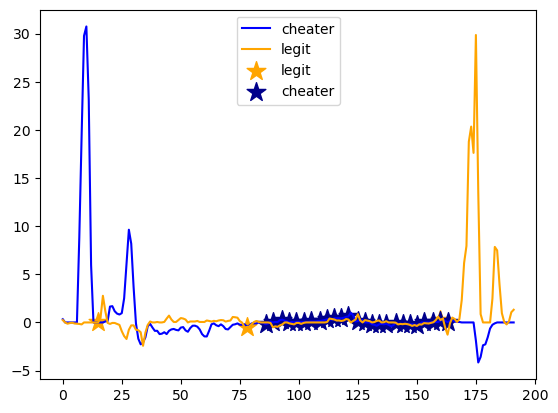

In [163]:
plt.plot(cheater_engagement.timestep_id, cheater_engagement.attacker_delta_yaw, color="blue", label="cheater")
plt.plot(legit_engagement.timestep_id, legit_engagement.attacker_delta_yaw, color="orange", label="legit")
plt.scatter(legit_engagement.timestep_id.loc[legit_engagement.firing == 1], \
            legit_engagement.attacker_delta_yaw.loc[legit_engagement.firing == 1], 
           marker='*', s=200, c="orange", label="legit")
plt.scatter(cheater_engagement.timestep_id.loc[cheater_engagement.firing == 1], \
            cheater_engagement.attacker_delta_yaw.loc[cheater_engagement.firing == 1], 
           marker='*', s=200, c="darkblue", label="cheater")
plt.legend(loc="best")

In [164]:
cheater_engagement = dataset.loc[(dataset.player_id == 1271) & (dataset.engagement_id == 21)]

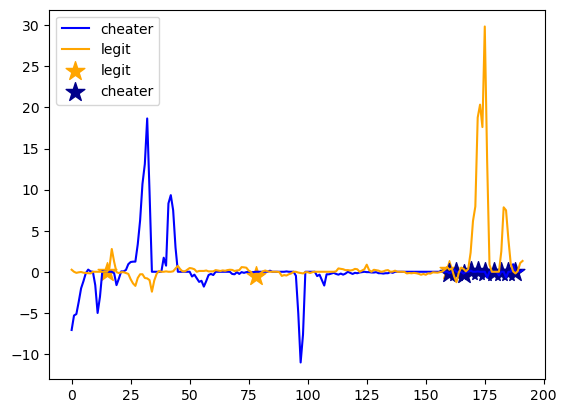

In [165]:
plt.plot(cheater_engagement.timestep_id, cheater_engagement.attacker_delta_yaw, color="blue", label="cheater")
plt.plot(legit_engagement.timestep_id, legit_engagement.attacker_delta_yaw, color="orange", label="legit")
plt.scatter(legit_engagement.timestep_id.loc[legit_engagement.firing == 1], \
            legit_engagement.attacker_delta_yaw.loc[legit_engagement.firing == 1], 
           marker='*', s=200, c="orange", label="legit")
plt.scatter(cheater_engagement.timestep_id.loc[cheater_engagement.firing == 1], \
            cheater_engagement.attacker_delta_yaw.loc[cheater_engagement.firing == 1], 
           marker='*', s=200, c="darkblue", label="cheater")
plt.legend(loc="best")

### However, it looks like maybe when cheaters shoot multiple times its in very quick succession i.e. delta time between shots for cheaters is much smaller than that of legit players. Need to check this more robustly. 

In [166]:
cheaters

player_id  engagement_id  timestep_id  attacker_delta_yaw  \
0                 0              0            0               0.000   
1                 0              0            1               0.000   
2                 0              0            2               0.000   
3                 0              0            3               0.000   
4                 0              0            4               0.000   
...             ...            ...          ...                 ...   
11519995       1999             29          187               0.247   
11519996       1999             29          188               0.192   
11519997       1999             29          189               0.291   
11519998       1999             29          190               0.291   
11519999       1999             29          191               0.286   

          attacker_delta_pitch  crosshair_tovictim_yaw  \
0                        0.000                  11.744   
1                        0.000                  11.548   
2                        0.000                  11.315   
3                        0.000                  11.136   
4                        0.000                  10.995   
...                        ...                     ...   
11519995                -0.049                  -2.104   
11519996                -0.049                  -2.118   
11519997                 0.000                  -2.227   
11519998                 0.000                  -2.371   
11519999                 0.049                  -2.544   

          crosshair_tovictim_pitch  firing  cheater  
0                           -0.741       0        1  
1                           -0.741       0        1  
2                           -0.741       0        1  
3                           -0.741       0        1  
4                           -0.741       0        1  
...                            ...     ...      ...  
11519995                   -10.250       0        1  
11519996                   -10.201       0        1  
11519997                   -10.196       1        1  
11519998                   -10.187       0        1  
11519999                   -10.227       0        1  

[11520000 rows x 9 columns]

In [167]:
def median_time_between_shots(groups, keys):
    median_time_between_shots_arr = []
    for key in keys:
        group = groups.get_group(key)
        firing_timesteps = group.timestep_id.loc[group.firing == 1]
        timesteps_diff = np.diff(firing_timesteps)
        median_time_between_shots_arr.append(np.median(timesteps_diff)) # tried both the median and the average
    return median_time_between_shots_arr

In [168]:
# time here is measureed in no. of timestep IDs
cheater_median_time_between_shots = median_time_between_shots(cheater_groups, cheater_keys)

/Users/asadm2/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/asadm2/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [169]:
legit_groups = legit.groupby(["player_id","engagement_id"])
legit_keys = legit_groups.groups.keys()

In [170]:
# time here is measured in no. of timestep IDs
legit_median_time_between_shots = median_time_between_shots(legit_groups, legit_keys)

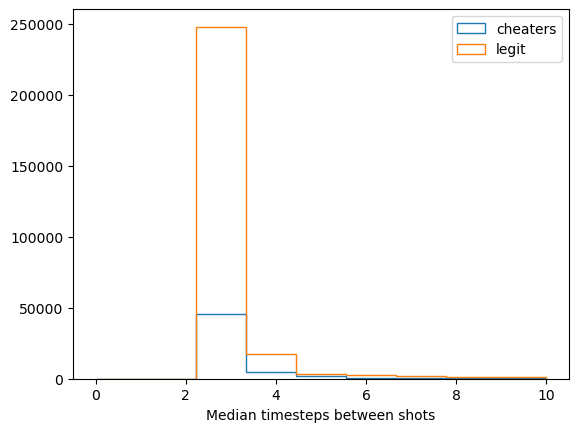

In [171]:
plt.hist(cheater_median_time_between_shots, histtype="step", bins=np.linspace(0,10,10), label="cheaters")
plt.hist(legit_median_time_between_shots, histtype="step", bins=np.linspace(0,10,10), label="legit")
plt.xlabel("Median timesteps between shots")
plt.legend()

In [174]:
stats.ks_2samp(cheater_median_time_between_shots, legit_median_time_between_shots)

KstestResult(statistic=0.0704866666666667, pvalue=1.8582786016578978e-216)

### Again, looks like there is not much of a difference actually between the average (not shown here) nor the median time between shots fired between cheaters and legit players. There are instances where legit players also shoot quickly in succession. 

In [175]:
# Get a sample of the first 30 cheaters and see the diff in timesteps 
i = 0
for key in cheater_keys:
    if i ==30:
        break
    group = cheater_groups.get_group(key)
    firing_timesteps = group.timestep_id.loc[group.firing == 1]
    timesteps_diff = np.diff(firing_timesteps)
    print(key)
    print(firing_timesteps)
    print(timesteps_diff)
    i+=1
    

(0, 0)
160    160
Name: timestep_id, dtype: int64
[]
(0, 1)
352    160
Name: timestep_id, dtype: int64
[]
(0, 2)
537    153
540    156
544    160
547    163
550    166
553    169
557    173
560    176
563    179
566    182
Name: timestep_id, dtype: int64
[3 4 3 3 3 4 3 3 3]
(0, 3)
726    150
729    153
733    157
736    160
739    163
742    166
746    170
749    173
752    176
755    179
Name: timestep_id, dtype: int64
[3 4 3 3 3 4 3 3 3]
(0, 4)
915    147
918    150
922    154
925    157
928    160
931    163
935    167
938    170
941    173
944    176
Name: timestep_id, dtype: int64
[3 4 3 3 3 4 3 3 3]
(0, 5)
1104    144
1107    147
1110    150
1113    153
1116    156
1120    160
1123    163
1127    167
1129    169
1133    173
Name: timestep_id, dtype: int64
[3 3 3 3 4 3 4 2 4]
(0, 6)
1308    156
1312    160
1315    163
1318    166
1321    169
1325    173
1328    176
1331    179
Name: timestep_id, dtype: int64
[4 3 3 3 4 3 3]
(0, 7)
1497    153
1501    157
1504    160
1507    163
15

In [176]:
# Get a sample of the first 30 legit players and see the diff in timesteps 

i = 0
for key in legit_keys:
    if i ==30:
        break
    group = legit_groups.get_group(key)
    firing_timesteps = group.timestep_id.loc[group.firing == 1]
    timesteps_diff = np.diff(firing_timesteps)
    print(key)
    print(firing_timesteps)
    print(timesteps_diff)
    i+=1
    

(2000, 0)
11520128    128
11520138    138
11520144    144
11520153    153
11520160    160
11520165    165
Name: timestep_id, dtype: int64
[10  6  9  7  5]
(2000, 1)
11520222     30
11520226     34
11520229     37
11520232     40
11520235     43
11520239     47
11520242     50
11520245     53
11520342    150
11520345    153
11520349    157
11520352    160
11520355    163
11520358    166
11520361    169
11520365    173
11520368    176
11520371    179
11520374    182
Name: timestep_id, dtype: int64
[ 4  3  3  3  4  3  3 97  3  4  3  3  3  3  4  3  3  3]
(2000, 2)
11520405     21
11520409     25
11520411     27
11520415     31
11520418     34
11520421     37
11520424     40
11520427     43
11520525    141
11520528    144
11520531    147
11520534    150
11520538    154
11520541    157
11520544    160
11520547    163
11520550    166
11520554    170
11520557    173
Name: timestep_id, dtype: int64
[ 4  2  4  3  3  3  3 98  3  3  3  4  3  3  3  3  4  3]
(2000, 3)
11520636     60
11520723    147

In [177]:
# get the first 30 legit player IDs to visually see the cases printed above where timestep 
# differences are small 
legit.player_id.unique()[:30] 

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029])

In [178]:
# get the first 30 cheater player IDs to visually see the cases printed above where timestep 
# differences are small and compare to legit players
cheaters.player_id.unique()[:30] 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

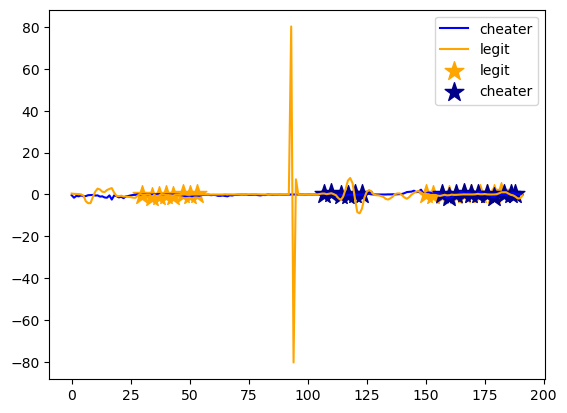

In [179]:
legit_engagement = dataset.loc[(dataset.player_id == 2000) & (dataset.engagement_id == 1)]
cheater_engagement = dataset.loc[(dataset.player_id == 0) & (dataset.engagement_id == 10)]
plt.plot(cheater_engagement.timestep_id, cheater_engagement.attacker_delta_yaw, color="blue", label="cheater")
plt.plot(legit_engagement.timestep_id, legit_engagement.attacker_delta_yaw, color="orange", label="legit")
plt.scatter(legit_engagement.timestep_id.loc[legit_engagement.firing == 1], \
            legit_engagement.attacker_delta_yaw.loc[legit_engagement.firing == 1], 
           marker='*', s=200, c="orange", label="legit")
plt.scatter(cheater_engagement.timestep_id.loc[cheater_engagement.firing == 1], \
            cheater_engagement.attacker_delta_yaw.loc[cheater_engagement.firing == 1], 
           marker='*', s=200, c="darkblue", label="cheater")
plt.legend(loc="best")

In [180]:
legit_engagement.loc[legit_engagement.firing==1]

player_id  engagement_id  timestep_id  attacker_delta_yaw  \
11520222       2000              1           30              -0.170   
11520226       2000              1           34              -1.203   
11520229       2000              1           37              -0.516   
11520232       2000              1           40              -0.302   
11520235       2000              1           43              -0.544   
11520239       2000              1           47               0.000   
11520242       2000              1           50              -0.143   
11520245       2000              1           53               0.000   
11520342       2000              1          150               0.264   
11520345       2000              1          153              -0.187   
11520349       2000              1          157              -0.445   
11520352       2000              1          160              -0.330   
11520355       2000              1          163              -0.159   
11520358       2000              1          166               0.049   
11520361       2000              1          169               0.011   
11520365       2000              1          173               0.104   
11520368       2000              1          176               0.055   
11520371       2000              1          179               0.027   
11520374       2000              1          182               1.044   

          attacker_delta_pitch  crosshair_tovictim_yaw  \
11520222                 0.000                  37.083   
11520226                 0.764                  84.310   
11520229                 0.132                  92.641   
11520232                 0.450                  94.600   
11520235                 0.406                  96.190   
11520239                 0.148                  95.487   
11520242                 0.302                  94.083   
11520245                 0.148                  92.089   
11520342                -0.082                  -1.246   
11520345                 0.066                  -2.074   
11520349                 0.319                  -0.847   
11520352                 0.264                   0.331   
11520355                 0.385                   0.875   
11520358                 0.632                   0.906   
11520361                 0.423                   0.868   
11520365                 0.214                   0.324   
11520368                 0.093                  -0.061   
11520371                 0.110                  -0.099   
11520374                 0.198                  -1.830   

          crosshair_tovictim_pitch  firing  cheater  
11520222                    88.755       1        0  
11520226                    87.634       1        0  
11520229                    86.126       1        0  
11520232                    84.465       1        0  
11520235                    82.704       1        0  
11520239                    81.441       1        0  
11520242                    79.707       1        0  
11520245                    78.760       1        0  
11520342                    -0.379       1        0  
11520345                    -0.577       1        0  
11520349                    -1.609       1        0  
11520352                    -2.516       1        0  
11520355                    -3.669       1        0  
11520358                    -5.251       1        0  
11520361                    -6.993       1        0  
11520365                    -7.932       1        0  
11520368                    -8.366       1        0  
11520371                    -8.553       1        0  
11520374                    -9.053       1        0

### The above is an example of a situation where a legit player does both things: large gap between shots and also shots fired one after the other very quickly. But looking at the timesteps diff printed above for both cheaters and legit players, perhaps the median and the average aren't helpful but rather the max time diff. Just looking at those two arrays for the first 30 cheaters and legit players, it seems like legit players have at least one very large time difference and that that difference is larger than the largest difference for cheaters. 

### Get the max time diff between shots for cheaters and legit players

In [182]:
def max_time_between_shots(groups, keys):
    max_time_between_shots_arr = []
    for key in keys:
        group = groups.get_group(key)
        firing_timesteps = group.timestep_id.loc[group.firing == 1]
        timesteps_diff = np.diff(firing_timesteps)
        if len(timesteps_diff) > 1:
            max_time_between_shots_arr.append(max(timesteps_diff))
    return max_time_between_shots_arr

In [183]:
cheater_max_time_between_shots = max_time_between_shots(cheater_groups, cheater_keys)

In [184]:
legit_max_time_between_shots = max_time_between_shots(legit_groups, legit_keys)

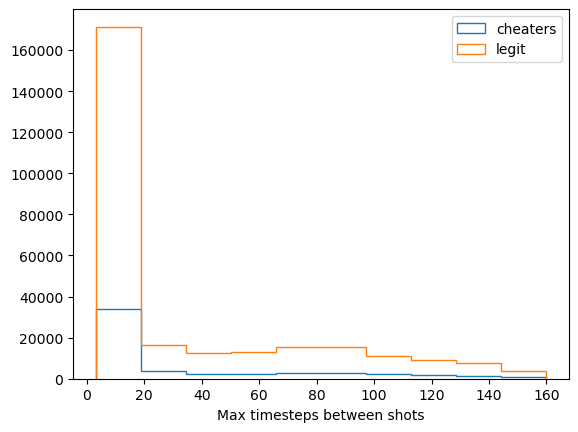

In [185]:
plt.hist(cheater_max_time_between_shots, histtype="step", label="cheaters")
plt.hist(legit_max_time_between_shots, histtype="step", label="legit")
plt.xlabel("Max timesteps between shots")
plt.legend()

In [186]:
stats.ks_2samp(cheater_max_time_between_shots, legit_max_time_between_shots)

KstestResult(statistic=0.020258245440611555, pvalue=1.769393286290856e-16)

### Looks like there is not as clear a separation between the two distributions as it seemed there might be. Out of curiosity, I'm still going to add the median and max to the dataframe and see what feature importance tells us. 

---

### Subplots for project report of attacker delta yaw experiments

In [3]:
cheater_engagement_a = dataset.loc[(dataset.player_id == 1) & (dataset.engagement_id == 0)]

In [4]:
legit_engagement_a = dataset.loc[(dataset.player_id == 11999) & (dataset.engagement_id == 0)]

In [5]:
cheater_engagement_b = dataset.loc[(dataset.player_id == 1999) & (dataset.engagement_id == 27)]

In [6]:
cheater_engagement_c = dataset.loc[(dataset.player_id == 1271) & (dataset.engagement_id == 21)]

In [7]:
legit_engagement_b = dataset.loc[(dataset.player_id == 2000) & (dataset.engagement_id == 1)]
cheater_engagement_d = dataset.loc[(dataset.player_id == 0) & (dataset.engagement_id == 10)]

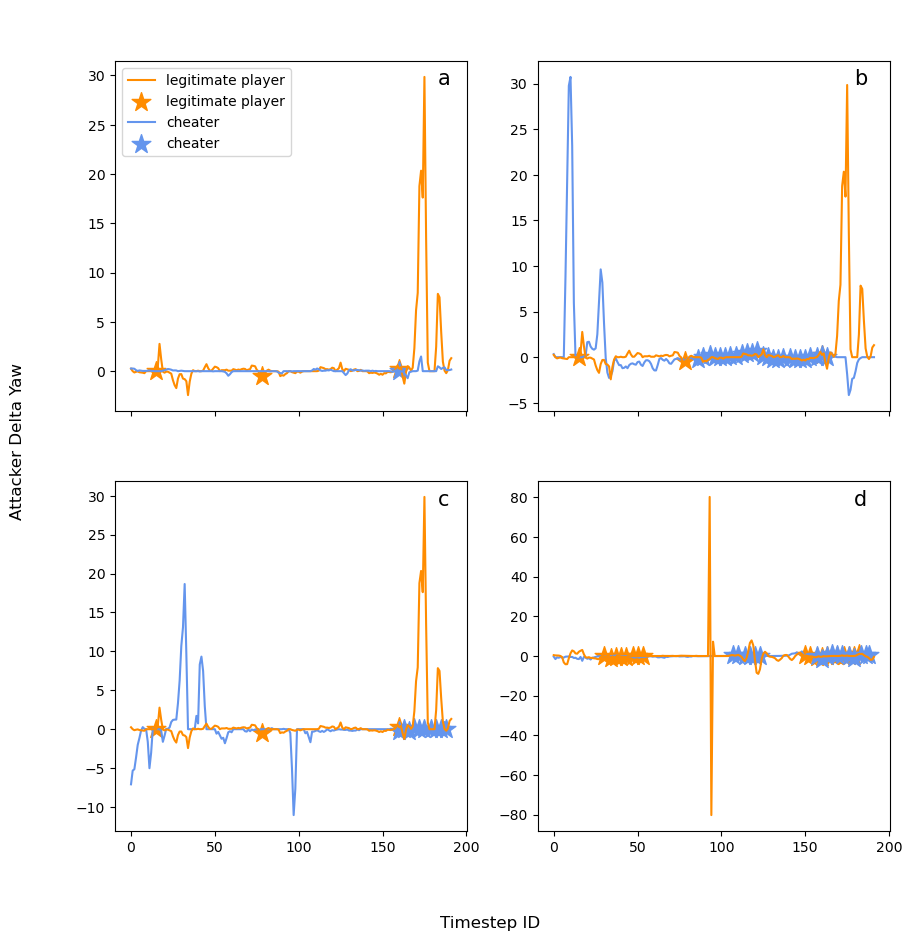

In [9]:
fig, axs = plt.subplots(2,2, figsize=(10,10), sharex=True)
axs[0,0].plot(legit_engagement_a.timestep_id, legit_engagement_a.attacker_delta_yaw, color="darkorange", label="legitimate player")
axs[0,0].scatter(legit_engagement_a.timestep_id.loc[legit_engagement_a.firing == 1], \
            legit_engagement_a.attacker_delta_yaw.loc[legit_engagement_a.firing == 1], 
           marker='*', s=200, c="darkorange", label="legitimate player")
axs[0,0].plot(cheater_engagement_a.timestep_id, cheater_engagement_a.attacker_delta_yaw, color="cornflowerblue", label="cheater")
axs[0,0].scatter(cheater_engagement_a.timestep_id.loc[cheater_engagement_a.firing == 1], \
            cheater_engagement_a.attacker_delta_yaw.loc[cheater_engagement_a.firing == 1], 
           marker='*', s=200, c="cornflowerblue", label="cheater")
axs[0,0].annotate(
    "a",
    xy=(0, 1), xycoords='subfigure fraction',
    xytext=(+21, -3.3), textcoords='offset fontsize',
    fontsize=15, verticalalignment='top',
    bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
    
axs[0,1].plot(cheater_engagement_b.timestep_id, cheater_engagement_b.attacker_delta_yaw, color="cornflowerblue")
axs[0,1].plot(legit_engagement_a.timestep_id, legit_engagement_a.attacker_delta_yaw, color="darkorange")
axs[0,1].scatter(legit_engagement_a.timestep_id.loc[legit_engagement_a.firing == 1], \
            legit_engagement_a.attacker_delta_yaw.loc[legit_engagement_a.firing == 1], 
           marker='*', s=200, c="darkorange")
axs[0,1].scatter(cheater_engagement_b.timestep_id.loc[cheater_engagement_b.firing == 1], \
            cheater_engagement_b.attacker_delta_yaw.loc[cheater_engagement_b.firing == 1], 
           marker='*', s=200, c="cornflowerblue")
axs[0,1].annotate(
    "b",
    xy=(0, 1), xycoords='subfigure fraction',
    xytext=(+41, -3.3), textcoords='offset fontsize',
    fontsize=15, verticalalignment='top',
    bbox=dict(facecolor='none', edgecolor='none', pad=3.0))

axs[1,0].plot(cheater_engagement_c.timestep_id, cheater_engagement_c.attacker_delta_yaw, color="cornflowerblue")
axs[1,0].plot(legit_engagement_a.timestep_id, legit_engagement_a.attacker_delta_yaw, color="darkorange")
axs[1,0].scatter(legit_engagement_a.timestep_id.loc[legit_engagement_a.firing == 1], \
            legit_engagement_a.attacker_delta_yaw.loc[legit_engagement_a.firing == 1], 
           marker='*', s=200, c="darkorange",)
axs[1,0].scatter(cheater_engagement_c.timestep_id.loc[cheater_engagement_c.firing == 1], \
            cheater_engagement_c.attacker_delta_yaw.loc[cheater_engagement_c.firing == 1], 
           marker='*', s=200, c="cornflowerblue")
axs[1,0].annotate(
    "c",
    xy=(0, 1), xycoords='subfigure fraction',
    xytext=(+21, -23.5), textcoords='offset fontsize',
    fontsize=15, verticalalignment='top',
    bbox=dict(facecolor='none', edgecolor='none', pad=3.0))

axs[1,1].plot(cheater_engagement_d.timestep_id, cheater_engagement_d.attacker_delta_yaw, color="cornflowerblue")
axs[1,1].plot(legit_engagement_b.timestep_id, legit_engagement_b.attacker_delta_yaw, color="darkorange")
axs[1,1].scatter(legit_engagement_b.timestep_id.loc[legit_engagement_b.firing == 1], \
            legit_engagement_b.attacker_delta_yaw.loc[legit_engagement_b.firing == 1], 
           marker='*', s=200, c="darkorange")
axs[1,1].scatter(cheater_engagement_d.timestep_id.loc[cheater_engagement_d.firing == 1], \
            cheater_engagement_d.attacker_delta_yaw.loc[cheater_engagement_d.firing == 1], 
           marker='*', s=200, c="cornflowerblue")
axs[1,1].annotate(
    "d",
    xy=(0, 1), xycoords='subfigure fraction',
    xytext=(+41, -23.5), textcoords='offset fontsize',
    fontsize=15, verticalalignment='top',
    bbox=dict(facecolor='none', edgecolor='none', pad=3.0))

fig.supxlabel("Timestep ID")
fig.supylabel("Attacker Delta Yaw")
axs[0,0].legend(loc="upper left")

---

### Experimenting with rolling windows and creating rolling window IDs

In [39]:
cheater_engagement = cheaters.iloc[:192]
cheater_engagement

player_id  engagement_id  timestep_id  attacker_delta_yaw  \
0            0              0            0               0.000   
1            0              0            1               0.000   
2            0              0            2               0.000   
3            0              0            3               0.000   
4            0              0            4               0.000   
..         ...            ...          ...                 ...   
187          0              0          187              -3.406   
188          0              0          188              -1.818   
189          0              0          189              -1.318   
190          0              0          190              -0.055   
191          0              0          191              -0.110   

     attacker_delta_pitch  crosshair_tovictim_yaw  crosshair_tovictim_pitch  \
0                   0.000                  11.744                    -0.741   
1                   0.000                  11.548                    -0.741   
2                   0.000                  11.315                    -0.741   
3                   0.000                  11.136                    -0.741   
4                   0.000                  10.995                    -0.741   
..                    ...                     ...                       ...   
187                 0.489                   7.307                    -3.758   
188                 0.220                   8.941                    -3.986   
189                 0.170                  10.119                    -4.166   
190                 0.000                  10.152                    -4.169   
191                 0.000                  10.202                    -4.178   

     firing  cheater  
0         0        1  
1         0        1  
2         0        1  
3         0        1  
4         0        1  
..      ...      ...  
187       0        1  
188       0        1  
189       0        1  
190       0        1  
191       0        1  

[192 rows x 9 columns]

In [40]:
window_size = 32
cheater_engagement.attacker_delta_yaw.rolling(window=window_size).mean().values[window_size-1:]

array([-0.16515625, -0.16      , -0.1409375 , -0.12378125, -0.09975   ,
       -0.0963125 , -0.09459375, -0.06884375, -0.04825   , -0.041375  ,
       -0.006875  ,  0.02575   ,  0.0756875 ,  0.12890625,  0.1786875 ,
        0.25440625,  0.28359375,  0.295625  ,  0.30421875,  0.31640625,
        0.32328125,  0.331875  ,  0.3353125 ,  0.3353125 ,  0.33703125,
        0.33703125,  0.33703125,  0.33703125,  0.33309375,  0.32846875,
        0.32315625,  0.316625  ,  0.30375   ,  0.2955    ,  0.27575   ,
        0.25859375,  0.23609375,  0.26321875,  0.36621875,  0.4939375 ,
        0.606375  ,  0.6369375 ,  0.6024375 ,  0.57840625,  0.554375  ,
        0.52690625,  0.50459375,  0.4615    ,  0.45290625,  0.4445    ,
        0.4410625 ,  0.440875  ,  0.44171875,  0.44171875,  0.438625  ,
        0.427125  ,  0.40875   ,  0.40584375,  0.40584375,  0.4043125 ,
        0.403625  ,  0.40190625,  0.40721875,  0.4103125 ,  0.41115625,
        0.41578125,  0.4195625 ,  0.4195625 ,  0.41803125,  0.38

In [41]:
cheater_groups['attacker_delta_yaw'].\
        rolling(window=window_size).mean().dropna().reset_index(level=[0,1], drop=True)

31         -0.165156
32         -0.160000
33         -0.140937
34         -0.123781
35         -0.099750
              ...   
11519995    0.204156
11519996    0.208625
11519997    0.217719
11519998    0.226812
11519999    0.235750
Name: attacker_delta_yaw, Length: 9660000, dtype: float64

### Implementing above rolling window calc as a function (removing dropna as I will do this once I have added the new data to the existing dataframe - cleaner to merge without any mismatch between number of rows and then remove all rows where the engineered features are NANs)

In [42]:
cheaters

player_id  engagement_id  timestep_id  attacker_delta_yaw  \
0                 0              0            0               0.000   
1                 0              0            1               0.000   
2                 0              0            2               0.000   
3                 0              0            3               0.000   
4                 0              0            4               0.000   
...             ...            ...          ...                 ...   
11519995       1999             29          187               0.247   
11519996       1999             29          188               0.192   
11519997       1999             29          189               0.291   
11519998       1999             29          190               0.291   
11519999       1999             29          191               0.286   

          attacker_delta_pitch  crosshair_tovictim_yaw  \
0                        0.000                  11.744   
1                        0.000                  11.548   
2                        0.000                  11.315   
3                        0.000                  11.136   
4                        0.000                  10.995   
...                        ...                     ...   
11519995                -0.049                  -2.104   
11519996                -0.049                  -2.118   
11519997                 0.000                  -2.227   
11519998                 0.000                  -2.371   
11519999                 0.049                  -2.544   

          crosshair_tovictim_pitch  firing  cheater  
0                           -0.741       0        1  
1                           -0.741       0        1  
2                           -0.741       0        1  
3                           -0.741       0        1  
4                           -0.741       0        1  
...                            ...     ...      ...  
11519995                   -10.250       0        1  
11519996                   -10.201       0        1  
11519997                   -10.196       1        1  
11519998                   -10.187       0        1  
11519999                   -10.227       0        1  

[11520000 rows x 9 columns]

In [43]:
cheaters.attacker_delta_yaw.diff().rolling(window=32).sum()/32

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
              ...   
11519995    0.004625
11519996    0.004469
11519997    0.009094
11519998    0.009094
11519999    0.008937
Name: attacker_delta_yaw, Length: 11520000, dtype: float64

In [7]:
def rolling_window_calc(data, colname, window_size, stat):
    if stat == "std":
        return data[colname].rolling(window=window_size).std().reset_index(level=[0,1], drop=True)
    elif stat == "roc":
        col_diff = data[colname].diff()
        return col_diff.rolling(window=window_size).sum()/window_size
    else:
        print("Unrecognized stat")

### rate of change of yaw and pitch. The motivation for this measurement is that it captures movement speeds - if they are unusually high, it could signal a cheater.

In [8]:
def rate_of_change_attacker_yaw_pitch(groups, window_size):
    roc_yaw = rolling_window_calc(groups, "attacker_delta_yaw", window_size, "roc")
    roc_pitch = rolling_window_calc(groups, "attacker_delta_pitch", window_size, "roc")
    return [roc_yaw, roc_pitch]

In [9]:
def rate_of_change_crosshair_yaw_pitch(groups, window_size):
    roc_yaw = rolling_window_calc(groups, "crosshair_tovictim_yaw", window_size, "roc")
    roc_pitch = rolling_window_calc(groups, "crosshair_tovictim_pitch", window_size, "roc")
    return [roc_yaw, roc_pitch]

In [10]:
roc_attacker_yaw_cheaters, roc_attacker_pitch_cheaters = \
    rate_of_change_attacker_yaw_pitch(groups=cheater_groups, window_size=32)
roc_attacker_yaw_legit, roc_attacker_pitch_legit = \
    rate_of_change_attacker_yaw_pitch(groups=legit_groups, window_size=32)

In [11]:
roc_crosshair_yaw_cheaters, roc_crosshair_pitch_cheaters = \
    rate_of_change_crosshair_yaw_pitch(groups=cheater_groups, window_size=32)
roc_crosshair_yaw_legit, roc_crosshair_pitch_legit = \
    rate_of_change_crosshair_yaw_pitch(groups=legit_groups, window_size=32)

### Yaw and pitch consistency. Motivation here is that if someone is using an aimbot, their aim patters might be erratic. Legit players might have smoother, more consistent movements.  

In [12]:
def attacker_movement_consistency(groups, window_size):
    yaw_consistency = rolling_window_calc(groups, "attacker_delta_yaw", window_size, "std")
    pitch_consistency = rolling_window_calc(groups, "attacker_delta_pitch", window_size, "std")
    return [yaw_consistency, pitch_consistency]

In [13]:
def crosshair_movement_consistency(groups, window_size):
    yaw_consistency = rolling_window_calc(groups, "crosshair_tovictim_yaw", window_size, "std")
    pitch_consistency = rolling_window_calc(groups, "crosshair_tovictim_pitch", window_size, "std")
    return [yaw_consistency, pitch_consistency]

In [14]:
attacker_yaw_consistency_cheaters, attacker_pitch_consistency_cheaters = attacker_movement_consistency(groups=cheater_groups, window_size=32)
attacker_yaw_consistency_legit, attacker_pitch_consistency_legit = attacker_movement_consistency(groups=legit_groups, window_size=32)

In [15]:
crosshair_yaw_consistency_cheaters, crosshair_pitch_consistency_cheaters = crosshair_movement_consistency(groups=cheater_groups, window_size=32)
crosshair_yaw_consistency_legit, crosshair_pitch_consistency_legit = crosshair_movement_consistency(groups=legit_groups, window_size=32)

### Combine above features into new df with cheater column

In [16]:
df_cheaters = pd.DataFrame({"attacker_yaw_roc":roc_attacker_yaw_cheaters, \
                            "attacker_pitch_roc":roc_attacker_pitch_cheaters, \
                            "attacker_yaw_consistency":attacker_yaw_consistency_cheaters, \
                            "attacker_pitch_consistency":attacker_pitch_consistency_cheaters, \
                            "crosshair_yaw_roc":roc_crosshair_yaw_cheaters, \
                            "crosshair_pitch_roc":roc_crosshair_pitch_cheaters, \
                            "crosshair_yaw_consistency":crosshair_yaw_consistency_cheaters, \
                            "crosshair_pitch_consistency":crosshair_pitch_consistency_cheaters})

In [17]:
df_cheaters

attacker_yaw_roc  attacker_pitch_roc  attacker_yaw_consistency  \
0                      NaN                 NaN                       NaN   
1                      NaN                 NaN                       NaN   
2                      NaN                 NaN                       NaN   
3                      NaN                 NaN                       NaN   
4                      NaN                 NaN                       NaN   
...                    ...                 ...                       ...   
11519995          0.004625       -1.562500e-04                  0.212362   
11519996          0.004469        1.375000e-03                  0.210488   
11519997          0.009094        3.093750e-03                  0.207448   
11519998          0.009094        1.531250e-03                  0.203945   
11519999          0.008938       -2.677546e-15                  0.199912   

          attacker_pitch_consistency  crosshair_yaw_roc  crosshair_pitch_roc  \
0                                NaN                NaN                  NaN   
1                                NaN                NaN                  NaN   
2                                NaN                NaN                  NaN   
3                                NaN                NaN                  NaN   
4                                NaN                NaN                  NaN   
...                              ...                ...                  ...   
11519995                    0.303218          -0.045031            -0.318625   
11519996                    0.301405          -0.050312            -0.319531   
11519997                    0.297492          -0.059375            -0.322000   
11519998                    0.295658          -0.068750            -0.322875   
11519999                    0.295658          -0.078906            -0.322281   

          crosshair_yaw_consistency  crosshair_pitch_consistency  
0                               NaN                          NaN  
1                               NaN                          NaN  
2                               NaN                          NaN  
3                               NaN                          NaN  
4                               NaN                          NaN  
...                             ...                          ...  
11519995                   0.844394                     4.057954  
11519996                   0.908818                     3.978722  
11519997                   0.973709                     3.865970  
11519998                   1.039044                     3.718676  
11519999                   1.104639                     3.540021  

[11520000 rows x 8 columns]

In [18]:
df_cheaters["cheater"] = np.ones(len(df_cheaters), dtype=int)
df_cheaters

attacker_yaw_roc  attacker_pitch_roc  attacker_yaw_consistency  \
0                      NaN                 NaN                       NaN   
1                      NaN                 NaN                       NaN   
2                      NaN                 NaN                       NaN   
3                      NaN                 NaN                       NaN   
4                      NaN                 NaN                       NaN   
...                    ...                 ...                       ...   
11519995          0.004625       -1.562500e-04                  0.212362   
11519996          0.004469        1.375000e-03                  0.210488   
11519997          0.009094        3.093750e-03                  0.207448   
11519998          0.009094        1.531250e-03                  0.203945   
11519999          0.008938       -2.677546e-15                  0.199912   

          attacker_pitch_consistency  crosshair_yaw_roc  crosshair_pitch_roc  \
0                                NaN                NaN                  NaN   
1                                NaN                NaN                  NaN   
2                                NaN                NaN                  NaN   
3                                NaN                NaN                  NaN   
4                                NaN                NaN                  NaN   
...                              ...                ...                  ...   
11519995                    0.303218          -0.045031            -0.318625   
11519996                    0.301405          -0.050312            -0.319531   
11519997                    0.297492          -0.059375            -0.322000   
11519998                    0.295658          -0.068750            -0.322875   
11519999                    0.295658          -0.078906            -0.322281   

          crosshair_yaw_consistency  crosshair_pitch_consistency  cheater  
0                               NaN                          NaN        1  
1                               NaN                          NaN        1  
2                               NaN                          NaN        1  
3                               NaN                          NaN        1  
4                               NaN                          NaN        1  
...                             ...                          ...      ...  
11519995                   0.844394                     4.057954        1  
11519996                   0.908818                     3.978722        1  
11519997                   0.973709                     3.865970        1  
11519998                   1.039044                     3.718676        1  
11519999                   1.104639                     3.540021        1  

[11520000 rows x 9 columns]

In [19]:
df_cheaters.isna().sum()

attacker_yaw_roc               1920000
attacker_pitch_roc             1920000
attacker_yaw_consistency       1860000
attacker_pitch_consistency     1860000
crosshair_yaw_roc              1920000
crosshair_pitch_roc            1920000
crosshair_yaw_consistency      1860000
crosshair_pitch_consistency    1860000
cheater                              0
dtype: int64

In [20]:
df_legit = pd.DataFrame({"attacker_yaw_roc":roc_attacker_yaw_legit, \
                         "attacker_pitch_roc":roc_attacker_pitch_legit, \
                         "attacker_yaw_consistency":attacker_yaw_consistency_legit, \
                         "attacker_pitch_consistency":attacker_pitch_consistency_legit, \
                         "crosshair_yaw_roc":roc_crosshair_yaw_legit, \
                         "crosshair_pitch_roc":roc_crosshair_pitch_legit, \
                         "crosshair_yaw_consistency":crosshair_yaw_consistency_legit, \
                         "crosshair_pitch_consistency":crosshair_pitch_consistency_legit})

In [21]:
df_legit["cheater"] = np.zeros(len(df_legit), dtype=int)
df_legit

attacker_yaw_roc  attacker_pitch_roc  attacker_yaw_consistency  \
11520000               NaN                 NaN                       NaN   
11520001               NaN                 NaN                       NaN   
11520002               NaN                 NaN                       NaN   
11520003               NaN                 NaN                       NaN   
11520004               NaN                 NaN                       NaN   
...                    ...                 ...                       ...   
69119995         -0.026438            0.001531                  0.499004   
69119996         -0.019938           -0.003437                  0.498284   
69119997         -0.017500           -0.007719                  0.489131   
69119998          0.006000           -0.009781                  0.493980   
69119999         -0.013375           -0.011656                  0.469694   

          attacker_pitch_consistency  crosshair_yaw_roc  crosshair_pitch_roc  \
11520000                         NaN                NaN                  NaN   
11520001                         NaN                NaN                  NaN   
11520002                         NaN                NaN                  NaN   
11520003                         NaN                NaN                  NaN   
11520004                         NaN                NaN                  NaN   
...                              ...                ...                  ...   
69119995                    0.133551           0.171969            -0.031063   
69119996                    0.133988           0.169625            -0.014469   
69119997                    0.130520           0.171844             0.002156   
69119998                    0.122595           0.153875             0.017844   
69119999                    0.101665           0.154875             0.036375   

          crosshair_yaw_consistency  crosshair_pitch_consistency  cheater  
11520000                        NaN                          NaN        0  
11520001                        NaN                          NaN        0  
11520002                        NaN                          NaN        0  
11520003                        NaN                          NaN        0  
11520004                        NaN                          NaN        0  
...                             ...                          ...      ...  
69119995                   2.025731                     1.012580        0  
69119996                   2.122340                     0.998158        0  
69119997                   2.191595                     0.999729        0  
69119998                   2.219448                     1.007820        0  
69119999                   2.187625                     1.009992        0  

[57600000 rows x 9 columns]

In [22]:
df_legit.isna().sum()

attacker_yaw_roc               9600000
attacker_pitch_roc             9600000
attacker_yaw_consistency       9300000
attacker_pitch_consistency     9300000
crosshair_yaw_roc              9600000
crosshair_pitch_roc            9600000
crosshair_yaw_consistency      9300000
crosshair_pitch_consistency    9300000
cheater                              0
dtype: int64

In [23]:
df_combined = pd.concat([df_cheaters, df_legit])
df_combined

attacker_yaw_roc  attacker_pitch_roc  attacker_yaw_consistency  \
0                      NaN                 NaN                       NaN   
1                      NaN                 NaN                       NaN   
2                      NaN                 NaN                       NaN   
3                      NaN                 NaN                       NaN   
4                      NaN                 NaN                       NaN   
...                    ...                 ...                       ...   
69119995         -0.026438            0.001531                  0.499004   
69119996         -0.019938           -0.003437                  0.498284   
69119997         -0.017500           -0.007719                  0.489131   
69119998          0.006000           -0.009781                  0.493980   
69119999         -0.013375           -0.011656                  0.469694   

          attacker_pitch_consistency  crosshair_yaw_roc  crosshair_pitch_roc  \
0                                NaN                NaN                  NaN   
1                                NaN                NaN                  NaN   
2                                NaN                NaN                  NaN   
3                                NaN                NaN                  NaN   
4                                NaN                NaN                  NaN   
...                              ...                ...                  ...   
69119995                    0.133551           0.171969            -0.031063   
69119996                    0.133988           0.169625            -0.014469   
69119997                    0.130520           0.171844             0.002156   
69119998                    0.122595           0.153875             0.017844   
69119999                    0.101665           0.154875             0.036375   

          crosshair_yaw_consistency  crosshair_pitch_consistency  cheater  
0                               NaN                          NaN        1  
1                               NaN                          NaN        1  
2                               NaN                          NaN        1  
3                               NaN                          NaN        1  
4                               NaN                          NaN        1  
...                             ...                          ...      ...  
69119995                   2.025731                     1.012580        0  
69119996                   2.122340                     0.998158        0  
69119997                   2.191595                     0.999729        0  
69119998                   2.219448                     1.007820        0  
69119999                   2.187625                     1.009992        0  

[69120000 rows x 9 columns]

In [24]:
dataset

player_id  engagement_id  timestep_id  attacker_delta_yaw  \
0                 0              0            0               0.000   
1                 0              0            1               0.000   
2                 0              0            2               0.000   
3                 0              0            3               0.000   
4                 0              0            4               0.000   
...             ...            ...          ...                 ...   
69119995      11999             29          187              -0.758   
69119996      11999             29          188              -0.253   
69119997      11999             29          189               0.000   
69119998      11999             29          190               0.505   
69119999      11999             29          191               0.654   

          attacker_delta_pitch  crosshair_tovictim_yaw  \
0                        0.000                  11.744   
1                        0.000                  11.548   
2                        0.000                  11.315   
3                        0.000                  11.136   
4                        0.000                  10.995   
...                        ...                     ...   
69119995                 0.049                   9.195   
69119996                 0.000                   9.211   
69119997                 0.000                   9.115   
69119998                 0.000                   8.535   
69119999                 0.055                   7.880   

          crosshair_tovictim_pitch  firing  cheater  
0                           -0.741       0        1  
1                           -0.741       0        1  
2                           -0.741       0        1  
3                           -0.741       0        1  
4                           -0.741       0        1  
...                            ...     ...      ...  
69119995                    -1.017       0        0  
69119996                    -1.013       0        0  
69119997                    -1.019       0        0  
69119998                    -1.022       0        0  
69119999                    -1.081       0        0  

[69120000 rows x 9 columns]

In [25]:
df_combined["firing"] = dataset["firing"] # safe to assume the order of the rows is the same (all the cheaters first and then the non cheaters) so firing can be added

In [26]:
df_combined

attacker_yaw_roc  attacker_pitch_roc  attacker_yaw_consistency  \
0                      NaN                 NaN                       NaN   
1                      NaN                 NaN                       NaN   
2                      NaN                 NaN                       NaN   
3                      NaN                 NaN                       NaN   
4                      NaN                 NaN                       NaN   
...                    ...                 ...                       ...   
69119995         -0.026438            0.001531                  0.499004   
69119996         -0.019938           -0.003437                  0.498284   
69119997         -0.017500           -0.007719                  0.489131   
69119998          0.006000           -0.009781                  0.493980   
69119999         -0.013375           -0.011656                  0.469694   

          attacker_pitch_consistency  crosshair_yaw_roc  crosshair_pitch_roc  \
0                                NaN                NaN                  NaN   
1                                NaN                NaN                  NaN   
2                                NaN                NaN                  NaN   
3                                NaN                NaN                  NaN   
4                                NaN                NaN                  NaN   
...                              ...                ...                  ...   
69119995                    0.133551           0.171969            -0.031063   
69119996                    0.133988           0.169625            -0.014469   
69119997                    0.130520           0.171844             0.002156   
69119998                    0.122595           0.153875             0.017844   
69119999                    0.101665           0.154875             0.036375   

          crosshair_yaw_consistency  crosshair_pitch_consistency  cheater  \
0                               NaN                          NaN        1   
1                               NaN                          NaN        1   
2                               NaN                          NaN        1   
3                               NaN                          NaN        1   
4                               NaN                          NaN        1   
...                             ...                          ...      ...   
69119995                   2.025731                     1.012580        0   
69119996                   2.122340                     0.998158        0   
69119997                   2.191595                     0.999729        0   
69119998                   2.219448                     1.007820        0   
69119999                   2.187625                     1.009992        0   

          firing  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
69119995       0  
69119996       0  
69119997       0  
69119998       0  
69119999       0  

[69120000 rows x 10 columns]

### See how extreme rate of change values are using zscore (do this in the end so that it's calculated on the column after cheaters and legit players rates of change have been combined into one df)

In [27]:
from scipy import stats

In [28]:
df_combined["attacker_roc_yaw_zscore"] = stats.zscore(df_combined.attacker_yaw_roc)
df_combined["attacker_roc_pitch_zscore"] = stats.zscore(df_combined.attacker_pitch_roc)

In [29]:
df_combined["crosshair_roc_yaw_zscore"] = stats.zscore(df_combined.crosshair_yaw_roc)
df_combined["crosshair_roc_pitch_zscore"] = stats.zscore(df_combined.crosshair_pitch_roc)

In [30]:
df_combined

attacker_yaw_roc  attacker_pitch_roc  attacker_yaw_consistency  \
0                      NaN                 NaN                       NaN   
1                      NaN                 NaN                       NaN   
2                      NaN                 NaN                       NaN   
3                      NaN                 NaN                       NaN   
4                      NaN                 NaN                       NaN   
...                    ...                 ...                       ...   
69119995         -0.026438            0.001531                  0.499004   
69119996         -0.019938           -0.003437                  0.498284   
69119997         -0.017500           -0.007719                  0.489131   
69119998          0.006000           -0.009781                  0.493980   
69119999         -0.013375           -0.011656                  0.469694   

          attacker_pitch_consistency  crosshair_yaw_roc  crosshair_pitch_roc  \
0                                NaN                NaN                  NaN   
1                                NaN                NaN                  NaN   
2                                NaN                NaN                  NaN   
3                                NaN                NaN                  NaN   
4                                NaN                NaN                  NaN   
...                              ...                ...                  ...   
69119995                    0.133551           0.171969            -0.031063   
69119996                    0.133988           0.169625            -0.014469   
69119997                    0.130520           0.171844             0.002156   
69119998                    0.122595           0.153875             0.017844   
69119999                    0.101665           0.154875             0.036375   

          crosshair_yaw_consistency  crosshair_pitch_consistency  cheater  \
0                               NaN                          NaN        1   
1                               NaN                          NaN        1   
2                               NaN                          NaN        1   
3                               NaN                          NaN        1   
4                               NaN                          NaN        1   
...                             ...                          ...      ...   
69119995                   2.025731                     1.012580        0   
69119996                   2.122340                     0.998158        0   
69119997                   2.191595                     0.999729        0   
69119998                   2.219448                     1.007820        0   
69119999                   2.187625                     1.009992        0   

          firing  attacker_roc_yaw_zscore  attacker_roc_pitch_zscore  \
0              0                      NaN                        NaN   
1              0                      NaN                        NaN   
2              0                      NaN                        NaN   
3              0                      NaN                        NaN   
4              0                      NaN                        NaN   
...          ...                      ...                        ...   
69119995       0                      NaN                        NaN   
69119996       0                      NaN                        NaN   
69119997       0                      NaN                        NaN   
69119998       0                      NaN                        NaN   
69119999       0                      NaN                        NaN   

          crosshair_roc_yaw_zscore  crosshair_roc_pitch_zscore  
0                              NaN                         NaN  
1                              NaN                         NaN  
2                              NaN                         NaN  
3                              NaN                         NaN  
4                    

### Shots fired right after sudden movement (aim-snap) by first identifying sharp yaw change using roc zscores and then check if in the next row, firing=1

In [31]:
df_combined["attacker_sharp_yaw_change"] = df_combined.attacker_roc_yaw_zscore > 2
df_combined["attacker_sharp_pitch_change"] = df_combined.attacker_roc_pitch_zscore > 2

In [32]:
df_combined["crosshair_sharp_yaw_change"] = df_combined.crosshair_roc_yaw_zscore > 2
df_combined["crosshair_sharp_pitch_change"] = df_combined.crosshair_roc_pitch_zscore > 2

In [33]:
df_combined["shots_after_attacker_sharp_yaw_change"] = df_combined.firing * df_combined.attacker_sharp_yaw_change.shift(1)
df_combined["shots_after_attacker_sharp_pitch_change"] = df_combined.firing * df_combined.attacker_sharp_pitch_change.shift(1)

In [34]:
df_combined["shots_after_crosshair_sharp_yaw_change"] = df_combined.firing * df_combined.crosshair_sharp_yaw_change.shift(1)
df_combined["shots_after_crosshair_sharp_pitch_change"] = df_combined.firing * df_combined.crosshair_sharp_pitch_change.shift(1)

In [35]:
df_combined

attacker_yaw_roc  attacker_pitch_roc  attacker_yaw_consistency  \
0                      NaN                 NaN                       NaN   
1                      NaN                 NaN                       NaN   
2                      NaN                 NaN                       NaN   
3                      NaN                 NaN                       NaN   
4                      NaN                 NaN                       NaN   
...                    ...                 ...                       ...   
69119995         -0.026438            0.001531                  0.499004   
69119996         -0.019938           -0.003437                  0.498284   
69119997         -0.017500           -0.007719                  0.489131   
69119998          0.006000           -0.009781                  0.493980   
69119999         -0.013375           -0.011656                  0.469694   

          attacker_pitch_consistency  crosshair_yaw_roc  crosshair_pitch_roc  \
0                                NaN                NaN                  NaN   
1                                NaN                NaN                  NaN   
2                                NaN                NaN                  NaN   
3                                NaN                NaN                  NaN   
4                                NaN                NaN                  NaN   
...                              ...                ...                  ...   
69119995                    0.133551           0.171969            -0.031063   
69119996                    0.133988           0.169625            -0.014469   
69119997                    0.130520           0.171844             0.002156   
69119998                    0.122595           0.153875             0.017844   
69119999                    0.101665           0.154875             0.036375   

          crosshair_yaw_consistency  crosshair_pitch_consistency  cheater  \
0                               NaN                          NaN        1   
1                               NaN                          NaN        1   
2                               NaN                          NaN        1   
3                               NaN                          NaN        1   
4                               NaN                          NaN        1   
...                             ...                          ...      ...   
69119995                   2.025731                     1.012580        0   
69119996                   2.122340                     0.998158        0   
69119997                   2.191595                     0.999729        0   
69119998                   2.219448                     1.007820        0   
69119999                   2.187625                     1.009992        0   

          firing  ...  crosshair_roc_yaw_zscore  crosshair_roc_pitch_zscore  \
0              0  ...                       NaN                         NaN   
1              0  ...                       NaN                         NaN   
2              0  ...                       NaN                         NaN   
3              0  ...                       NaN                         NaN   
4              0  ...                       NaN                         NaN   
...          ...  ...                       ...                         ...   
69119995       0  ...                       NaN                         NaN   
69119996       0  ...                       NaN                         NaN   
69119997       0  ...                       NaN                         NaN   
69119998       0  ...                       NaN                         NaN   
69119999       0  ...                       NaN                         NaN   

          attacker_sharp_yaw_change  attacker_sharp_pitch_change  \
0                             False                        False   
1                             False                        False   
2                             False                       

In [36]:
df_combined[df_combined.select_dtypes(include='bool').columns] = \
    df_combined[df_combined.select_dtypes(include='bool').columns].astype(int)

In [37]:
df_combined

attacker_yaw_roc  attacker_pitch_roc  attacker_yaw_consistency  \
0                      NaN                 NaN                       NaN   
1                      NaN                 NaN                       NaN   
2                      NaN                 NaN                       NaN   
3                      NaN                 NaN                       NaN   
4                      NaN                 NaN                       NaN   
...                    ...                 ...                       ...   
69119995         -0.026438            0.001531                  0.499004   
69119996         -0.019938           -0.003437                  0.498284   
69119997         -0.017500           -0.007719                  0.489131   
69119998          0.006000           -0.009781                  0.493980   
69119999         -0.013375           -0.011656                  0.469694   

          attacker_pitch_consistency  crosshair_yaw_roc  crosshair_pitch_roc  \
0                                NaN                NaN                  NaN   
1                                NaN                NaN                  NaN   
2                                NaN                NaN                  NaN   
3                                NaN                NaN                  NaN   
4                                NaN                NaN                  NaN   
...                              ...                ...                  ...   
69119995                    0.133551           0.171969            -0.031063   
69119996                    0.133988           0.169625            -0.014469   
69119997                    0.130520           0.171844             0.002156   
69119998                    0.122595           0.153875             0.017844   
69119999                    0.101665           0.154875             0.036375   

          crosshair_yaw_consistency  crosshair_pitch_consistency  cheater  \
0                               NaN                          NaN        1   
1                               NaN                          NaN        1   
2                               NaN                          NaN        1   
3                               NaN                          NaN        1   
4                               NaN                          NaN        1   
...                             ...                          ...      ...   
69119995                   2.025731                     1.012580        0   
69119996                   2.122340                     0.998158        0   
69119997                   2.191595                     0.999729        0   
69119998                   2.219448                     1.007820        0   
69119999                   2.187625                     1.009992        0   

          firing  ...  crosshair_roc_yaw_zscore  crosshair_roc_pitch_zscore  \
0              0  ...                       NaN                         NaN   
1              0  ...                       NaN                         NaN   
2              0  ...                       NaN                         NaN   
3              0  ...                       NaN                         NaN   
4              0  ...                       NaN                         NaN   
...          ...  ...                       ...                         ...   
69119995       0  ...                       NaN                         NaN   
69119996       0  ...                       NaN                         NaN   
69119997       0  ...                       NaN                         NaN   
69119998       0  ...                       NaN                         NaN   
69119999       0  ...                       NaN                         NaN   

          attacker_sharp_yaw_change  attacker_sharp_pitch_change  \
0                                 0                            0   
1                                 0                            0   
2                                 0                       

In [98]:
df_combined.dropna(inplace=True) # shots_after_* columns have 1 Nan each (just the first row)

In [ ]:
df_combined.to_parquet('combined_dataset.parquet', engine='pyarrow', compression='snappy') # using parquet as its faster to load

## Models
1. XGBoost
2. Isolation Forest
3. LSTM (Google Colab)

In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_parquet('combined_dataset.parquet', engine='pyarrow')

In [4]:
df

attacker_yaw_roc  attacker_pitch_roc  attacker_yaw_consistency  \
33                0.019062       -1.718750e-03                  0.357932   
34                0.017156       -3.437500e-03                  0.377526   
35                0.024031       -1.718750e-03                  0.408836   
36                0.003437       -2.168404e-19                  0.410162   
37                0.001719       -1.718750e-03                  0.410694   
...                    ...                 ...                       ...   
69119995         -0.026438        1.531250e-03                  0.499004   
69119996         -0.019938       -3.437500e-03                  0.498284   
69119997         -0.017500       -7.718750e-03                  0.489131   
69119998          0.006000       -9.781250e-03                  0.493980   
69119999         -0.013375       -1.165625e-02                  0.469694   

          attacker_pitch_consistency  crosshair_yaw_roc  crosshair_pitch_roc  \
33                          0.070523           0.089687            -0.034500   
34                          0.073239           0.080813            -0.032531   
35                          0.073840           0.063875            -0.032281   
36                          0.073840           0.066781            -0.033750   
37                          0.074395           0.070781            -0.033500   
...                              ...                ...                  ...   
69119995                    0.133551           0.171969            -0.031063   
69119996                    0.133988           0.169625            -0.014469   
69119997                    0.130520           0.171844             0.002156   
69119998                    0.122595           0.153875             0.017844   
69119999                    0.101665           0.154875             0.036375   

          crosshair_yaw_consistency  crosshair_pitch_consistency  cheater  \
33                         2.108673                     0.492902        1   
34                         2.058172                     0.501136        1   
35                         2.000216                     0.506786        1   
36                         1.932076                     0.511980        1   
37                         1.852607                     0.514628        1   
...                             ...                          ...      ...   
69119995                   2.025731                     1.012580        0   
69119996                   2.122340                     0.998158        0   
69119997                   2.191595                     0.999729        0   
69119998                   2.219448                     1.007820        0   
69119999                   2.187625                     1.009992        0   

          firing  ...  crosshair_roc_yaw_zscore  crosshair_roc_pitch_zscore  \
33             0  ...                  0.070944                   -0.062323   
34             0  ...                  0.064023                   -0.053707   
35             0  ...                  0.050815                   -0.052612   
36             0  ...                  0.053082                   -0.059040   
37             0  ...                  0.056201                   -0.057946   
...          ...  ...                       ...                         ...   
69119995       0  ...                  0.135106                   -0.047279   
69119996       0  ...                  0.133278                    0.025344   
69119997       0  ...                  0.135008                    0.098104   
69119998       0  ...                  0.120996                    0.166760   
69119999       0  ...                  0.121776                    0.247862   

          attacker_sharp_yaw_change  attacker_sharp_pitch_change  \
33                                0                            0   
34                                0                            0   
35                                0                       

<AxesSubplot:>

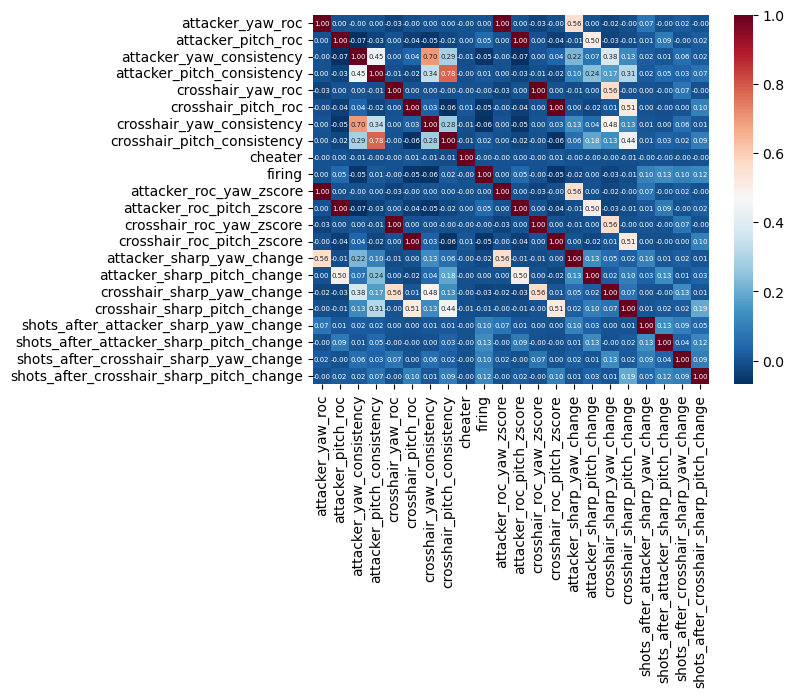

In [6]:
sns.heatmap(df[:].corr(), annot=True, fmt=".2f", cmap="RdBu_r", annot_kws={"size": 5})

### There do seem to be some highly correlated variables. This can affect feature importance.

In [14]:
# code from https://datascience.stackexchange.com/questions/52570/automatically-remove-highly-correlated-features-using-variance-inflation-factor
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

/Users/asadm2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [16]:
to_drop

['attacker_roc_yaw_zscore',
 'attacker_roc_pitch_zscore',
 'crosshair_roc_yaw_zscore',
 'crosshair_roc_pitch_zscore']

In [17]:
# add cheater column to list
to_drop = to_drop + ['cheater']

In [18]:
X = df.drop(to_drop, axis=1)
y = df.cheater

In [19]:
df.loc[df.cheater==1].shape

(9599999, 22)

In [20]:
df.loc[df.cheater==0].shape

(48000000, 22)

In [21]:
48000000/9599999 # for setting scale_pos_weight in xgboost aka the class imbalance ratio

5.000000520833388

In [46]:
X

attacker_yaw_roc  attacker_pitch_roc  attacker_yaw_consistency  \
33                0.019062       -1.718750e-03                  0.357932   
34                0.017156       -3.437500e-03                  0.377526   
35                0.024031       -1.718750e-03                  0.408836   
36                0.003437       -2.168404e-19                  0.410162   
37                0.001719       -1.718750e-03                  0.410694   
...                    ...                 ...                       ...   
69119995         -0.026438        1.531250e-03                  0.499004   
69119996         -0.019938       -3.437500e-03                  0.498284   
69119997         -0.017500       -7.718750e-03                  0.489131   
69119998          0.006000       -9.781250e-03                  0.493980   
69119999         -0.013375       -1.165625e-02                  0.469694   

          attacker_pitch_consistency  crosshair_yaw_roc  crosshair_pitch_roc  \
33                          0.070523           0.089687            -0.034500   
34                          0.073239           0.080813            -0.032531   
35                          0.073840           0.063875            -0.032281   
36                          0.073840           0.066781            -0.033750   
37                          0.074395           0.070781            -0.033500   
...                              ...                ...                  ...   
69119995                    0.133551           0.171969            -0.031063   
69119996                    0.133988           0.169625            -0.014469   
69119997                    0.130520           0.171844             0.002156   
69119998                    0.122595           0.153875             0.017844   
69119999                    0.101665           0.154875             0.036375   

          crosshair_yaw_consistency  crosshair_pitch_consistency  firing  \
33                         2.108673                     0.492902       0   
34                         2.058172                     0.501136       0   
35                         2.000216                     0.506786       0   
36                         1.932076                     0.511980       0   
37                         1.852607                     0.514628       0   
...                             ...                          ...     ...   
69119995                   2.025731                     1.012580       0   
69119996                   2.122340                     0.998158       0   
69119997                   2.191595                     0.999729       0   
69119998                   2.219448                     1.007820       0   
69119999                   2.187625                     1.009992       0   

          attacker_sharp_yaw_change  attacker_sharp_pitch_change  \
33                                0                            0   
34                                0                            0   
35                                0                            0   
36                                0                            0   
37                                0                            0   
...                             ...                          ...   
69119995                          0                            0   
69119996                          0                            0   
69119997                          0                            0   
69119998                          0                            0   
69119999                          0                            0   

          crosshair_sharp_yaw_change  crosshair_sharp_pitch_change  \
33                                 0                             0   
34                                 0                             0   
35                                 0                             0   
36                                 0                             0   
37                                 0                    

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31, stratify=y)

### XGBoost

In [53]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [106]:
import xgboost

In [132]:
# Custom F1 evaluation function
def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    y_pred = np.where(y_pred > 0.5, 1, 0)  # Convert probabilities to binary
    f1 = f1_score(y_true, y_pred)
    return 'f1', f1

In [133]:
params = {
    'objective': 'binary:logistic',
    'n_estimators': 100,
    'scale_pos_weight': 5,
    'learning_rate': 0.1,
    'max_depth': 6,
    'reg_alpha': 0.5,
    'reg_lambda': 1,
    'subsample': 0.8,
    'max_delta_step':1,
    'colsample_bytree': 0.8,
    'tree_method': 'hist',
    'n_jobs': -1,
    'seed': 31
}

In [110]:
# Convert data to DMatrix, which is required by XGBoost
dtrain = xgboost.DMatrix(X_train, label=y_train)
dtest = xgboost.DMatrix(X_test, label=y_test)

In [141]:
# Train the model with the custom F1 evaluation metric
xgb_model_f1 = xgboost.train(params, dtrain, num_boost_round=50, 
                evals=[(dtrain, 'train')],
                custom_metric=f1_eval,
                maximize=True,  # maximize F1 score
                early_stopping_rounds=10,
                verbose_eval=True)

[23:24:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.69281	train-f1:0.27331
[1]	train-logloss:0.69028	train-f1:0.29941
[2]	train-logloss:0.68373	train-f1:0.34332
[3]	train-logloss:0.67762	train-f1:0.34495
[4]	train-logloss:0.67256	train-f1:0.34637
[5]	train-logloss:0.66735	train-f1:0.34649
[6]	train-logloss:0.66330	train-f1:0.34494
[7]	train-logloss:0.65896	train-f1:0.34506
[8]	train-logloss:0.65706	train-f1:0.34554
[9]	train-logloss:0.65314	train-f1:0.34623
[10]	train-logloss:0.64969	train-f1:0.34522
[11]	train-logloss:0.64655	train-f1:0.34544
[12]	train-logloss:0.64

In [153]:
y_pred_proba_f1 = xgb_model_f1.predict(dtest)
y_pred_f1 = np.where(y_pred_proba_f1 > 0.5, 1, 0)  # Convert probabilities to binary

In [154]:
f1 = f1_score(y_test, y_pred_f1)
print(f1)

roc_auc = roc_auc_score(y_test, y_pred_proba_f1)
print(roc_auc)

0.3603627737227532
0.6952385794494085


In [155]:
print(classification_report(y_test, y_pred_f1, target_names=["not cheater", "cheater"]))

              precision    recall  f1-score   support

 not cheater       0.89      0.70      0.78   9600000
     cheater       0.27      0.55      0.36   1920000

    accuracy                           0.68  11520000
   macro avg       0.58      0.62      0.57  11520000
weighted avg       0.78      0.68      0.71  11520000



### Testing XGB with AUC as eval metric instead of F1

In [2]:
xgb_model = XGBClassifier()

In [3]:
xgb_model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)>

In [120]:
xgb_model = XGBClassifier(
    objective="binary:logistic",
    n_estimators=100,        # fewer trees for faster training
    scale_pos_weight=5,      # balance the class weights based on class imbalance ratio
    learning_rate=0.1,       # lower value so model learns more slowly and prevents overfitting but also balancing lower number of estimators
    max_depth=6,             # smaller tree depth for better generalization
    reg_alpha=0.5,           # L1 reg for feature selection by keeping weights of less important features ~ 0
    reg_lambda=1,            # default value for L2 reg
    subsample=0.8,           # Use 80% of the data for each tree (reduces overfitting)
    colsample_bytree=0.8,    # Use 80% of features for each tree (reduces overfitting)
    max_delta_step=1,        # prevents the model from making aggressive weight updates that disproportionately favor the majority non-cheater class
    eval_metric="auc",       # useful for imbalanced datasets - f1 not supported directly
    tree_method='hist',      # faster tree building method helpful for big datasets
    n_jobs=-1,               
    seed=31
    
)

In [121]:
xgb_model.fit(X_train, y_train) #took ~7 minutes

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=1, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=31,
              reg_alpha=0.5, reg_lambda=1, ...)

In [122]:
y_pred = xgb_model.predict(X_test)

In [123]:
print(classification_report(y_test, y_pred, target_names=["not cheater", "cheater"]))

              precision    recall  f1-score   support

 not cheater       0.89      0.72      0.80   9600000
     cheater       0.28      0.54      0.37   1920000

    accuracy                           0.69  11520000
   macro avg       0.58      0.63      0.58  11520000
weighted avg       0.79      0.69      0.72  11520000



In [140]:
# Make predictions on the test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(roc_auc)

0.7018496874909131


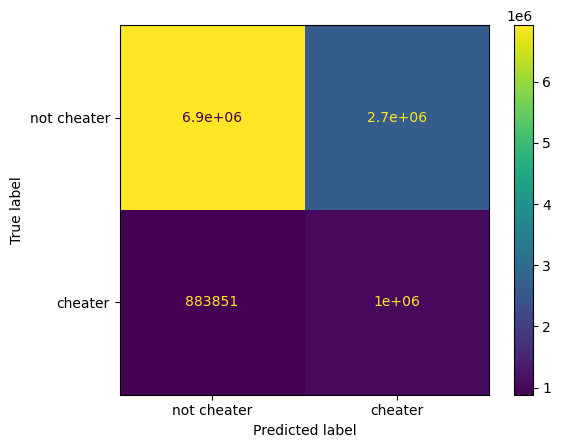

In [125]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["not cheater", "cheater"])
disp.plot()

In [126]:
xgb_model.feature_importances_

array([2.14788765e-01, 7.01275945e-01, 1.15608685e-02, 1.38178486e-02,
       6.03156583e-03, 8.85606185e-03, 8.88241176e-03, 1.27613135e-02,
       1.05200121e-02, 5.43703046e-03, 2.22557061e-03, 5.51771547e-04,
       2.51416652e-03, 0.00000000e+00, 0.00000000e+00, 5.94427693e-04,
       1.82287040e-04], dtype=float32)

In [130]:
df_feature_importance_combined = pd.DataFrame({"feature":X_train.columns,"importance":xgb_model.feature_importances_}).\
    sort_values("importance", ascending=False)

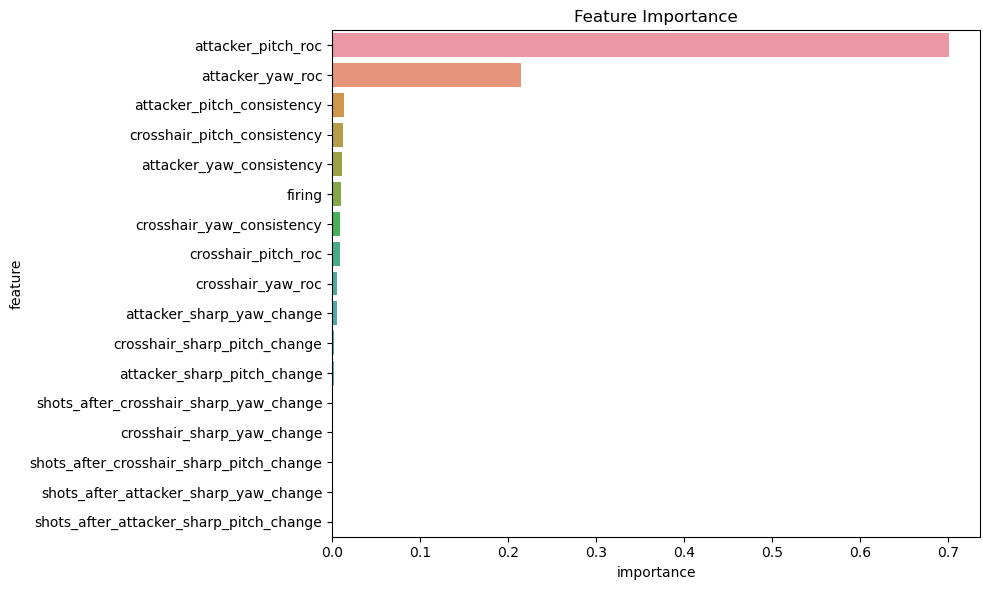

In [131]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=df_feature_importance_combined)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### Isolation forest (maybe only use important features from xgboost)

In [79]:
from sklearn.ensemble import IsolationForest

In [81]:
#subset of X based on feature importance
# it seems only attacker_pitch_roc and attacker_yaw_roc were useful 
# use the same X_train as XGBoost above
X_train_iso = X_train[['attacker_pitch_roc','attacker_yaw_roc']]

In [83]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination="auto", random_state=31)

# Fit the model to the data
iso_forest.fit(X_train_iso)

IsolationForest(random_state=31)

In [84]:
X_test_iso = X_test[['attacker_pitch_roc','attacker_yaw_roc']]

In [85]:
y_pred_iso = iso_forest.predict(X_test_iso)

In [86]:
y_pred_iso = pd.Series(y_pred_iso).map({1: 0, -1: 1})

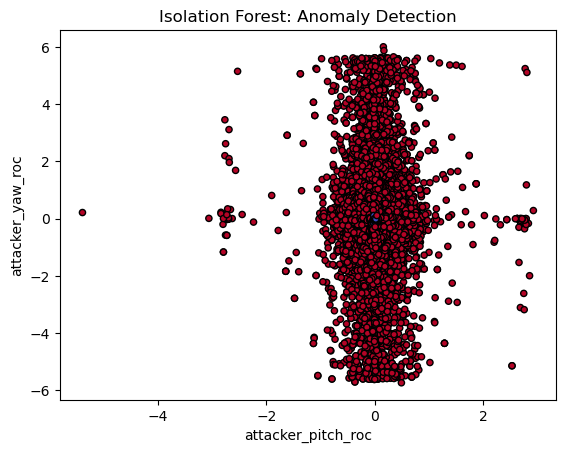

In [93]:
# Plot the data points and anomalies (blue is 0 i.e. normal and red is 1 i.e. anomaly)
plt.scatter(X_test_iso.iloc[:,0], X_test_iso.iloc[:,1], c=y_pred_iso, \
            cmap='coolwarm', edgecolor='k', s=20)
plt.title('Isolation Forest: Anomaly Detection')
plt.xlabel(X_test_iso.columns[0])
plt.ylabel(X_test_iso.columns[1])
plt.show()

In [87]:
print(classification_report(y_test, y_pred_iso)) 

              precision    recall  f1-score   support

           0       0.83      0.89      0.86   9600000
           1       0.16      0.10      0.13   1920000

    accuracy                           0.76  11520000
   macro avg       0.50      0.50      0.50  11520000
weighted avg       0.72      0.76      0.74  11520000



In [88]:
# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, -iso_forest.score_samples(X_test_iso))
print(auc_roc)

AUC-ROC: 0.4994169914479709


# END

### LSTM in google colab but code below was for processing data to fit on gc's disk. However, model wasn't implemented due to computational issues. 

### I want to keep all the features for LSTM because its supposed to deal with sequential data better than XGBoost and so I dont want to rely on XGBoost's feature importance

In [4]:
# Prepare dataset to be just the two features considered to be important from XGBoost

In [8]:
# Drop correlated columns
to_drop = ['attacker_roc_yaw_zscore',
 'attacker_roc_pitch_zscore',
 'crosshair_roc_yaw_zscore',
 'crosshair_roc_pitch_zscore']

In [9]:
df_lstm = df.drop(to_drop, axis=1)

In [10]:
df_lstm

attacker_yaw_roc  attacker_pitch_roc  attacker_yaw_consistency  \
33                0.019062       -1.718750e-03                  0.357932   
34                0.017156       -3.437500e-03                  0.377526   
35                0.024031       -1.718750e-03                  0.408836   
36                0.003437       -2.168404e-19                  0.410162   
37                0.001719       -1.718750e-03                  0.410694   
...                    ...                 ...                       ...   
69119995         -0.026438        1.531250e-03                  0.499004   
69119996         -0.019938       -3.437500e-03                  0.498284   
69119997         -0.017500       -7.718750e-03                  0.489131   
69119998          0.006000       -9.781250e-03                  0.493980   
69119999         -0.013375       -1.165625e-02                  0.469694   

          attacker_pitch_consistency  crosshair_yaw_roc  crosshair_pitch_roc  \
33                          0.070523           0.089687            -0.034500   
34                          0.073239           0.080813            -0.032531   
35                          0.073840           0.063875            -0.032281   
36                          0.073840           0.066781            -0.033750   
37                          0.074395           0.070781            -0.033500   
...                              ...                ...                  ...   
69119995                    0.133551           0.171969            -0.031063   
69119996                    0.133988           0.169625            -0.014469   
69119997                    0.130520           0.171844             0.002156   
69119998                    0.122595           0.153875             0.017844   
69119999                    0.101665           0.154875             0.036375   

          crosshair_yaw_consistency  crosshair_pitch_consistency  cheater  \
33                         2.108673                     0.492902        1   
34                         2.058172                     0.501136        1   
35                         2.000216                     0.506786        1   
36                         1.932076                     0.511980        1   
37                         1.852607                     0.514628        1   
...                             ...                          ...      ...   
69119995                   2.025731                     1.012580        0   
69119996                   2.122340                     0.998158        0   
69119997                   2.191595                     0.999729        0   
69119998                   2.219448                     1.007820        0   
69119999                   2.187625                     1.009992        0   

          firing  attacker_sharp_yaw_change  attacker_sharp_pitch_change  \
33             0                          0                            0   
34             0                          0                            0   
35             0                          0                            0   
36             0                          0                            0   
37             0                          0                            0   
...          ...                        ...                          ...   
69119995       0                          0                            0   
69119996       0                          0                            0   
69119997       0                          0                            0   
69119998       0                          0                            0   
69119999       0                          0                            0   

          crosshair_sharp_yaw_change  crosshair_sharp_pitch_change  \
33                                 0                             0   
34                                 0                             0   
35                                 0                             0   
36                

In [11]:
df_lstm.to_parquet('lstm_dataset.parquet', engine='pyarrow', compression='snappy')

### Reduced size since dataset doesn't fit on google colab

In [12]:
df_lstm_reduced = df_lstm[['attacker_pitch_roc','attacker_yaw_roc','crosshair_sharp_yaw_change',\
                           'shots_after_crosshair_sharp_yaw_change','cheater']]

In [13]:
df_lstm_reduced.to_parquet('lstm_dataset_reduced.parquet', engine='pyarrow', compression='snappy')

In [14]:
df_lstm_reduced.to_csv('lstm_dataset_reduced.csv', index=False)

### Keep original df_combined, drop correlated columns and keep the 4 columns of interest from above but replace NANs with zeros so reshaping is simpler in LSTM without the need for padding. This was getting too complex since the number of rows with NANs was not uniform across engagements. 

In [38]:
df_lstm_reduced = df_combined[['attacker_pitch_roc','attacker_yaw_roc','crosshair_sharp_yaw_change',\
                           'shots_after_crosshair_sharp_yaw_change','cheater']]


In [40]:
df_lstm_reduced.isna().sum()

attacker_pitch_roc                        11520000
attacker_yaw_roc                          11520000
crosshair_sharp_yaw_change                       0
shots_after_crosshair_sharp_yaw_change           1
cheater                                          0
dtype: int64

In [41]:
df_lstm_reduced.shape

(69120000, 5)

In [42]:
df_lstm_reduced.fillna(0, inplace=True)

/Users/asadm2/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [43]:
# confirm shape
df_lstm_reduced.shape

(69120000, 5)

In [44]:
df_lstm_reduced.isna().sum()

attacker_pitch_roc                        0
attacker_yaw_roc                          0
crosshair_sharp_yaw_change                0
shots_after_crosshair_sharp_yaw_change    0
cheater                                   0
dtype: int64

In [46]:
df_lstm_reduced.to_csv('lstm_dataset_reduced.csv', index=False)

---

### Fun visualization of aim accuracy between cheaters and legitimate players where you can actually see firing patterns of most used guns in CS:GO like the AK-47 and M4A1

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
cheaters = pd.read_csv("cheaters.csv", index_col="Unnamed: 0")
legits = pd.read_csv("legit.csv", index_col="Unnamed: 0")

In [43]:
cheaters

player_id  engagement_id  timestep_id  attacker_delta_yaw  \
0                 0              0            0               0.000   
1                 0              0            1               0.000   
2                 0              0            2               0.000   
3                 0              0            3               0.000   
4                 0              0            4               0.000   
...             ...            ...          ...                 ...   
11519995       1999             29          187               0.247   
11519996       1999             29          188               0.192   
11519997       1999             29          189               0.291   
11519998       1999             29          190               0.291   
11519999       1999             29          191               0.286   

          attacker_delta_pitch  crosshair_tovictim_yaw  \
0                        0.000                  11.744   
1                        0.000                  11.548   
2                        0.000                  11.315   
3                        0.000                  11.136   
4                        0.000                  10.995   
...                        ...                     ...   
11519995                -0.049                  -2.104   
11519996                -0.049                  -2.118   
11519997                 0.000                  -2.227   
11519998                 0.000                  -2.371   
11519999                 0.049                  -2.544   

          crosshair_tovictim_pitch  firing  cheater   roc_yaw  roc_pitch  \
0                           -0.741       0        1       NaN        NaN   
1                           -0.741       0        1       NaN        NaN   
2                           -0.741       0        1       NaN        NaN   
3                           -0.741       0        1       NaN        NaN   
4                           -0.741       0        1       NaN        NaN   
...                            ...     ...      ...       ...        ...   
11519995                   -10.250       0        1  0.204156   0.314437   
11519996                   -10.201       0        1  0.208625   0.315812   
11519997                   -10.196       1        1  0.217719   0.318906   
11519998                   -10.187       0        1  0.226812   0.320437   
11519999                   -10.227       0        1  0.235750   0.320437   

          yaw_consistency  pitch_consistency  yaw_smoothness  \
0                     NaN                NaN             NaN   
1                     NaN                NaN             NaN   
2                     NaN                NaN             NaN   
3                     NaN                NaN             NaN   
4                     NaN                NaN             NaN   
...                   ...                ...             ...   
11519995         0.961359           1.037003        0.212362   
11519996         0.991148           1.047802        0.210488   
11519997         1.049509           1.071982        0.207448   
11519998         1.112126           1.083812        0.203945   
11519999         1.179271           1.083812        0.199912   

          pitch_smoothness  time_between_shots  
0                      NaN                   1  
1                      NaN                   2  
2                      NaN                   3  
3                      NaN                   4  
4                      NaN                   5  
...                    ...                 ...  
11519995          0.303218                   1  
11519996          0.301405                   2  
11519997          0.297492                   0  
11519998          0.295658                   1  
11519999          0.295658                   2  

[11520000 rows x 16 columns]

In [44]:
legits

player_id  engagement_id  timestep_id  attacker_delta_yaw  \
11520000       2000              0            0               0.011   
11520001       2000              0            1               0.016   
11520002       2000              0            2               0.000   
11520003       2000              0            3              -0.016   
11520004       2000              0            4              -0.077   
...             ...            ...          ...                 ...   
69119995      11999             29          187              -0.758   
69119996      11999             29          188              -0.253   
69119997      11999             29          189               0.000   
69119998      11999             29          190               0.505   
69119999      11999             29          191               0.654   

          attacker_delta_pitch  crosshair_tovictim_yaw  \
11520000                 0.000                 -21.562   
11520001                -0.016                 -21.647   
11520002                 0.000                 -21.759   
11520003                 0.000                 -21.979   
11520004                -0.011                 -22.219   
...                        ...                     ...   
69119995                 0.049                   9.195   
69119996                 0.000                   9.211   
69119997                 0.000                   9.115   
69119998                 0.000                   8.535   
69119999                 0.055                   7.880   

          crosshair_tovictim_pitch  firing  cheater   roc_yaw  roc_pitch  \
11520000                   -80.020       0        0       NaN        NaN   
11520001                   -80.148       0        0       NaN        NaN   
11520002                   -80.290       0        0       NaN        NaN   
11520003                   -80.422       0        0       NaN        NaN   
11520004                   -80.538       0        0       NaN        NaN   
...                            ...     ...      ...       ...        ...   
69119995                    -1.017       0        0  0.058531   0.073219   
69119996                    -1.013       0        0  0.038594   0.069781   
69119997                    -1.019       0        0  0.021094   0.062062   
69119998                    -1.022       0        0  0.027094   0.052281   
69119999                    -1.081       0        0  0.013719   0.040625   

          yaw_consistency  pitch_consistency  yaw_smoothness  \
11520000              NaN                NaN             NaN   
11520001              NaN                NaN             NaN   
11520002              NaN                NaN             NaN   
11520003              NaN                NaN             NaN   
11520004              NaN                NaN             NaN   
...                   ...                ...             ...   
69119995         0.117296           0.548247        0.499004   
69119996         0.077453           0.520801        0.498284   
69119997         0.043125           0.475504        0.489131   
69119998         0.054848           0.426455        0.493980   
69119999         0.029208           0.399595        0.469694   

          pitch_smoothness  time_between_shots  
11520000               NaN                   1  
11520001               NaN                   2  
11520002               NaN                   3  
11520003               NaN                   4  
11520004               NaN                   5  
...                    ...                 ...  
69119995          0.133551                  27  
69119996          0.133988                  28  
69119997          0.130520                  29  
69119998          0.122595                  30  
69119999          0.101665                  31  

[57600000 rows x 16 columns]

In [89]:
random_cheater_ids = np.random.randint(0, 2000, 6)
random_engagement_ids = np.random.randint(0, 30, 6)

Text(0.02, 0.5, 'Crosshair To Victim Pitch')

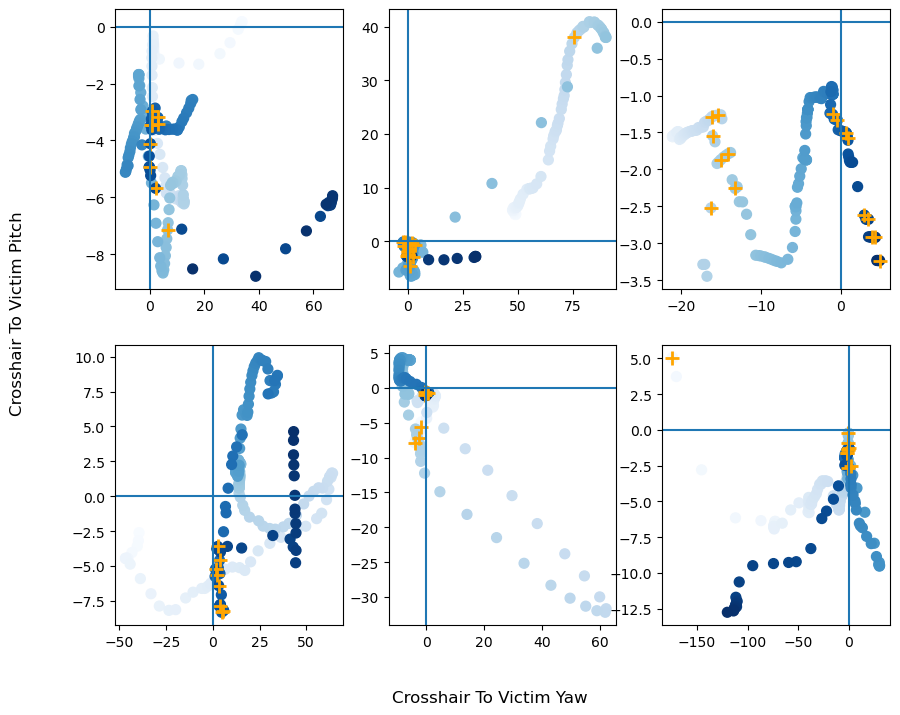

In [303]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8), sharex=False, sharey=False, gridspec_kw={"wspace":0.2, "hspace":0.2})
for i in range(len(random_cheater_ids)):
    cheater = cheaters.loc[(cheaters.player_id == random_cheater_ids[i]) &
                          (cheaters.engagement_id == random_engagement_ids[i])]
    if i <= 2:
        axs[0,i].scatter(cheater.crosshair_tovictim_yaw, cheater.crosshair_tovictim_pitch, c=cheater.timestep_id, cmap="Blues", s=50)
        
        axs[0,i].scatter(cheater.crosshair_tovictim_yaw.loc[cheater.firing == 1],
                         cheater.crosshair_tovictim_pitch.loc[cheater.firing == 1], 
                         c="orange", marker="+", s=100, lw=2)

        axs[0,i].axhline(0)#, min(cheater.crosshair_tovictim_yaw), max(cheater.crosshair_tovictim_yaw))
        axs[0,i].axvline(0)#, min(cheater.crosshair_tovictim_pitch), max(cheater.crosshair_tovictim_pitch))

    else:
        axs[1,i-3].scatter(cheater.crosshair_tovictim_yaw, cheater.crosshair_tovictim_pitch, c=cheater.timestep_id, cmap="Blues", s=50)

        axs[1, i-3].scatter(cheater.crosshair_tovictim_yaw.loc[cheater.firing == 1],
                            cheater.crosshair_tovictim_pitch.loc[cheater.firing == 1], 
                            c="orange", marker="+", s=100, lw=2)

        axs[1,i-3].axhline(0)#, min(cheater.crosshair_tovictim_yaw), max(cheater.crosshair_tovictim_yaw))
        axs[1,i-3].axvline(0)#, min(cheater.crosshair_tovictim_pitch), max(cheater.crosshair_tovictim_pitch))
        
fig.supxlabel("Crosshair To Victim Yaw")
fig.supylabel("Crosshair To Victim Pitch")

In [108]:
random_legit_ids = np.random.randint(2000, 12000, 6)
random_engagement_ids = np.random.randint(0,30, 6)

In [140]:
random_legit_ids[-1] = 2000
random_engagement_ids[-1] = 3

Text(0.02, 0.5, 'Crosshair To Victim Pitch')

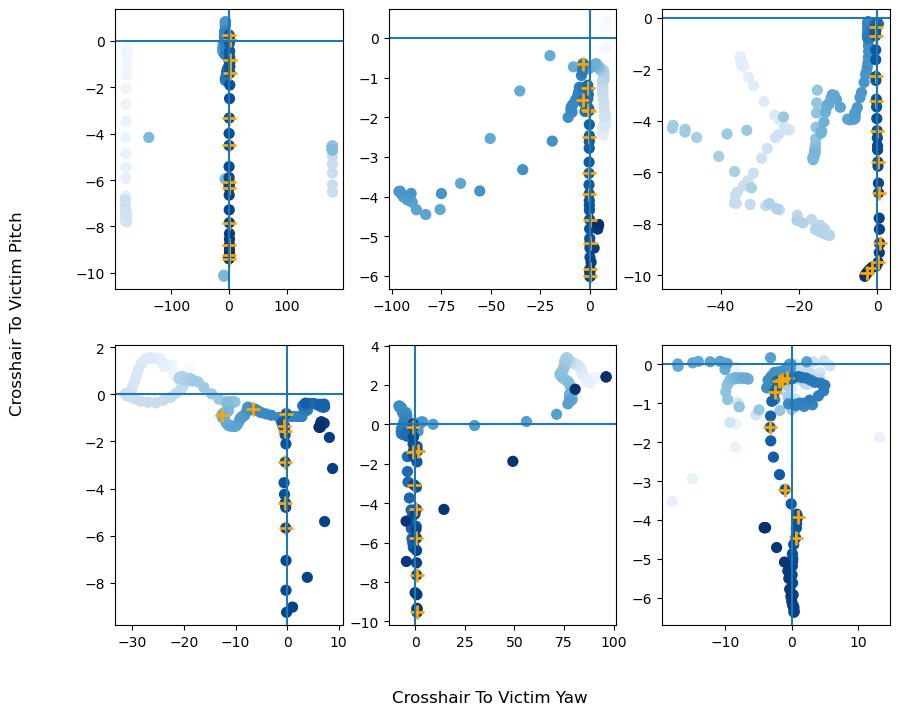

In [304]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8), sharex=False, sharey=False, gridspec_kw={"wspace":0.2, "hspace":0.2})
for i in range(len(random_legit_ids)):  
    legit = legits.loc[(legits.player_id == random_legit_ids[i]) & 
                       (legits.engagement_id == random_engagement_ids[i])]
    if i <= 2:
        axs[0,i].scatter(legit.crosshair_tovictim_yaw, legit.crosshair_tovictim_pitch, c=legit.timestep_id, cmap="Blues", s=50)

        axs[0,i].scatter(legit.crosshair_tovictim_yaw.loc[legit.firing == 1],
                         legit.crosshair_tovictim_pitch.loc[legit.firing == 1], 
                         c="orange", marker="+", s=100, lw=2)

        axs[0,i].axhline(0)#, min(legit.crosshair_tovictim_yaw), max(legit.crosshair_tovictim_yaw))
        axs[0,i].axvline(0)#, min(legit.crosshair_tovictim_pitch), max(legit.crosshair_tovictim_pitch))

    else:
        axs[1, i-3].scatter(legit.crosshair_tovictim_yaw, legit.crosshair_tovictim_pitch, c=legit.timestep_id, cmap="Blues", s=50)

        axs[1, i-3].scatter(legit.crosshair_tovictim_yaw.loc[legit.firing == 1],
                            legit.crosshair_tovictim_pitch.loc[legit.firing == 1], 
                            c="orange", marker="+", s=100, lw=2)

        axs[1,i-3].axhline(0)#, min(legit.crosshair_tovictim_yaw), max(legit.crosshair_tovictim_yaw))
        axs[1,i-3].axvline(0)#, min(legit.crosshair_tovictim_pitch), max(legit.crosshair_tovictim_pitch))
        
fig.supxlabel("Crosshair To Victim Yaw")
fig.supylabel("Crosshair To Victim Pitch")